In [9]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import math
import os
import sys

In [51]:
#initializing slope lists to be filled
#the line that appends the slopes to these lists stays commented out, uncomment when ready to save slopes
#then comment out when finished
m_uvw1 = []
#m_uvw1.clear() #uncomment when need to clear 
m_uvw2 = []
#m_uvw2.clear()
m_uvm2 = []
#m_uvm2.clear()
m_U = []
#m_U.clear()
m_B = []
#m_B.clear()
m_V = [] 
#m_V.clear() 

def new_LinearR(file,uvw2start,uvw2end,uvm2start,uvm2end,uvw1start,uvw1end,ustart,uend,bstart,bend,vstart,vend): 
    global m_uvw2, m_uvm2, m_uvw1, m_U, m_B, m_V #telling python that these are global variables
    #file needs to be in quotes
    #portion that sets up the arrays to plot the light curve using file and filter / name
    data = open(file, 'r')
    filename = file.rsplit(".", 1)[0] #gets rid of .txt extension when naming plots
    # Reading the data in from the photometry file
    for line in data:
        if not line[0] == "#":
            continue
        fil, mjd, mag, magerr = np.loadtxt(data, dtype=str, usecols = (0,1,2,3), unpack=True) #unpack lets you assign columns names
    for m in range(len(mag)):
        if mag[m]=='NULL':
            mag[m]='nan'
    for me in range(len(magerr)):
        if magerr[me]=="NULL":
            magerr[me]='nan'
    mjd1 = [float(date) for date in mjd]
    mag1 = [float(magnitude) for magnitude in mag]
    magerr1 = [float(magnitudeerr) for magnitudeerr in magerr]
    filters1 = fil
    # I needed to get rid of the NULL values in the ...15.1.dat files, so the next several lines are to make sure the 
    # program doesn't shut down because of them
    filterslist = []
    mjdlist  = []
    maglist = []
    magerrlist = []
    for ii in range(len(filters1)):
        if not np.isnan(mag1[ii]):
            filterslist.append(filters1[ii])
            maglist.append(mag1[ii])
            mjdlist.append(mjd1[ii])
            magerrlist.append(magerr1[ii])
    filters = np.array(filterslist)
    mjd = np.array(mjdlist) #modified julian date
    mag = np.array(maglist) #magnitude
    magerr = np.array(magerrlist) #magnitude error
    
    # Initializing lists needed to plot the different filters separately
    #making empty lists so they are ready to be filled
    uvw2mjd = []
    uvw2mag = []
    uvw2magerr = []
    uvw2_mjd_lr = [] 
    uvw2_mag_lr = []
    uvm2mjd = []
    uvm2mag = []
    uvm2magerr = []
    uvm2_mjd_lr = [] 
    uvm2_mag_lr = []
    uvw1mjd = []
    uvw1mag = []
    uvw1magerr = []
    uvw1_mjd_lr = [] 
    uvw1_mag_lr = []
    umjd = []
    umag = []
    umagerr = []
    u_mjd_lr = [] 
    u_mag_lr = []
    bmjd = []
    bmag = []
    bmagerr = []
    b_mjd_lr = [] 
    b_mag_lr = []
    vmjd = []
    vmag = []
    vmagerr = []
    v_mjd_lr = [] 
    v_mag_lr = [] 
    
    # breaking up the filters, mjd, mag, and magerr arrays into separate arrays to make plotting easier
    for i in range(len(filters)):
        if filters[i] == 'UVW2':
            uvw2mjd.append(mjd[i]) #i means which row
            uvw2mag.append(mag[i])
            uvw2magerr.append(magerr[i])
        if filters[i] == 'UVM2':
            uvm2mjd.append(mjd[i])
            uvm2mag.append(mag[i])
            uvm2magerr.append(magerr[i])
        if filters[i] == 'UVW1':
            uvw1mjd.append(mjd[i])
            uvw1mag.append(mag[i])
            uvw1magerr.append(magerr[i])
        if filters[i] == 'U':
            umjd.append(mjd[i])
            umag.append(mag[i])
            umagerr.append(magerr[i])
        if filters[i] == 'B':
            bmjd.append(mjd[i])
            bmag.append(mag[i])
            bmagerr.append(magerr[i])
        if filters[i] == 'V':
            vmjd.append(mjd[i])
            vmag.append(mag[i])
            vmagerr.append(magerr[i])
            
    if uvw2start and uvw2end != '0':
        for i in range(len(uvw2mjd)):
                if uvw2mjd[i] > uvw2start and uvw2mjd[i] < uvw2end:
                    uvw2_mjd_lr.append(uvw2mjd[i])
                    uvw2_mag_lr.append(uvw2mag[i])
        #uvw2 LR
        X1 = np.array(uvw2_mjd_lr)
        Y1 = np.array(uvw2_mag_lr)
        x1 = X1.reshape(-1, 1) 
        y1 = Y1.reshape(-1, 1)  
        linear_regressor = LinearRegression()  
        linear_regressor.fit(x1,y1)  
        y1_pred = linear_regressor.predict(x1)

        if len(y1_pred) >= 2 and len(x1) >= 2:
            uvw2_slope = float((y1_pred[-1] - y1_pred[0]) / (x1[-1] - x1[0]))
        else:
            uvw2_slope = float('nan')
        #m_uvw2.append(uvw2_slope)

        #plotting code
        plt.ion() #turns on interactive plotting
        fig = plt.figure()
        ax = fig.add_subplot(111)  
        if len(uvw2mag) > 0:
            ax.scatter(uvw2mjd, uvw2mag, linewidth=1,marker='o', facecolors='none', edgecolors='r', s=30, label='uvw2', color = 'r')
            #ax.errorbar(uvw2mjd, uvw2mag, yerr=uvw2magerr, elinewidth=2, capthick = 2, color = 'r') #red
            #ax.legend(bbox_to_anchor=(1.32,0.83))
            ax.set_xlabel('Modified Julian Date')
            ax.set_ylabel('Observed Magnitude')
            ax.axis([int(min(uvw2mjd))-1, math.ceil(np.amax(uvw2mjd))+1,math.ceil(np.amax(mag)+np.amax(magerr)), int(mag.min())-0.25])
            xlim_1 = plt.xlim(uvw2mjd[0]-1,uvw2mjd[-1]+1)
            ylim_1 = plt.ylim(uvw2mag[0]-2,uvw2mag[-1]+2)
            plt.gca().invert_yaxis() # Invert the y-axis
            plt.plot(x1,y1_pred,color='black')
            # Define text position as a percentage of the x and y limits
            #x1_pos = xlim_1[0] + 0.6 * (xlim_1[1] - xlim_1[0])  # 60% across the x-axis
            #y1_pos = ylim_1[0] + 0.8 * (ylim_1[1] - ylim_1[0])  # 80% across the y-axis
            #plt.text(x1_pos,y1_pos, f"m = {uvw2_slope:.3f}", fontsize = 12, color = 'red') 
            plt.title(f"Linear Regression and Light Curve for {filename} UVW2")
            plt.savefig(f"{filename}_UVW2.png", dpi=300, bbox_inches="tight")
            plt.show()
            
    if uvm2start and uvm2end != '0':
        for i in range(len(uvm2mjd)):
                if uvm2mjd[i] > uvm2start and uvm2mjd[i] < uvm2end:
                    uvm2_mjd_lr.append(uvm2mjd[i])
                    uvm2_mag_lr.append(uvm2mag[i])
        #uvm2 LR
        X2 = np.array(uvm2_mjd_lr) 
        Y2 = np.array(uvm2_mag_lr)
        x2 = X2.reshape(-1, 1)  
        y2 = Y2.reshape(-1, 1)  
        linear_regressor = LinearRegression()  
        linear_regressor.fit(x2,y2)  
        y2_pred = linear_regressor.predict(x2)
        

        
        if len(y2_pred) >= 2 and len(x2) >= 2:
            uvm2_slope = float((y2_pred[-1] - y2_pred[0]) / (x2[-1] - x2[0]))
        else:
            uvm2_slope = float('nan')
            
        #m_uvm2.append(uvm2_slope)
    
        #plotting code
        plt.ion() #turns on interactive plotting
        fig = plt.figure()
        ax = fig.add_subplot(111)
        if len(uvm2mag) > 0:
            ax.scatter(uvm2mjd, uvm2mag, linewidth=1,marker='o',facecolors='none', edgecolors='m', s=30, label='uvm2', color= 'm')
            #ax.errorbar(uvm2mjd, uvm2mag, yerr=uvm2magerr, elinewidth=2, capthick = 2, color='m') #magenta
            #ax.legend(bbox_to_anchor=(1.32,0.83))
            ax.set_xlabel('Modified Julian Date')
            ax.set_ylabel('Observed Magnitude')
            ax.axis([int(mjd.min())-1, math.ceil(np.amax(uvw2mjd))+1,math.ceil(np.amax(mag)+np.amax(magerr)), int(mag.min())-0.25])
            xlim_2 = plt.xlim(uvm2mjd[0]-1,uvm2mjd[-1]+1)
            ylim_2 = plt.ylim(uvm2mag[0]-2,uvm2mag[-1]+2)
            plt.gca().invert_yaxis() # Invert the y-axis
            # Define text position as a percentage of the x and y limits
            #x2_pos = xlim_2[0] + 0.6 * (xlim_2[1] - xlim_2[0])  # 60% across the x-axis
            #y2_pos = ylim_2[0] + 0.8 * (ylim_2[1] - ylim_2[0])  # 80% across the y-axis
            #plt.text(x2_pos,y2_pos, f"m = {uvm2_slope:.3f}", fontsize = 12, color = 'red') 
            plt.plot(x2,y2_pred,color='black')
            plt.title(f"Linear Regression and Light Curve for {filename} UVM2")
            plt.savefig(f"{filename}_UVM2.png", dpi=300, bbox_inches="tight")
            plt.show()
            
    if uvw1start and uvw1end != '0':
        for i in range(len(uvw1mjd)):
            if uvw1mjd[i] > uvw1start and uvw1mjd[i] < uvw1end:
                uvw1_mjd_lr.append(uvw1mjd[i])
                uvw1_mag_lr.append(uvw1mag[i])
        
        #uvw1 LR 
        X = np.array(uvw1_mjd_lr) 
        Y = np.array(uvw1_mag_lr)
        x = X.reshape(-1, 1)  # values converts it into a numpy array
        y = Y.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
        linear_regressor = LinearRegression()  # create object for the class
        linear_regressor.fit(x,y)  # perform linear regression
        y_pred = linear_regressor.predict(x)  # make predictions
        
        if len(y_pred) >= 2 and len(x) >= 2:
            uvw1_slope = float((y_pred[-1] - y_pred[0]) / (x[-1] - x[0]))
        else:
            uvw1_slope = float('nan')
        #m_uvw1.append(uvw1_slope)
       
        #plotting code
        plt.ion() #turns on interactive plotting
        fig = plt.figure()
        ax = fig.add_subplot(111)
        if len(uvw1mag) > 0:
            ax.scatter(uvw1mjd, uvw1mag, linewidth=1, marker='o', facecolors='none', edgecolors='k', s=30, label='uvw1', color= 'k')
            #ax.errorbar(uvw1mjd, uvw1mag, yerr=uvw1magerr, elinewidth=2, capthick = 2, color='k') # black
            #ax.legend(bbox_to_anchor=(1.32,0.83))
            ax.set_xlabel('Modified Julian Date')
            ax.set_ylabel('Observed Magnitude')
            ax.axis([int(mjd.min())-1, math.ceil(np.amax(uvw1mjd))+1,math.ceil(np.amax(mag)+np.amax(magerr)), int(mag.min())-0.25])
            xlim = plt.xlim(uvw1mjd[0]-1,uvw1mjd[-1]+1) #had to expand x-axis b/c data wasnt graphing right
            ylim = plt.ylim(uvw1mag[0]-2,uvw1mag[-1]+2)
            plt.gca().invert_yaxis() # Invert the y-axis
            # Define text position as a percentage of the x and y limits
            #x_pos = xlim[0] + 0.6 * (xlim[1] - xlim[0])  # 60% across the x-axis
            #y_pos = ylim[0] + 0.8 * (ylim[1] - ylim[0])  # 80% across the y-axis
            #plt.text(x_pos,y_pos, f"m = {uvw1_slope:.3f}", fontsize = 12, color = 'red') 
            plt.plot(x,y_pred,color='red')
            plt.title(f"Linear Regression and Light Curve for {filename} UVW1")
            plt.savefig(f"{filename}_UVW1.png", dpi=300, bbox_inches="tight")
            plt.show() 
            
    if ustart and uend != '0':
        for i in range(len(umjd)):
            if umjd[i] > ustart and umjd[i] < uend:
                u_mjd_lr.append(umjd[i])
                u_mag_lr.append(umag[i])
        
        #U LR
        X3 = np.array(u_mjd_lr) 
        Y3 = np.array(u_mag_lr)
        x3 = X3.reshape(-1, 1)  
        y3 = Y3.reshape(-1, 1)  
        linear_regressor = LinearRegression()  
        linear_regressor.fit(x3,y3)  
        y3_pred = linear_regressor.predict(x3)

        if len(y3_pred) >= 2 and len(x3) >= 2:
            u_slope = float((y3_pred[-1] - y3_pred[0]) / (x3[-1] - x3[0]))
        else:
            u_slope = float('nan')
            
        #m_U.append(u_slope)
        
        #plotting code
        plt.ion() #turns on interactive plotting
        fig = plt.figure()
        ax = fig.add_subplot(111)
        if len(umag) > 0:
            ax.scatter(umjd, umag, linewidth=1, marker='o', facecolors='none', edgecolors='c', s=30, label='uvot u', color= 'c')
            #ax.errorbar(umjd, umag, yerr=umagerr, elinewidth=2, capthick = 2, color='c') #cyan
            #ax.legend(bbox_to_anchor=(1.32,0.83))
            ax.set_xlabel('Modified Julian Date')
            ax.set_ylabel('Observed Magnitude')
            ax.axis([int(min(umjd))-1, math.ceil(np.amax(umjd))+1,math.ceil(np.amax(mag)+np.amax(magerr)), int(mag.min())-0.25])
            xlim_3 = plt.xlim(umjd[0]-1,umjd[-1]+1)
            ylim_3 = plt.ylim(umag[0]-2,umag[-1]+2)
            # Define text position as a percentage of the x and y limits
            x3_pos = xlim_3[0] + 0.6 * (xlim_3[1] - xlim_3[0])  # 60% across the x-axis
            y3_pos = ylim_3[0] + 0.8 * (ylim_3[1] - ylim_3[0])  # 80% across the y-axis
            #plt.text(x3_pos,y3_pos, f"m = {u_slope:.3f}", fontsize = 12, color = 'red') 
            plt.gca().invert_yaxis() # Invert the y-axis
            plt.plot(x3,y3_pred,color='black')
            plt.title(f"Linear Regression and Light Curve for {filename} U")
            plt.savefig(f"{filename}_U.png", dpi=300, bbox_inches="tight")
            plt.show()
            
    if bstart and bend != '0':
        for i in range(len(bmjd)):
            if bmjd[i] > bstart and bmjd[i] < bend:
                b_mjd_lr.append(bmjd[i])
                b_mag_lr.append(bmag[i])

        #B LR
        X5 =np.array(b_mjd_lr) 
        Y5 =np.array(b_mag_lr)
        x5 = X5.reshape(-1, 1)  
        y5 = Y5.reshape(-1, 1) 
        linear_regressor = LinearRegression()  
        linear_regressor.fit(x5,y5)  
        y5_pred = linear_regressor.predict(x5)  

        if len(y5_pred) >= 2 and len(x5) >= 2:
            b_slope = float((y5_pred[-1] - y5_pred[0]) / (x5[-1] - x5[0]))
        else:
            b_slope = float('nan')
            
        #m_B.append(b_slope)
        
        #plotting code
        plt.ion() #turns on interactive plotting
        fig = plt.figure()
        ax = fig.add_subplot(111)
        if len(bmag) > 0:
            ax.scatter(bmjd, bmag, linewidth=1,marker='o',facecolors='none', edgecolors='b', s=50, label='uvot b', color= 'b')
            #ax.errorbar(bmjd, bmag, yerr=bmagerr, elinewidth=2, capthick = 2, color='b') #blue
            #ax.legend(bbox_to_anchor=(1.32,0.83))
            ax.set_xlabel('Modified Julian Date')
            ax.set_ylabel('Observed Magnitude')
            ax.axis([int(min(bmjd))-1, math.ceil(np.amax(bmjd))+1,math.ceil(np.amax(mag)+np.amax(magerr)), int(mag.min())-0.25])
            xlim_5 = plt.xlim(bmjd[0]-1,bmjd[-1]+1)
            ylim_5 = plt.ylim(bmag[0]-2,bmag[-1]+2)
            # Define text position as a percentage of the x and y limits
            x5_pos = xlim_5[0] + 0.6 * (xlim_5[1] - xlim_5[0])  # 60% across the x-axis
            y5_pos = ylim_5[0] + 0.8 * (ylim_5[1] - ylim_5[0])  # 80% across the y-axis
            #plt.text(x5_pos,y5_pos, f"m = {b_slope:.3f}", fontsize = 12, color = 'red') 
            plt.gca().invert_yaxis() # Invert the y-axis
            plt.plot(x5,y5_pred,color='black')
            plt.title(f"Linear Regression and Light Curve for {filename} B")
            plt.savefig(f"{filename}_B.png", dpi=300, bbox_inches="tight")
            plt.show()
            
    if vstart and vend != '0':
        for i in range(len(vmjd)):
            if vmjd[i] > vstart and vmjd[i] < vend:
                v_mjd_lr.append(vmjd[i])
                v_mag_lr.append(vmag[i])
        #V LR
        X4 = np.array(v_mjd_lr) 
        Y4 = np.array(v_mag_lr)
        x4 = X4.reshape(-1, 1)  
        y4 = Y4.reshape(-1, 1)  
        linear_regressor = LinearRegression()  
        linear_regressor.fit(x4,y4)  
        y4_pred = linear_regressor.predict(x4) 

        if len(y4_pred) >= 2 and len(x4) >= 2:
            v_slope = float((y4_pred[-1] - y4_pred[0]) / (x4[-1] - x4[0]))
        else:
            v_slope = float('nan')
            
        #m_V.append(v_slope) 
        
        
        #plotting code
        plt.ion() #turns on interactive plotting
        fig = plt.figure()
        ax = fig.add_subplot(111)
        if len(vmag) > 0:
            ax.scatter(vmjd, vmag, linewidth=1,marker='o',facecolors='none', edgecolors='g', s=30, label='uvot v', color= 'g')
            #ax.errorbar(vmjd, vmag, yerr=vmagerr, elinewidth=2, capthick = 2, color='g') #green
            #ax.legend(bbox_to_anchor=(1.32,0.83))
            ax.set_xlabel('Modified Julian Date')
            ax.set_ylabel('Observed Magnitude')
            ax.axis([int(min(vmjd))-1, math.ceil(np.amax(vmjd))+1,math.ceil(np.amax(mag)+np.amax(magerr)), int(mag.min())-0.25])
            xlim_4 = plt.xlim(vmjd[0]-1,vmjd[-1]+1)
            ylim_4 = plt.ylim(vmag[0]-2,vmag[-1]+2)
            # Define text position as a percentage of the x and y limits
            x4_pos = xlim_4[0] + 0.6 * (xlim_4[1] - xlim_4[0])  # 60% across the x-axis
            y4_pos = ylim_4[0] + 0.8 * (ylim_4[1] - ylim_4[0])  # 80% across the y-axis
            #plt.text(x4_pos,y4_pos, f"m = {v_slope:.3f}", fontsize = 12, color = 'red') 
            plt.gca().invert_yaxis() # Invert the y-axis
            plt.plot(x4,y4_pred,color='black')
            plt.title(f"Linear Regression and Light Curve for {filename} V")
            plt.savefig(f"{filename}_V.png", dpi=300, bbox_inches="tight")
            plt.show()  
            
    #printing all the slopes for each line and rounding to 3 decimal places
    if uvw2start and uvw2end != '0':
        print(f"UVW2: {uvw2_slope:.3f}") 
    if uvm2start and uvm2end != '0':
        print(f"UVM2: {uvm2_slope:.3f}")
    if uvw1start and uvw1end != '0':
        print(f"UVW1: {uvw1_slope:.3f}")
    if ustart and uend != '0':
        print(f"U: {u_slope:.3f}")
    if vstart and vend != '0':
        print(f"V: {v_slope:.3f}") 
    if bstart and bend != '0':
        print(f"B: {b_slope:.3f}")    

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:20: UserWarning: Input line 1 contained no data and will not be counted towards `max_rows=50000`.  This differs from the behaviour in NumPy <=1.22 which counted lines rather than rows.  If desired, the previous behaviour can be achieved by using `itertools.islice`.
Please see the 1.23 release notes for an example on how to do this.  If you wish to ignore this warning, use `warnings.filterwarnings`.  This warning is expected to be removed in the future and is given only once per `loadtxt` call.
  fil, mjd, mag, magerr = np.loadtxt(data, dtype=str, usecols = (0,1,2,3), unpack=True) #unpack lets you assign columns names
C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:123: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  uvw2_slope = float(

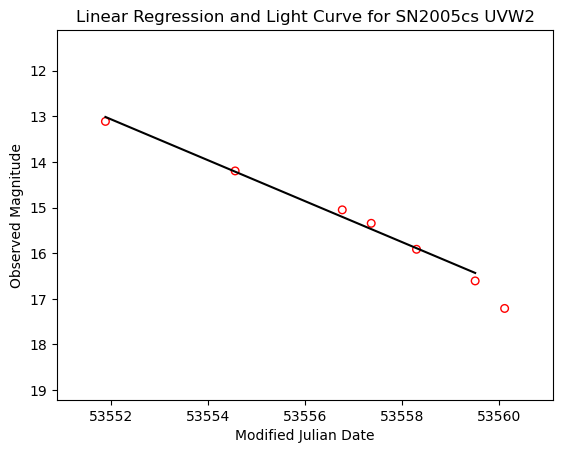

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:168: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  uvm2_slope = float((y2_pred[-1] - y2_pred[0]) / (x2[-1] - x2[0]))


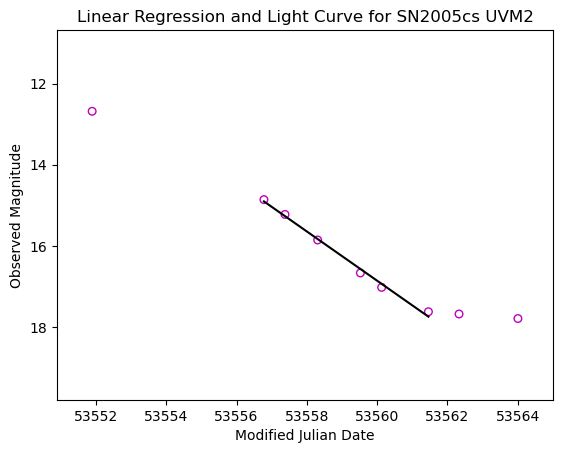

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:213: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  uvw1_slope = float((y_pred[-1] - y_pred[0]) / (x[-1] - x[0]))


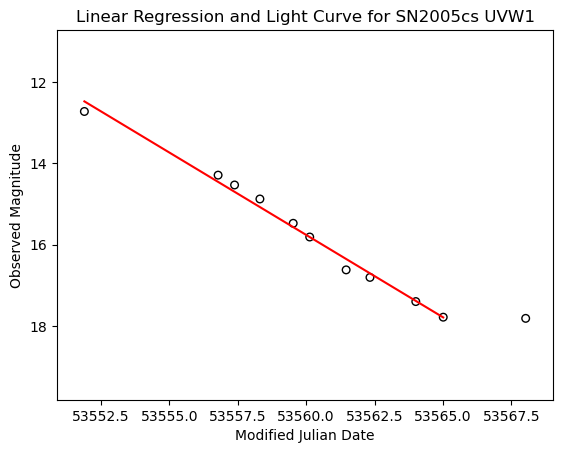

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:257: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  u_slope = float((y3_pred[-1] - y3_pred[0]) / (x3[-1] - x3[0]))


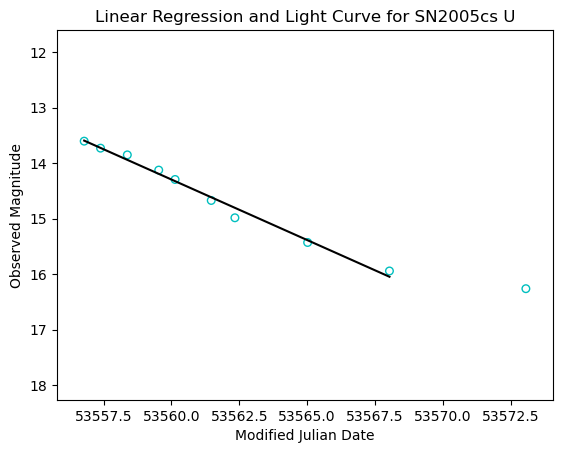

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:302: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  b_slope = float((y5_pred[-1] - y5_pred[0]) / (x5[-1] - x5[0]))


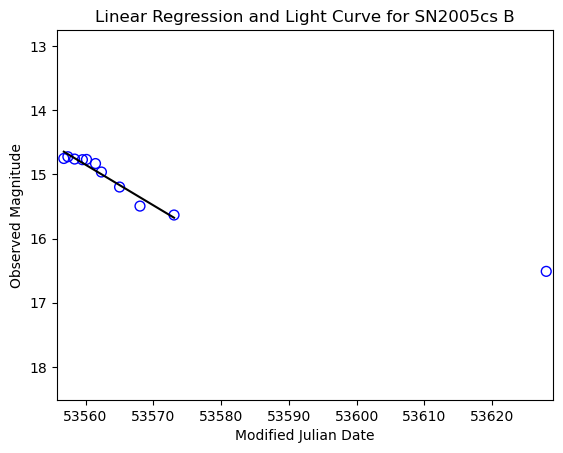

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:346: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  v_slope = float((y4_pred[-1] - y4_pred[0]) / (x4[-1] - x4[0]))


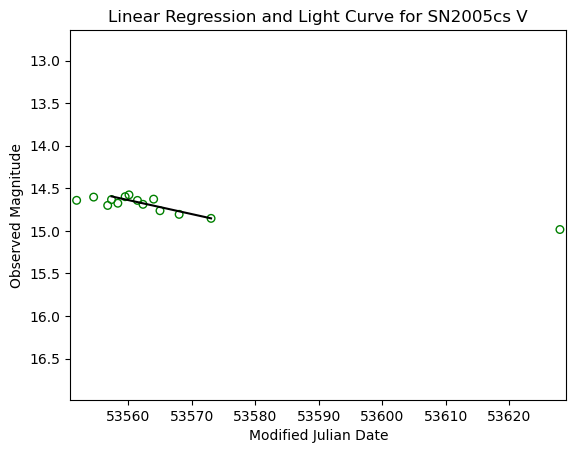

UVW2: 0.447
UVM2: 0.606
UVW1: 0.405
U: 0.218
V: 0.016
B: 0.063


In [11]:
new_LinearR('SN2005cs.txt',53551,53560.1236,53551.8875,53562.3318,53551,53568.0266,53556,53573.053,53551.8826,53627.9688,53556.7861,53580)

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:20: UserWarning: Input line 1 contained no data and will not be counted towards `max_rows=50000`.  This differs from the behaviour in NumPy <=1.22 which counted lines rather than rows.  If desired, the previous behaviour can be achieved by using `itertools.islice`.
Please see the 1.23 release notes for an example on how to do this.  If you wish to ignore this warning, use `warnings.filterwarnings`.  This warning is expected to be removed in the future and is given only once per `loadtxt` call.
  fil, mjd, mag, magerr = np.loadtxt(data, dtype=str, usecols = (0,1,2,3), unpack=True) #unpack lets you assign columns names
C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:123: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  uvw2_slope = float(

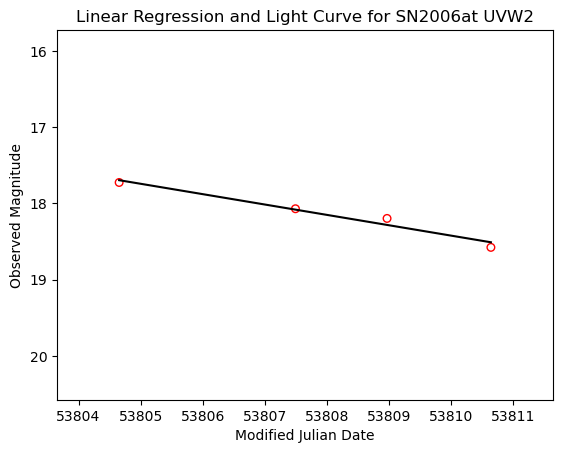

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:168: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  uvm2_slope = float((y2_pred[-1] - y2_pred[0]) / (x2[-1] - x2[0]))


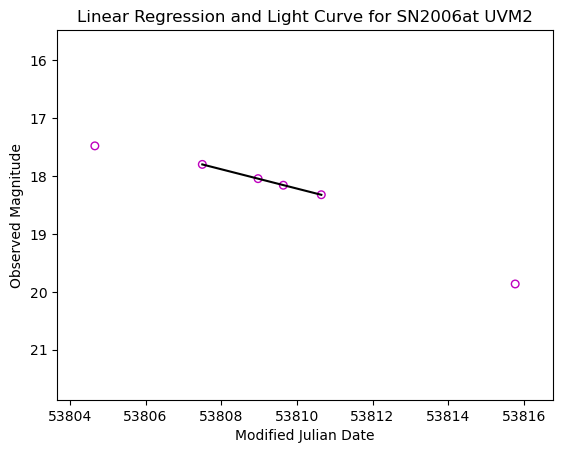

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:213: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  uvw1_slope = float((y_pred[-1] - y_pred[0]) / (x[-1] - x[0]))


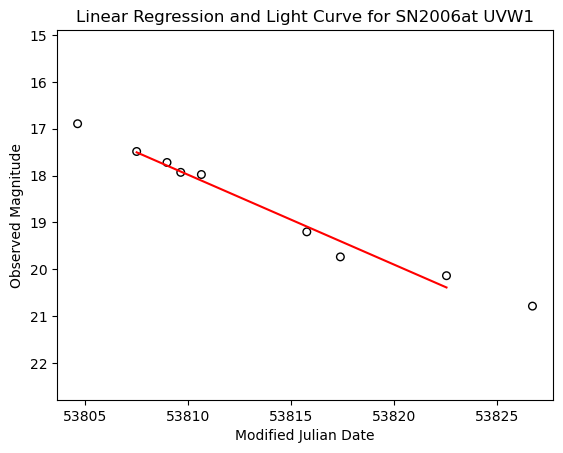

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:257: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  u_slope = float((y3_pred[-1] - y3_pred[0]) / (x3[-1] - x3[0]))


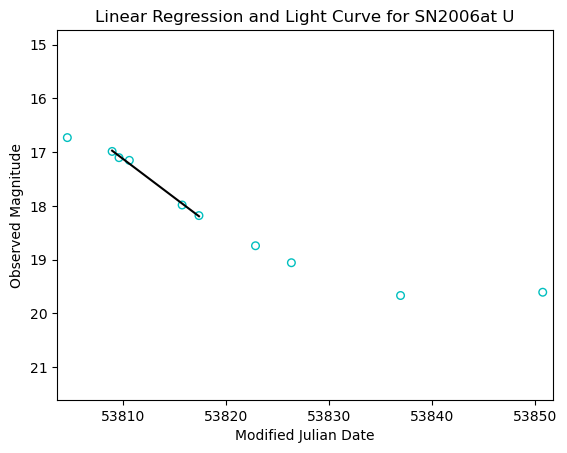

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:302: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  b_slope = float((y5_pred[-1] - y5_pred[0]) / (x5[-1] - x5[0]))


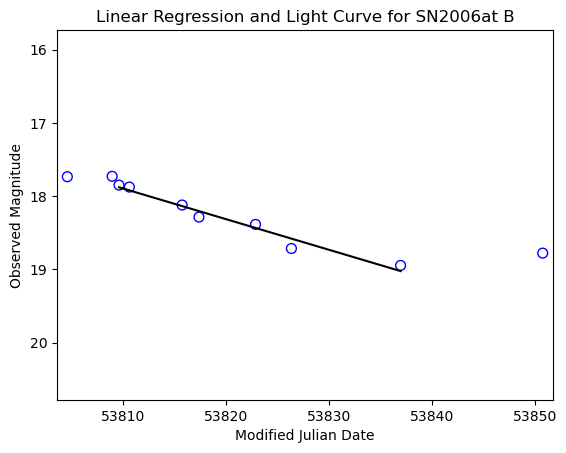

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:346: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  v_slope = float((y4_pred[-1] - y4_pred[0]) / (x4[-1] - x4[0]))


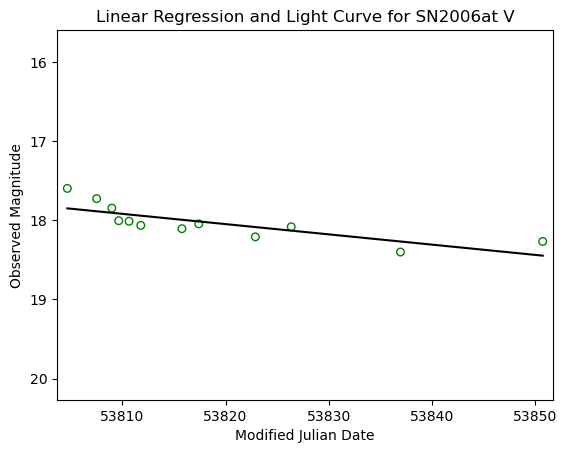

UVW2: 0.136
UVM2: 0.167
UVW1: 0.192
U: 0.145
V: 0.013
B: 0.042


In [12]:
new_LinearR('SN2006at.txt',53804,53811.7738,53804.659,53815.7709,53804.6318,53826.7413,53804.6325,53822.8928,53809.6377,53850.761,53804.633,53850.7679)

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:20: UserWarning: Input line 1 contained no data and will not be counted towards `max_rows=50000`.  This differs from the behaviour in NumPy <=1.22 which counted lines rather than rows.  If desired, the previous behaviour can be achieved by using `itertools.islice`.
Please see the 1.23 release notes for an example on how to do this.  If you wish to ignore this warning, use `warnings.filterwarnings`.  This warning is expected to be removed in the future and is given only once per `loadtxt` call.
  fil, mjd, mag, magerr = np.loadtxt(data, dtype=str, usecols = (0,1,2,3), unpack=True) #unpack lets you assign columns names
C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:123: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  uvw2_slope = float(

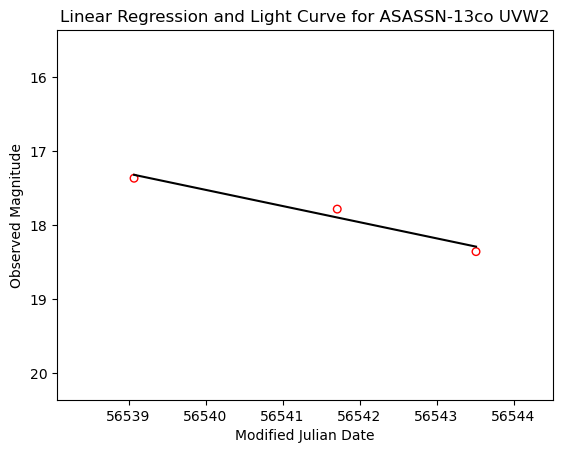

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:168: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  uvm2_slope = float((y2_pred[-1] - y2_pred[0]) / (x2[-1] - x2[0]))


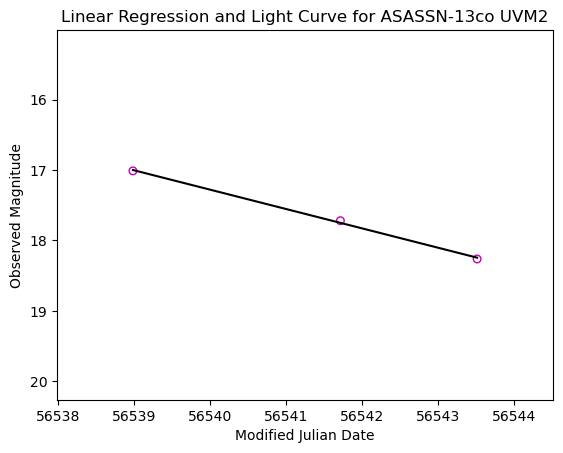

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:213: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  uvw1_slope = float((y_pred[-1] - y_pred[0]) / (x[-1] - x[0]))


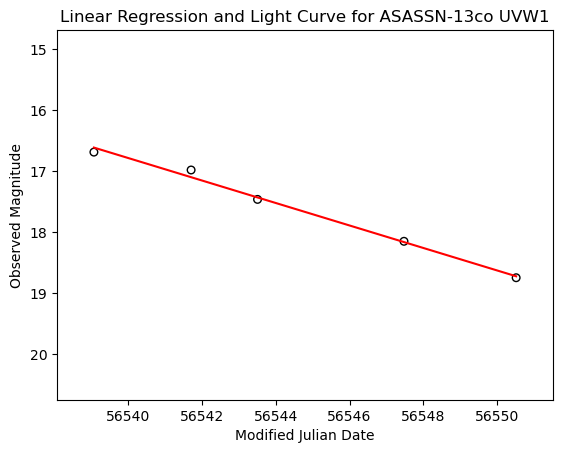

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:257: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  u_slope = float((y3_pred[-1] - y3_pred[0]) / (x3[-1] - x3[0]))


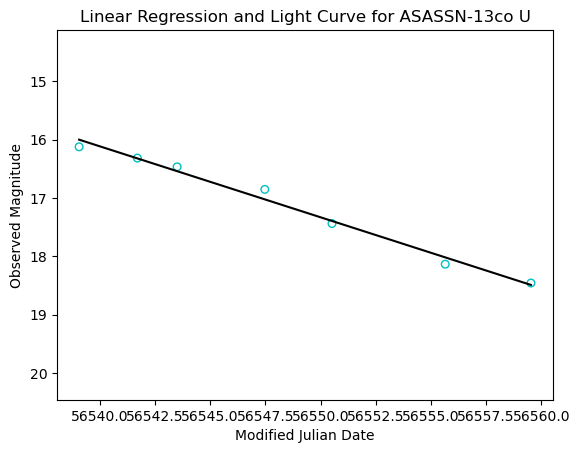

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:302: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  b_slope = float((y5_pred[-1] - y5_pred[0]) / (x5[-1] - x5[0]))


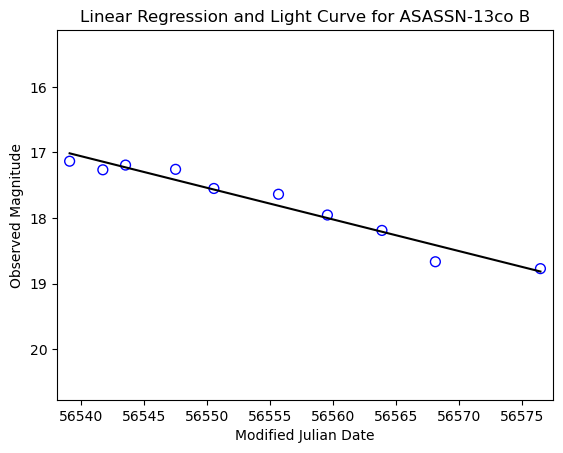

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:346: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  v_slope = float((y4_pred[-1] - y4_pred[0]) / (x4[-1] - x4[0]))


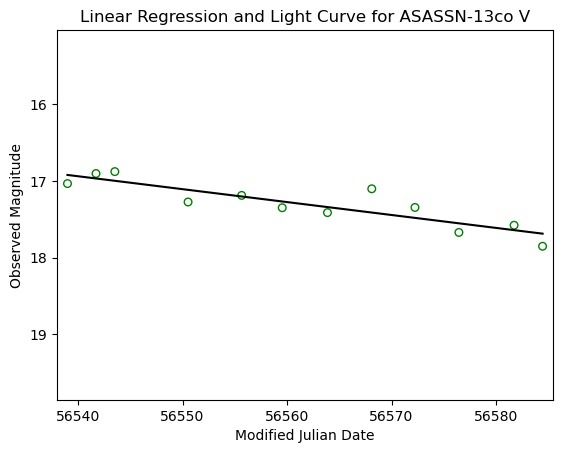

UVW2: 0.218
UVM2: 0.275
UVW1: 0.184
U: 0.122
V: 0.017
B: 0.048


In [13]:
new_LinearR('ASASSN-13co.txt', 56538,56550.5219,56538,56550.7554,56539,56555.6448,56539,56563.8563,56538,56585,56538,56585)

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:20: UserWarning: Input line 1 contained no data and will not be counted towards `max_rows=50000`.  This differs from the behaviour in NumPy <=1.22 which counted lines rather than rows.  If desired, the previous behaviour can be achieved by using `itertools.islice`.
Please see the 1.23 release notes for an example on how to do this.  If you wish to ignore this warning, use `warnings.filterwarnings`.  This warning is expected to be removed in the future and is given only once per `loadtxt` call.
  fil, mjd, mag, magerr = np.loadtxt(data, dtype=str, usecols = (0,1,2,3), unpack=True) #unpack lets you assign columns names
C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:123: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  uvw2_slope = float(

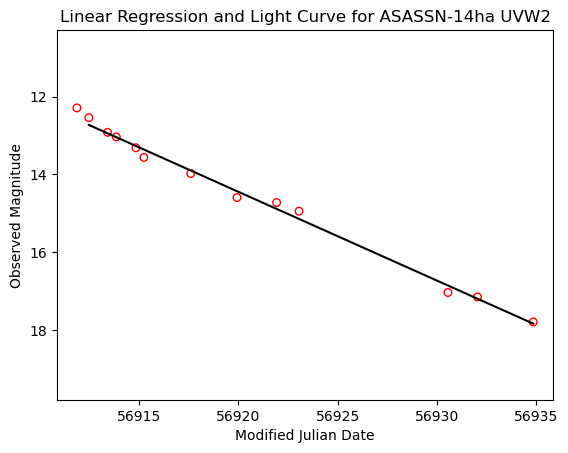

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:168: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  uvm2_slope = float((y2_pred[-1] - y2_pred[0]) / (x2[-1] - x2[0]))


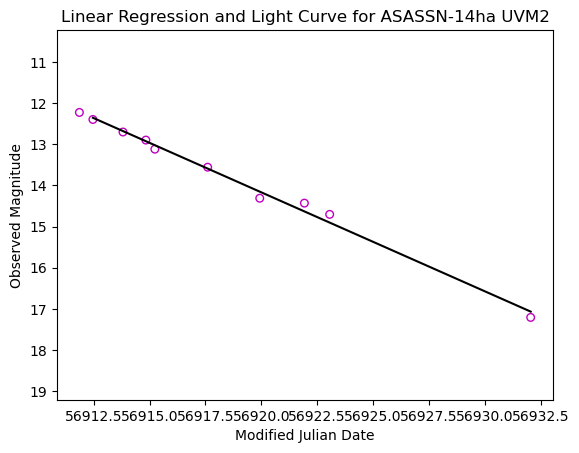

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:213: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  uvw1_slope = float((y_pred[-1] - y_pred[0]) / (x[-1] - x[0]))


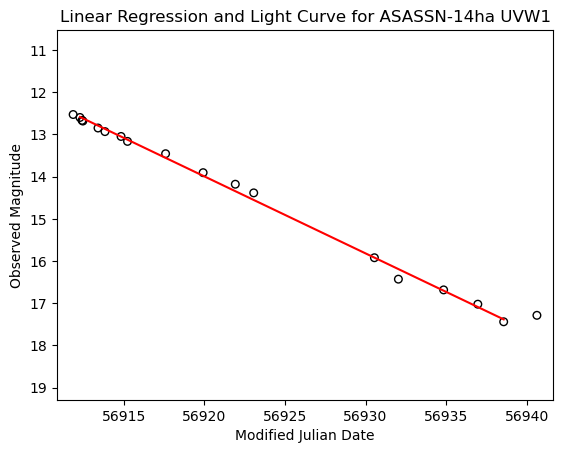

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:257: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  u_slope = float((y3_pred[-1] - y3_pred[0]) / (x3[-1] - x3[0]))


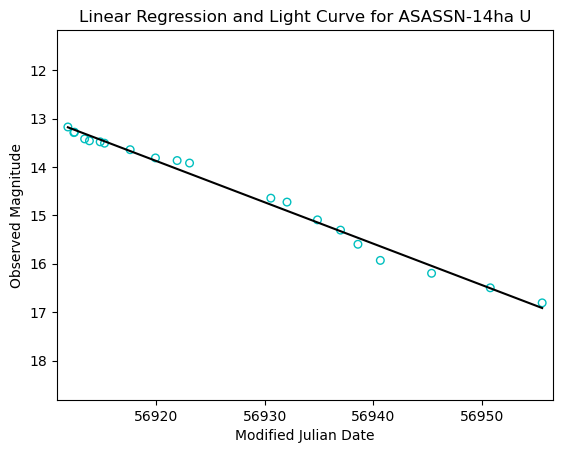

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:302: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  b_slope = float((y5_pred[-1] - y5_pred[0]) / (x5[-1] - x5[0]))


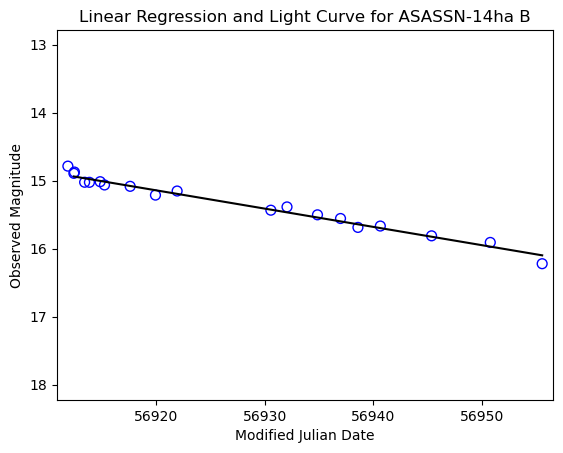

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:346: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  v_slope = float((y4_pred[-1] - y4_pred[0]) / (x4[-1] - x4[0]))


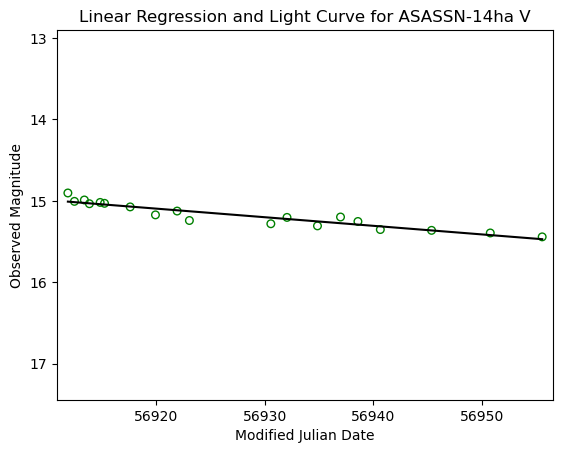

UVW2: 0.228
UVM2: 0.240
UVW1: 0.182
U: 0.085
V: 0.011
B: 0.027


In [14]:
new_LinearR('ASASSN-14ha.txt',56911.8555,56936.9758,56911.8589,56934.8566,56911.8503,56940.6389,56911,56956,56911.8572,56955.558,56911.8538,56956)

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:20: UserWarning: Input line 1 contained no data and will not be counted towards `max_rows=50000`.  This differs from the behaviour in NumPy <=1.22 which counted lines rather than rows.  If desired, the previous behaviour can be achieved by using `itertools.islice`.
Please see the 1.23 release notes for an example on how to do this.  If you wish to ignore this warning, use `warnings.filterwarnings`.  This warning is expected to be removed in the future and is given only once per `loadtxt` call.
  fil, mjd, mag, magerr = np.loadtxt(data, dtype=str, usecols = (0,1,2,3), unpack=True) #unpack lets you assign columns names
C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:123: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  uvw2_slope = float(

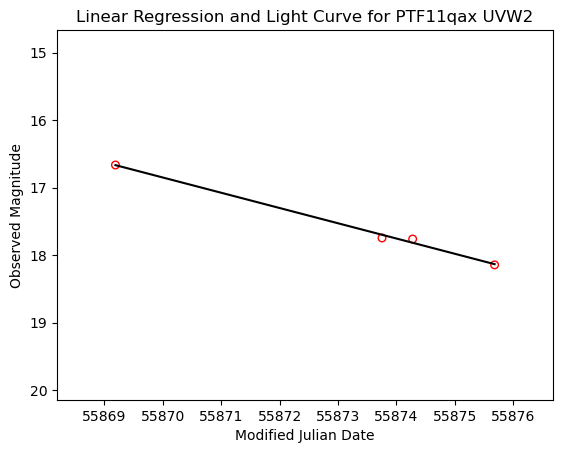

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:168: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  uvm2_slope = float((y2_pred[-1] - y2_pred[0]) / (x2[-1] - x2[0]))


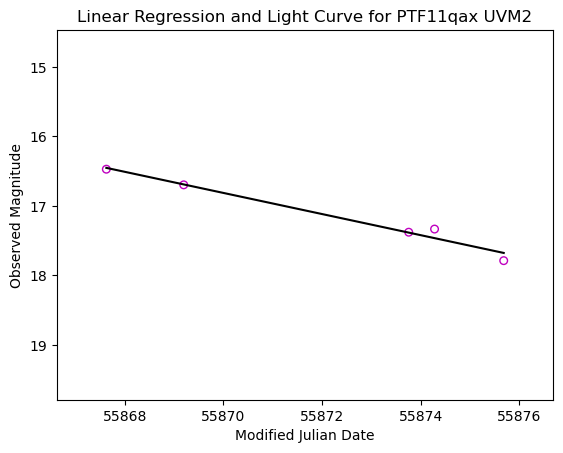

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:213: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  uvw1_slope = float((y_pred[-1] - y_pred[0]) / (x[-1] - x[0]))


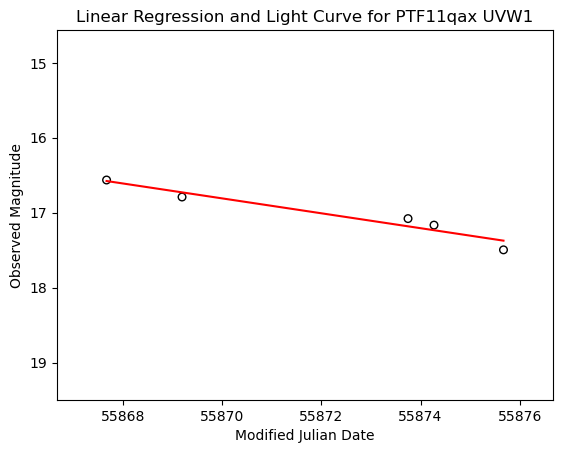

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:257: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  u_slope = float((y3_pred[-1] - y3_pred[0]) / (x3[-1] - x3[0]))


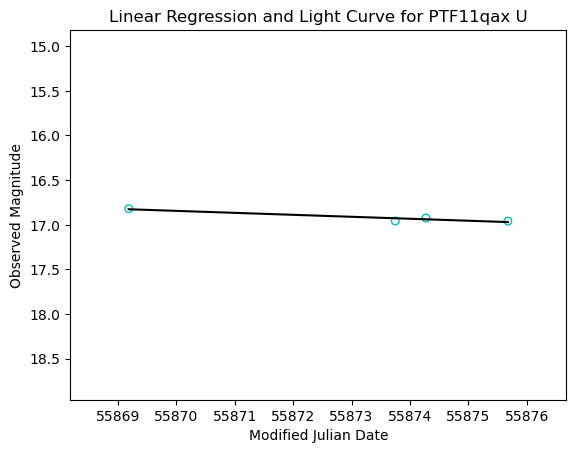

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:302: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  b_slope = float((y5_pred[-1] - y5_pred[0]) / (x5[-1] - x5[0]))


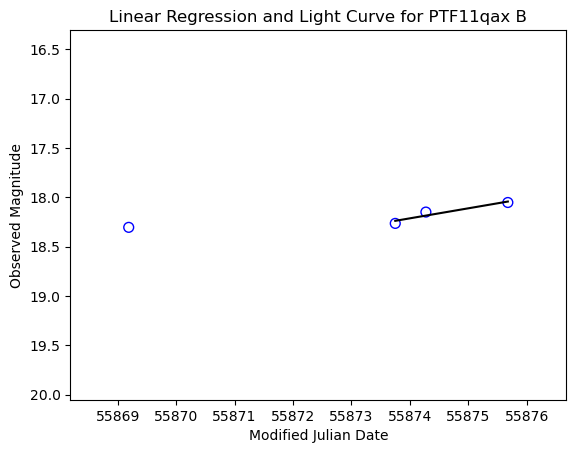

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:346: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  v_slope = float((y4_pred[-1] - y4_pred[0]) / (x4[-1] - x4[0]))


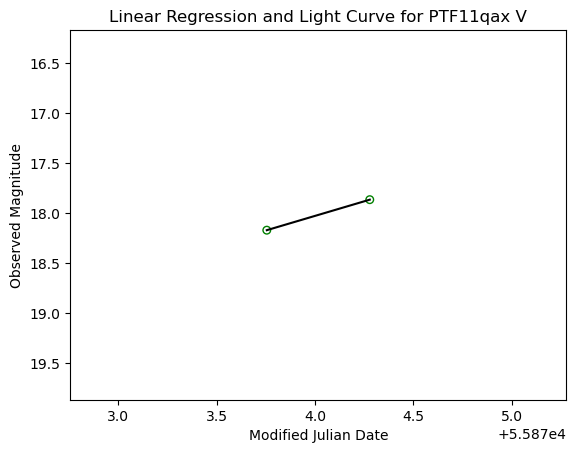

UVW2: 0.226
UVM2: 0.152
UVW1: 0.099
U: 0.022
V: -0.582
B: -0.102


In [15]:
new_LinearR('PTF11qax.txt',55869,55876,55867,55876,55867,55876,55869,55876,55869.1927,55875.681,55869,55876)

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:20: UserWarning: Input line 1 contained no data and will not be counted towards `max_rows=50000`.  This differs from the behaviour in NumPy <=1.22 which counted lines rather than rows.  If desired, the previous behaviour can be achieved by using `itertools.islice`.
Please see the 1.23 release notes for an example on how to do this.  If you wish to ignore this warning, use `warnings.filterwarnings`.  This warning is expected to be removed in the future and is given only once per `loadtxt` call.
  fil, mjd, mag, magerr = np.loadtxt(data, dtype=str, usecols = (0,1,2,3), unpack=True) #unpack lets you assign columns names
C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:123: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  uvw2_slope = float(

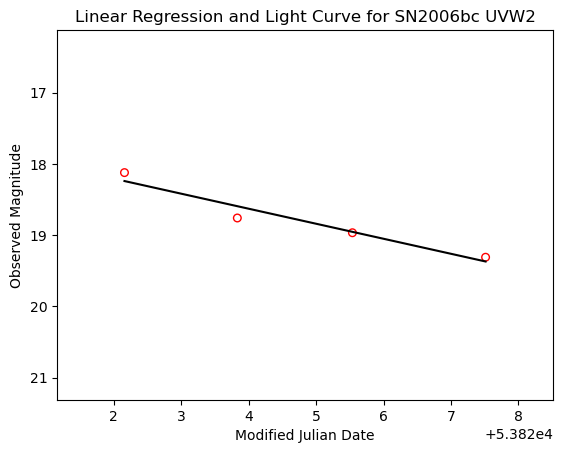

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:168: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  uvm2_slope = float((y2_pred[-1] - y2_pred[0]) / (x2[-1] - x2[0]))


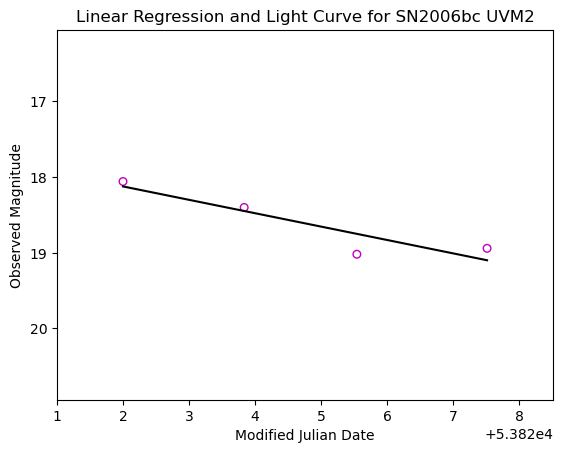

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:213: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  uvw1_slope = float((y_pred[-1] - y_pred[0]) / (x[-1] - x[0]))


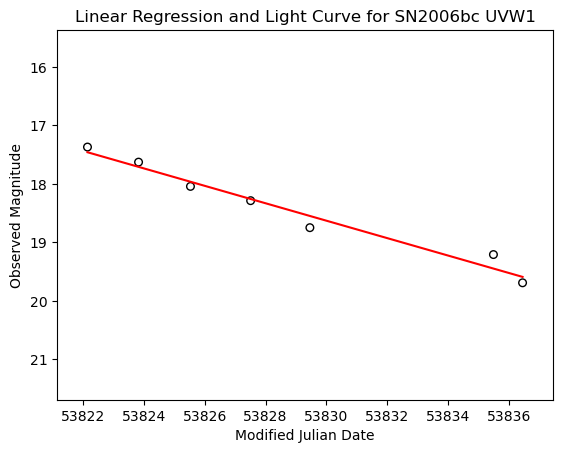

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:257: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  u_slope = float((y3_pred[-1] - y3_pred[0]) / (x3[-1] - x3[0]))


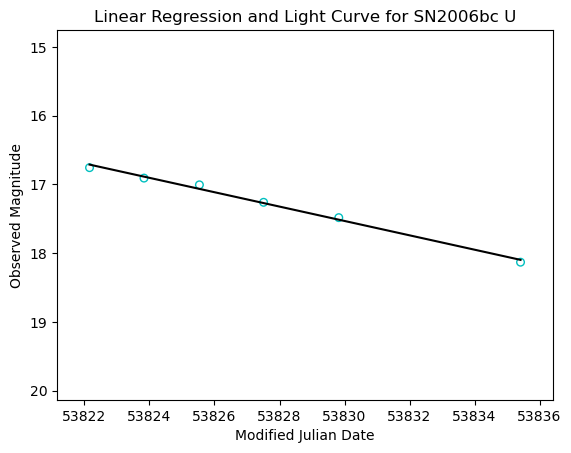

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:302: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  b_slope = float((y5_pred[-1] - y5_pred[0]) / (x5[-1] - x5[0]))


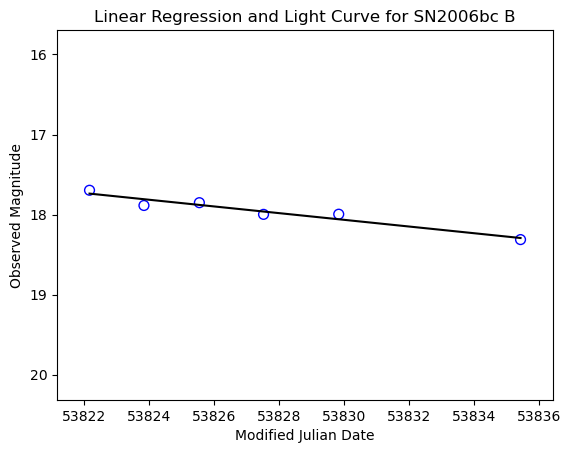

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:346: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  v_slope = float((y4_pred[-1] - y4_pred[0]) / (x4[-1] - x4[0]))


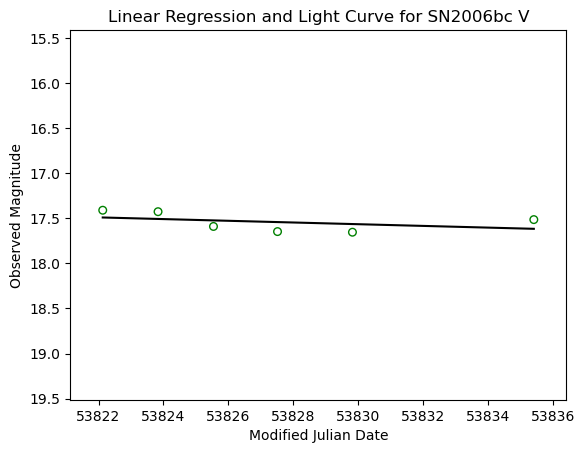

UVW2: 0.211
UVM2: 0.177
UVW1: 0.149
U: 0.104
V: 0.009
B: 0.042


In [16]:
new_LinearR('SN2006bc.txt',53822,53828,53821,53828,53822,53837,53822,53836,53822.1285,53836,53822,53836)

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:20: UserWarning: Input line 1 contained no data and will not be counted towards `max_rows=50000`.  This differs from the behaviour in NumPy <=1.22 which counted lines rather than rows.  If desired, the previous behaviour can be achieved by using `itertools.islice`.
Please see the 1.23 release notes for an example on how to do this.  If you wish to ignore this warning, use `warnings.filterwarnings`.  This warning is expected to be removed in the future and is given only once per `loadtxt` call.
  fil, mjd, mag, magerr = np.loadtxt(data, dtype=str, usecols = (0,1,2,3), unpack=True) #unpack lets you assign columns names
C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:123: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  uvw2_slope = float(

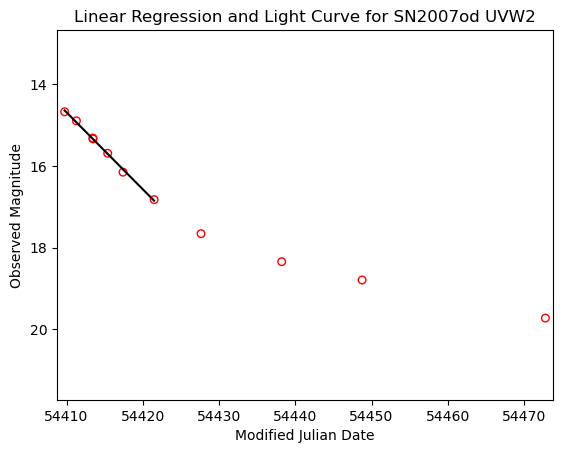

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:168: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  uvm2_slope = float((y2_pred[-1] - y2_pred[0]) / (x2[-1] - x2[0]))


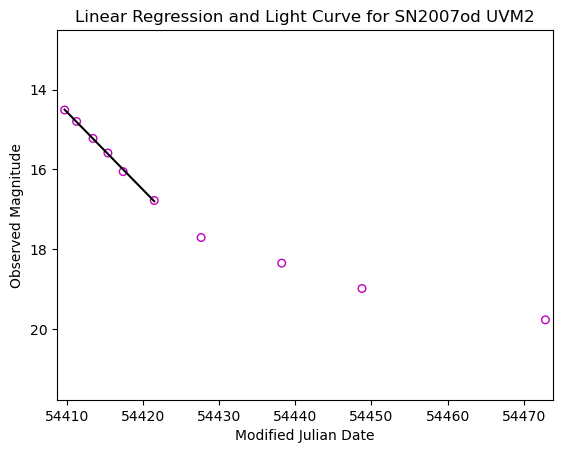

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:213: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  uvw1_slope = float((y_pred[-1] - y_pred[0]) / (x[-1] - x[0]))


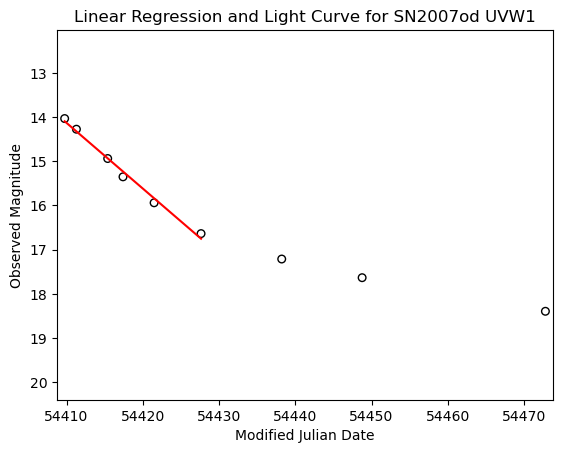

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:257: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  u_slope = float((y3_pred[-1] - y3_pred[0]) / (x3[-1] - x3[0]))


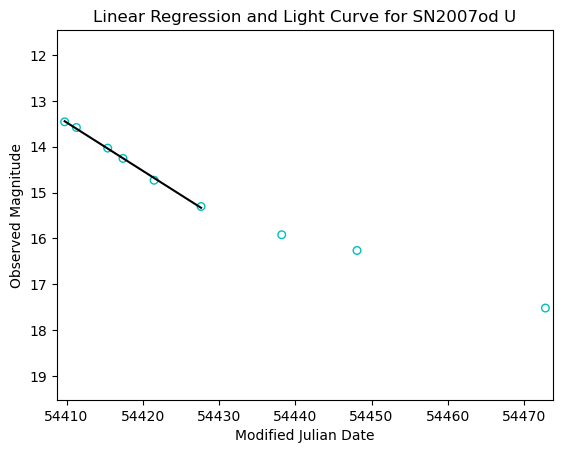

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:302: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  b_slope = float((y5_pred[-1] - y5_pred[0]) / (x5[-1] - x5[0]))


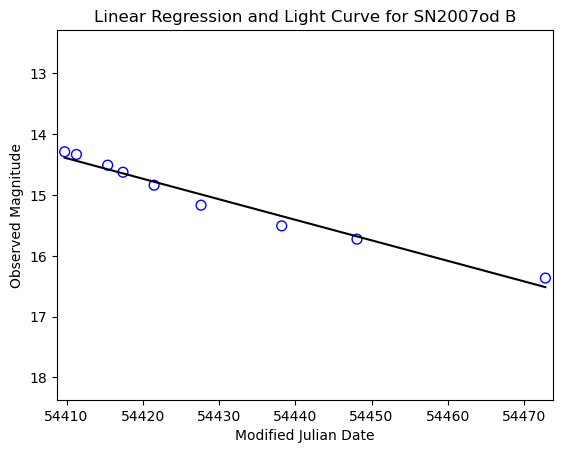

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:346: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  v_slope = float((y4_pred[-1] - y4_pred[0]) / (x4[-1] - x4[0]))


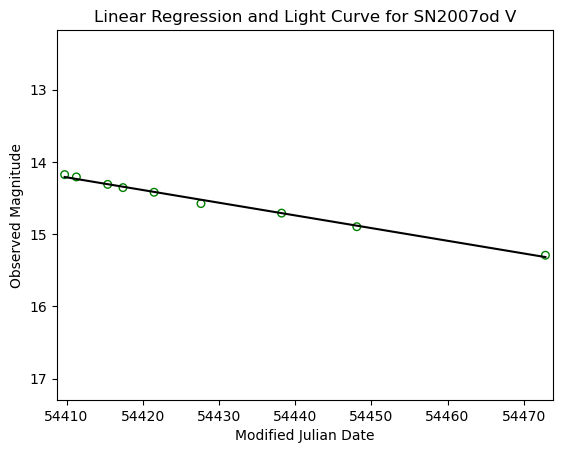

UVW2: 0.188
UVM2: 0.195
UVW1: 0.148
U: 0.106
V: 0.018
B: 0.034


In [17]:
new_LinearR('SN2007od.txt',54409,54427.6373,54409,54427.64,54409,54438.2122,54409,54438.2138,54409,54473,54409,54473)

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:20: UserWarning: Input line 1 contained no data and will not be counted towards `max_rows=50000`.  This differs from the behaviour in NumPy <=1.22 which counted lines rather than rows.  If desired, the previous behaviour can be achieved by using `itertools.islice`.
Please see the 1.23 release notes for an example on how to do this.  If you wish to ignore this warning, use `warnings.filterwarnings`.  This warning is expected to be removed in the future and is given only once per `loadtxt` call.
  fil, mjd, mag, magerr = np.loadtxt(data, dtype=str, usecols = (0,1,2,3), unpack=True) #unpack lets you assign columns names
C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:123: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  uvw2_slope = float(

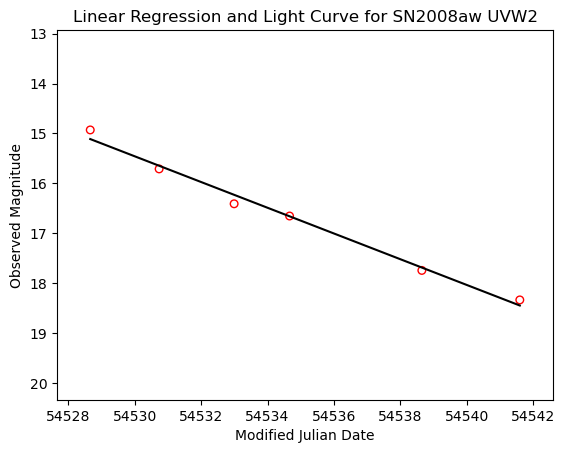

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:168: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  uvm2_slope = float((y2_pred[-1] - y2_pred[0]) / (x2[-1] - x2[0]))


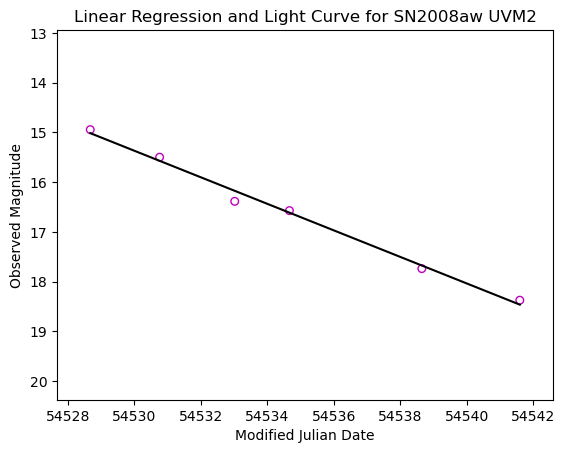

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:213: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  uvw1_slope = float((y_pred[-1] - y_pred[0]) / (x[-1] - x[0]))


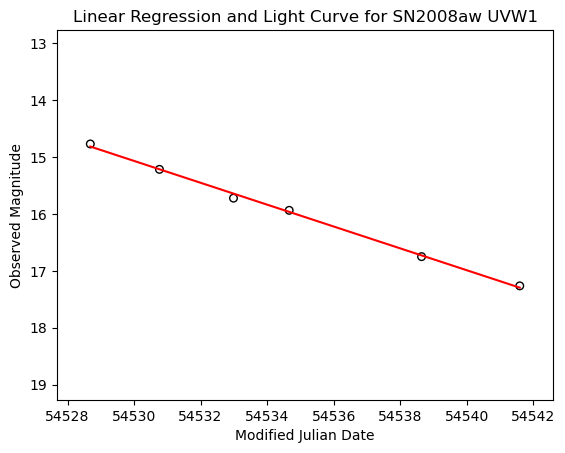

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:257: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  u_slope = float((y3_pred[-1] - y3_pred[0]) / (x3[-1] - x3[0]))


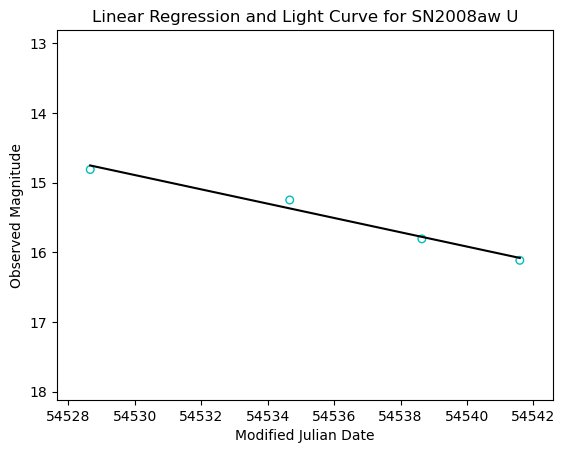

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:302: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  b_slope = float((y5_pred[-1] - y5_pred[0]) / (x5[-1] - x5[0]))


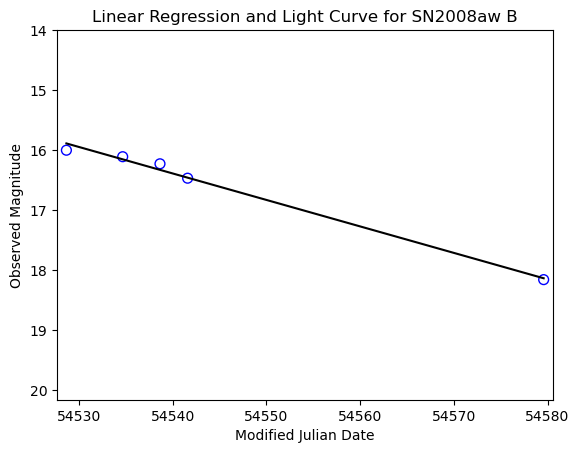

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:346: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  v_slope = float((y4_pred[-1] - y4_pred[0]) / (x4[-1] - x4[0]))


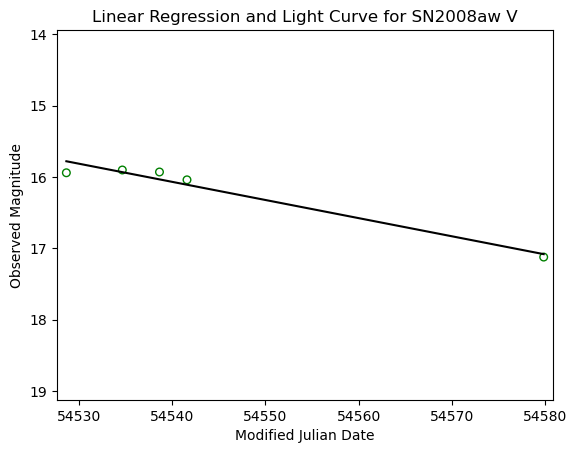

UVW2: 0.258
UVM2: 0.267
UVW1: 0.192
U: 0.103
V: 0.025
B: 0.044


In [18]:
new_LinearR('SN2008aw.txt',54528,54579.8139,54528,54579.7183,54528,54579.5802,54528,54579.5811,54528,54580,54528,54580)

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:20: UserWarning: Input line 1 contained no data and will not be counted towards `max_rows=50000`.  This differs from the behaviour in NumPy <=1.22 which counted lines rather than rows.  If desired, the previous behaviour can be achieved by using `itertools.islice`.
Please see the 1.23 release notes for an example on how to do this.  If you wish to ignore this warning, use `warnings.filterwarnings`.  This warning is expected to be removed in the future and is given only once per `loadtxt` call.
  fil, mjd, mag, magerr = np.loadtxt(data, dtype=str, usecols = (0,1,2,3), unpack=True) #unpack lets you assign columns names
C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:123: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  uvw2_slope = float(

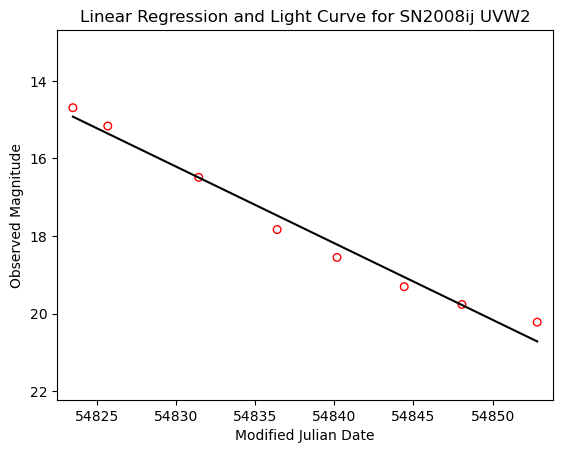

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:168: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  uvm2_slope = float((y2_pred[-1] - y2_pred[0]) / (x2[-1] - x2[0]))


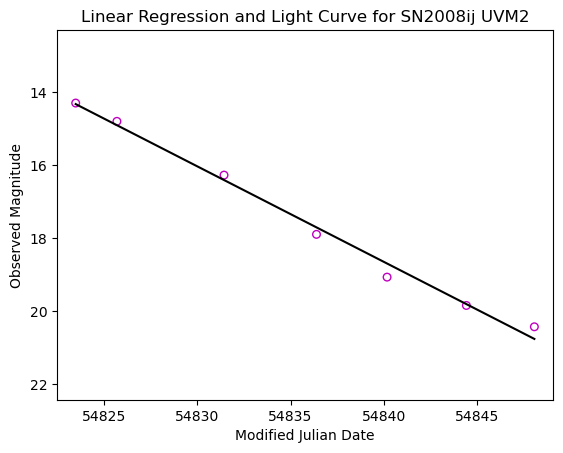

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:213: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  uvw1_slope = float((y_pred[-1] - y_pred[0]) / (x[-1] - x[0]))


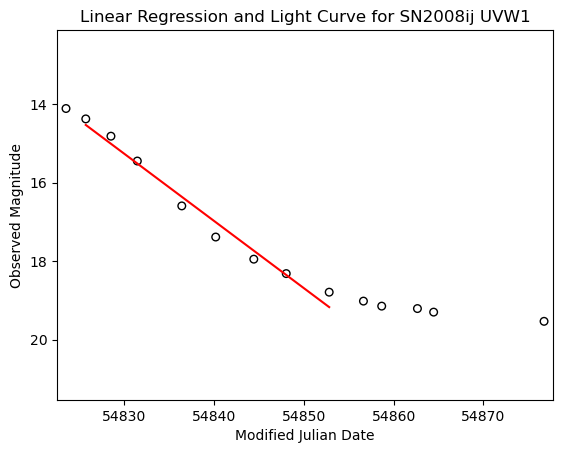

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:257: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  u_slope = float((y3_pred[-1] - y3_pred[0]) / (x3[-1] - x3[0]))


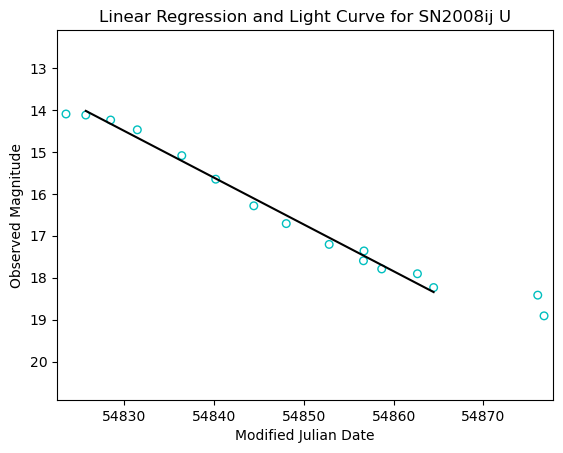

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:302: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  b_slope = float((y5_pred[-1] - y5_pred[0]) / (x5[-1] - x5[0]))


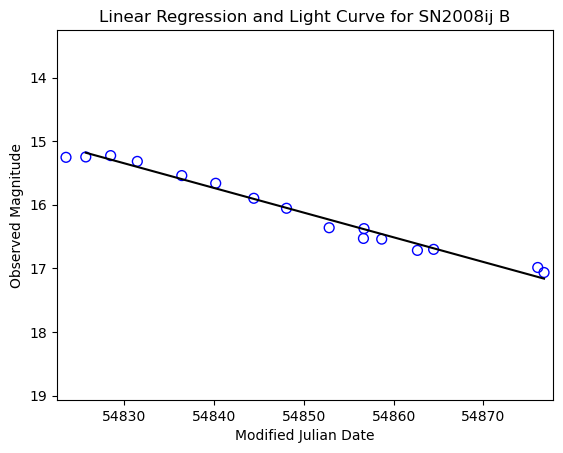

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:346: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  v_slope = float((y4_pred[-1] - y4_pred[0]) / (x4[-1] - x4[0]))


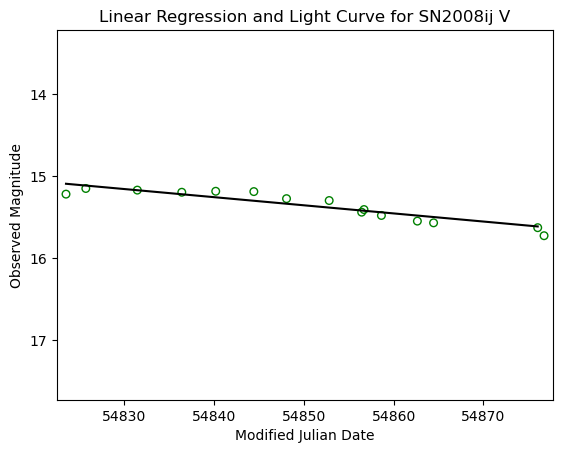

UVW2: 0.198
UVM2: 0.262
UVW1: 0.171
U: 0.111
V: 0.010
B: 0.039


In [19]:
new_LinearR('SN2008ij.txt',54823,54862.6429,54823,54852.8187,54823.4807,54856.6289,54823.4819,54876.0572,54823.4866,54877,54823.4827,54876.7611)

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:20: UserWarning: Input line 1 contained no data and will not be counted towards `max_rows=50000`.  This differs from the behaviour in NumPy <=1.22 which counted lines rather than rows.  If desired, the previous behaviour can be achieved by using `itertools.islice`.
Please see the 1.23 release notes for an example on how to do this.  If you wish to ignore this warning, use `warnings.filterwarnings`.  This warning is expected to be removed in the future and is given only once per `loadtxt` call.
  fil, mjd, mag, magerr = np.loadtxt(data, dtype=str, usecols = (0,1,2,3), unpack=True) #unpack lets you assign columns names
C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:123: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  uvw2_slope = float(

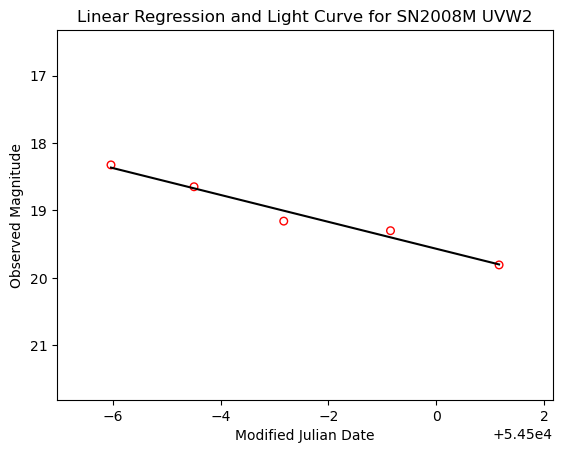

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:168: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  uvm2_slope = float((y2_pred[-1] - y2_pred[0]) / (x2[-1] - x2[0]))


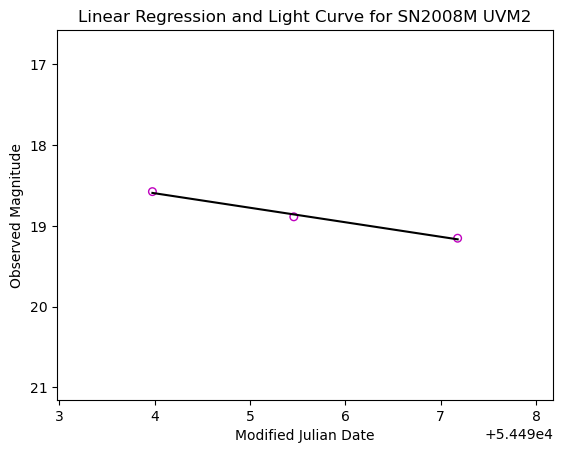

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:213: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  uvw1_slope = float((y_pred[-1] - y_pred[0]) / (x[-1] - x[0]))


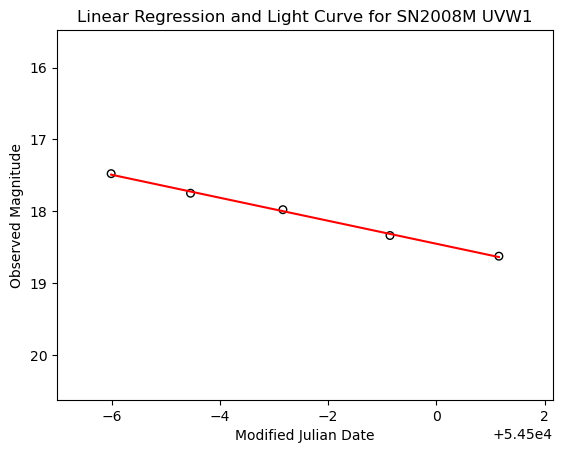

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:257: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  u_slope = float((y3_pred[-1] - y3_pred[0]) / (x3[-1] - x3[0]))


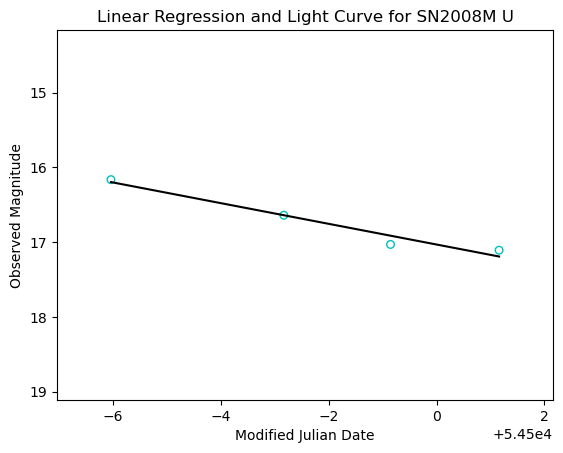

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:302: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  b_slope = float((y5_pred[-1] - y5_pred[0]) / (x5[-1] - x5[0]))


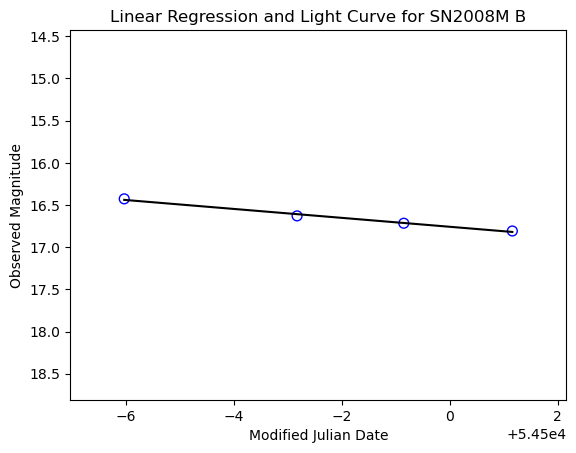

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:346: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  v_slope = float((y4_pred[-1] - y4_pred[0]) / (x4[-1] - x4[0]))


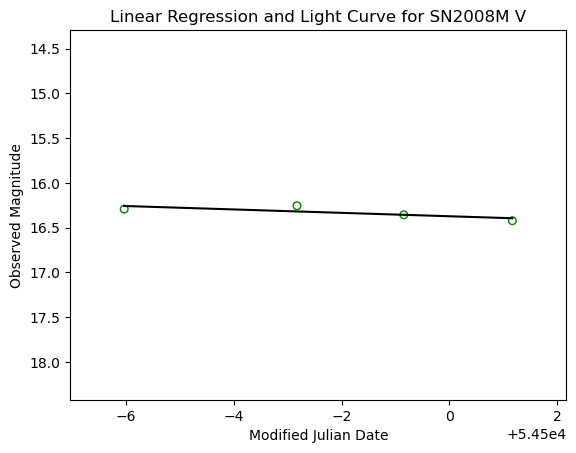

UVW2: 0.200
UVM2: 0.180
UVW1: 0.160
U: 0.138
V: 0.019
B: 0.053


In [20]:
new_LinearR('SN2008M.txt',54493,54502,54493,54499.1554,54493,54502,54493,54502,54493,54502,54493,54502)

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:20: UserWarning: Input line 1 contained no data and will not be counted towards `max_rows=50000`.  This differs from the behaviour in NumPy <=1.22 which counted lines rather than rows.  If desired, the previous behaviour can be achieved by using `itertools.islice`.
Please see the 1.23 release notes for an example on how to do this.  If you wish to ignore this warning, use `warnings.filterwarnings`.  This warning is expected to be removed in the future and is given only once per `loadtxt` call.
  fil, mjd, mag, magerr = np.loadtxt(data, dtype=str, usecols = (0,1,2,3), unpack=True) #unpack lets you assign columns names
C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:123: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  uvw2_slope = float(

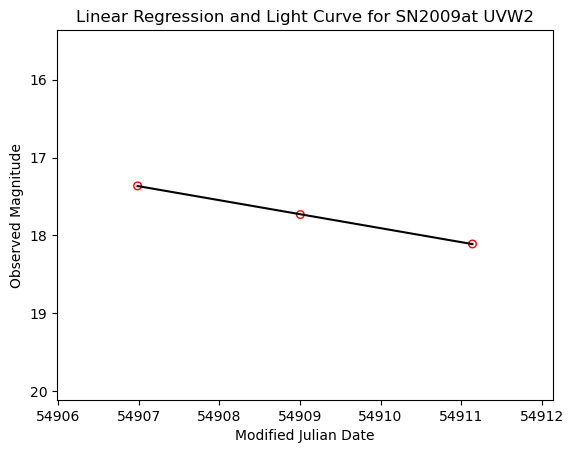

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:168: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  uvm2_slope = float((y2_pred[-1] - y2_pred[0]) / (x2[-1] - x2[0]))


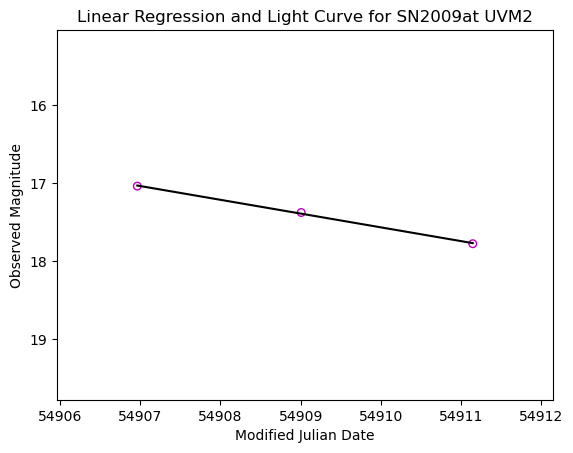

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:213: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  uvw1_slope = float((y_pred[-1] - y_pred[0]) / (x[-1] - x[0]))


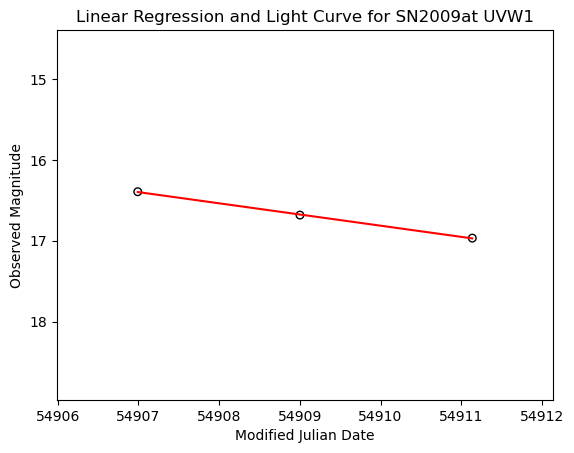

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:257: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  u_slope = float((y3_pred[-1] - y3_pred[0]) / (x3[-1] - x3[0]))


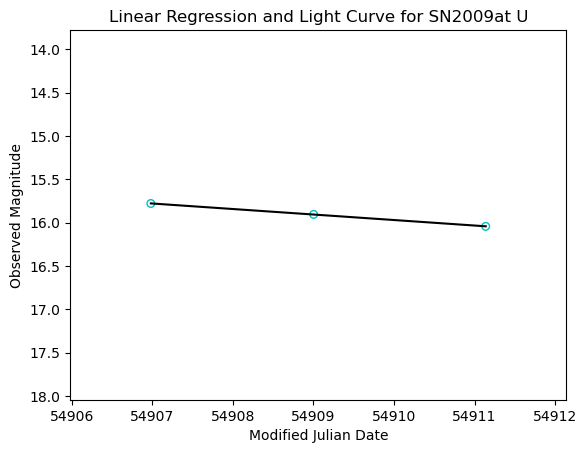

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:302: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  b_slope = float((y5_pred[-1] - y5_pred[0]) / (x5[-1] - x5[0]))


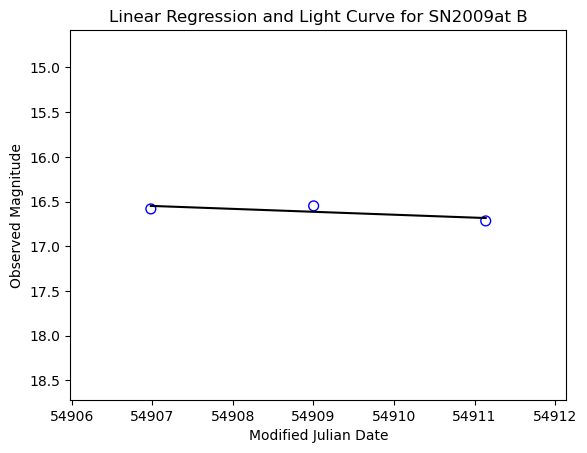

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:346: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  v_slope = float((y4_pred[-1] - y4_pred[0]) / (x4[-1] - x4[0]))


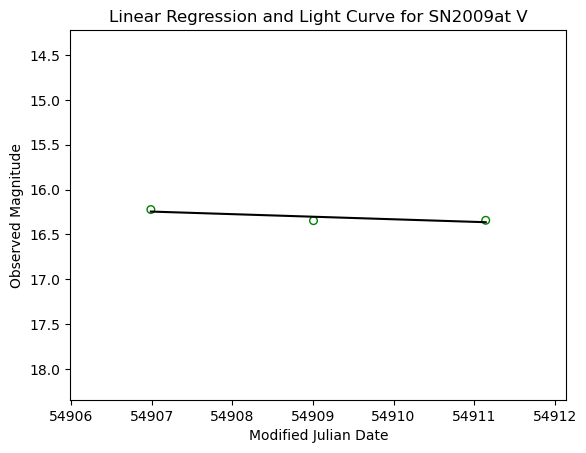

UVW2: 0.179
UVM2: 0.177
UVW1: 0.138
U: 0.064
V: 0.029
B: 0.033


In [21]:
new_LinearR('SN2009at.txt',54906,54912,54906,54912,54906,54912,54906,54912,54906,54912,54906,54912)

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:20: UserWarning: Input line 1 contained no data and will not be counted towards `max_rows=50000`.  This differs from the behaviour in NumPy <=1.22 which counted lines rather than rows.  If desired, the previous behaviour can be achieved by using `itertools.islice`.
Please see the 1.23 release notes for an example on how to do this.  If you wish to ignore this warning, use `warnings.filterwarnings`.  This warning is expected to be removed in the future and is given only once per `loadtxt` call.
  fil, mjd, mag, magerr = np.loadtxt(data, dtype=str, usecols = (0,1,2,3), unpack=True) #unpack lets you assign columns names


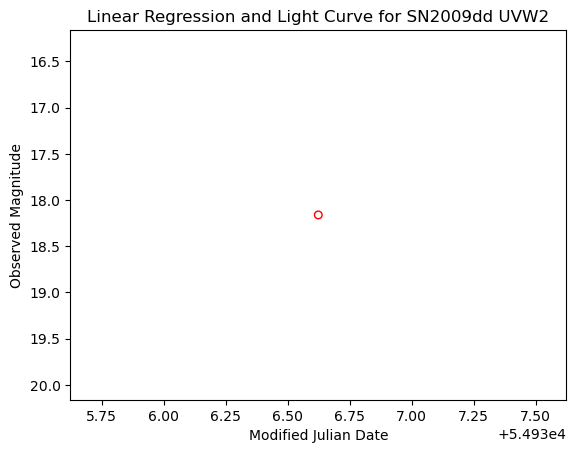

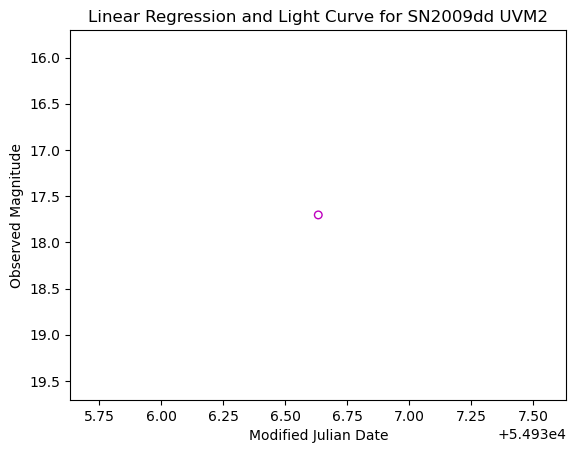

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:213: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  uvw1_slope = float((y_pred[-1] - y_pred[0]) / (x[-1] - x[0]))


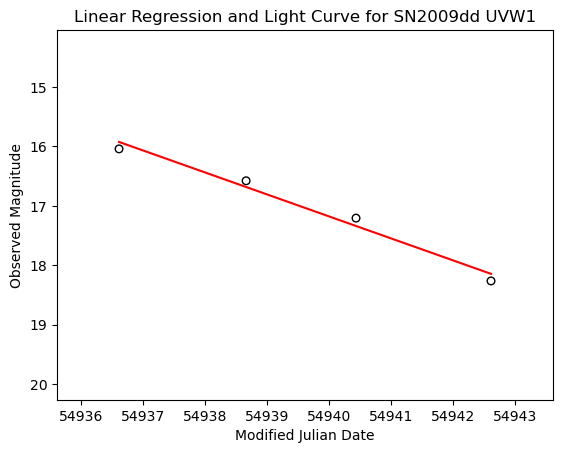

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:257: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  u_slope = float((y3_pred[-1] - y3_pred[0]) / (x3[-1] - x3[0]))


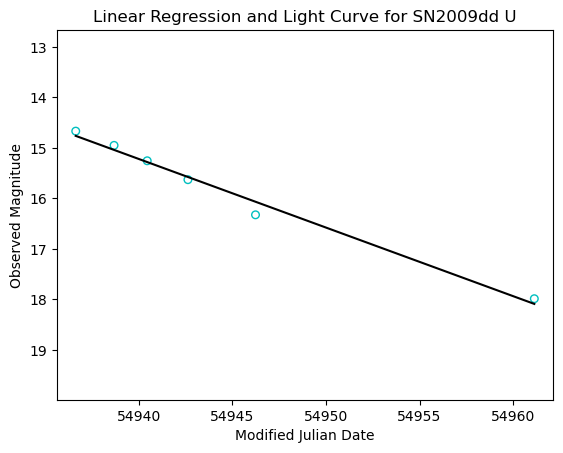

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:302: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  b_slope = float((y5_pred[-1] - y5_pred[0]) / (x5[-1] - x5[0]))


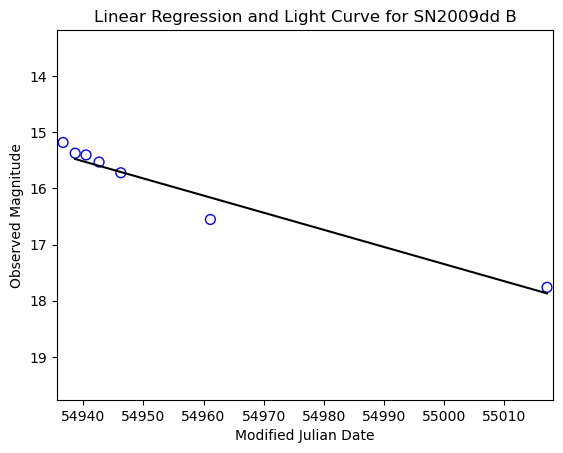

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:346: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  v_slope = float((y4_pred[-1] - y4_pred[0]) / (x4[-1] - x4[0]))


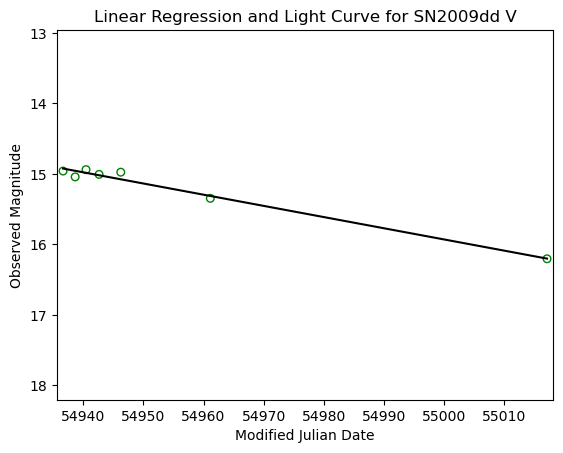

UVW2: nan
UVM2: nan
UVW1: 0.370
U: 0.136
V: 0.016
B: 0.030


In [22]:
new_LinearR('SN2009dd.txt',54936,55053.0869,54936,55090.1987,54936,54946.229,54936,55017.142,54936.6262,55017.1448,54936.6215,55018)

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:20: UserWarning: Input line 1 contained no data and will not be counted towards `max_rows=50000`.  This differs from the behaviour in NumPy <=1.22 which counted lines rather than rows.  If desired, the previous behaviour can be achieved by using `itertools.islice`.
Please see the 1.23 release notes for an example on how to do this.  If you wish to ignore this warning, use `warnings.filterwarnings`.  This warning is expected to be removed in the future and is given only once per `loadtxt` call.
  fil, mjd, mag, magerr = np.loadtxt(data, dtype=str, usecols = (0,1,2,3), unpack=True) #unpack lets you assign columns names
C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:123: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  uvw2_slope = float(

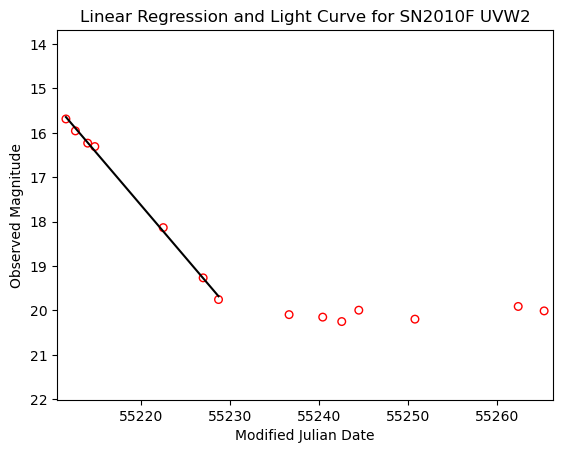

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:168: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  uvm2_slope = float((y2_pred[-1] - y2_pred[0]) / (x2[-1] - x2[0]))


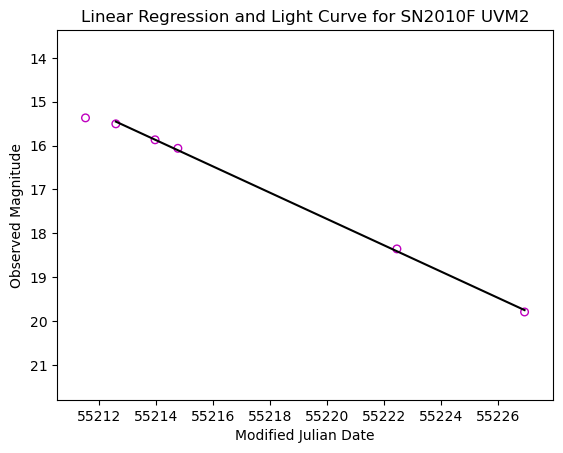

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:213: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  uvw1_slope = float((y_pred[-1] - y_pred[0]) / (x[-1] - x[0]))


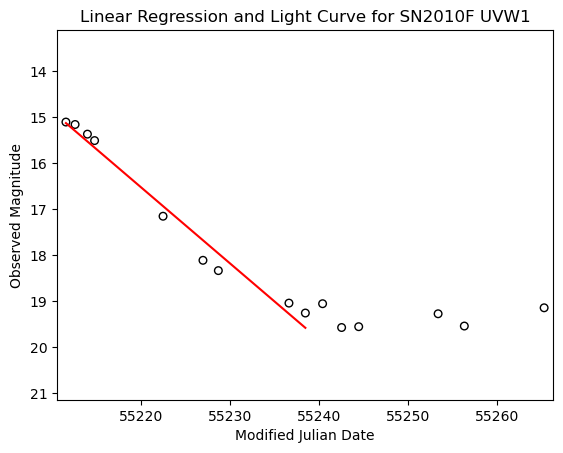

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:257: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  u_slope = float((y3_pred[-1] - y3_pred[0]) / (x3[-1] - x3[0]))


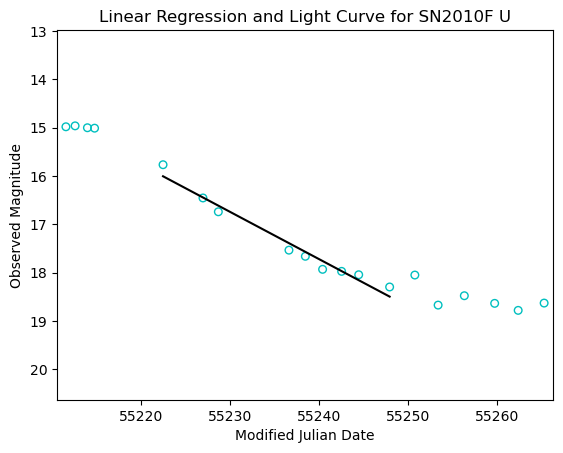

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:302: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  b_slope = float((y5_pred[-1] - y5_pred[0]) / (x5[-1] - x5[0]))


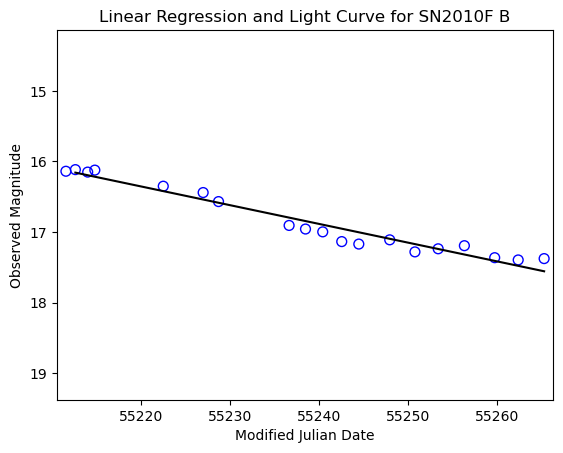

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:346: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  v_slope = float((y4_pred[-1] - y4_pred[0]) / (x4[-1] - x4[0]))


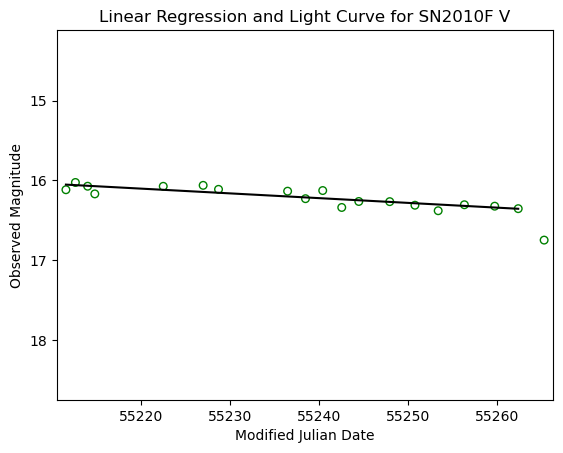

UVW2: 0.235
UVM2: 0.299
UVW1: 0.166
U: 0.098
V: 0.006
B: 0.027


In [23]:
new_LinearR('SN2010F.txt',55211,55236.6,55211.5145,55265.28,55211,55240.3774,55214.7542,55250.7471,55211.5102,55265.2777,55211.5044,55265.2749)

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:20: UserWarning: Input line 1 contained no data and will not be counted towards `max_rows=50000`.  This differs from the behaviour in NumPy <=1.22 which counted lines rather than rows.  If desired, the previous behaviour can be achieved by using `itertools.islice`.
Please see the 1.23 release notes for an example on how to do this.  If you wish to ignore this warning, use `warnings.filterwarnings`.  This warning is expected to be removed in the future and is given only once per `loadtxt` call.
  fil, mjd, mag, magerr = np.loadtxt(data, dtype=str, usecols = (0,1,2,3), unpack=True) #unpack lets you assign columns names
C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:123: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  uvw2_slope = float(

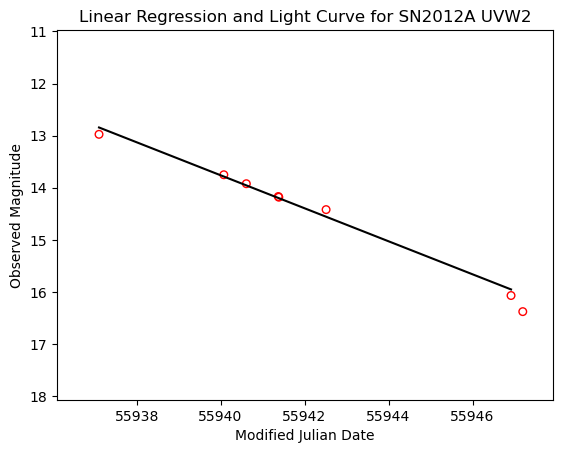

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:168: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  uvm2_slope = float((y2_pred[-1] - y2_pred[0]) / (x2[-1] - x2[0]))


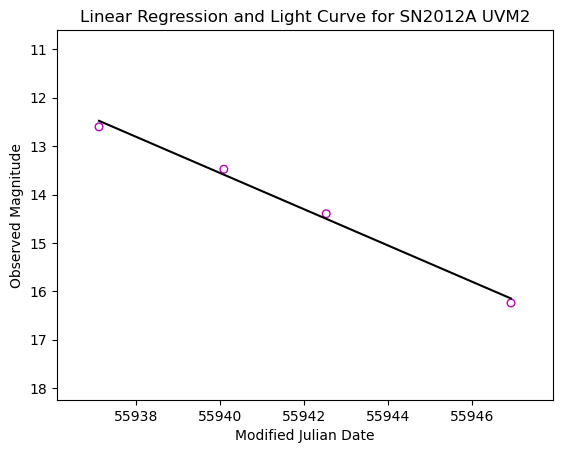

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:213: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  uvw1_slope = float((y_pred[-1] - y_pred[0]) / (x[-1] - x[0]))


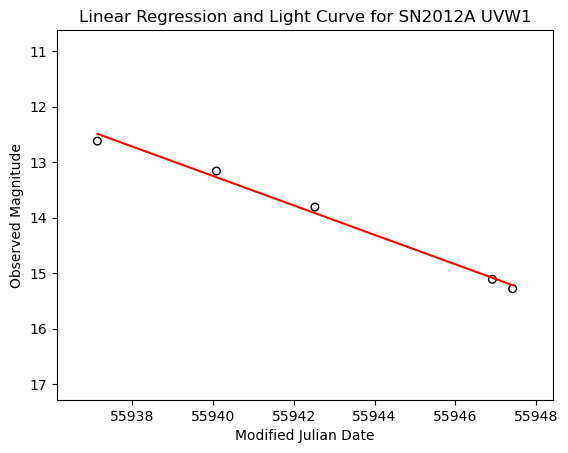

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:257: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  u_slope = float((y3_pred[-1] - y3_pred[0]) / (x3[-1] - x3[0]))


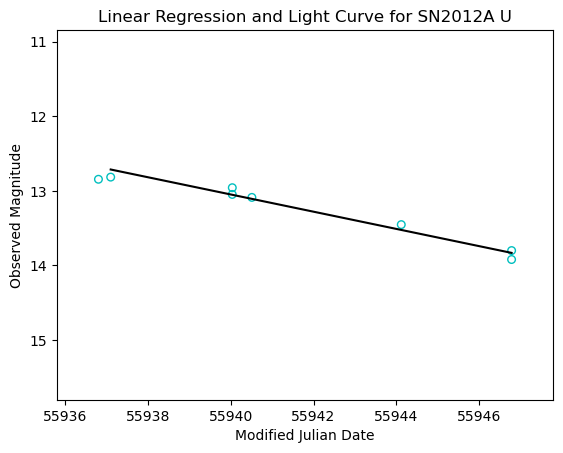

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:302: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  b_slope = float((y5_pred[-1] - y5_pred[0]) / (x5[-1] - x5[0]))


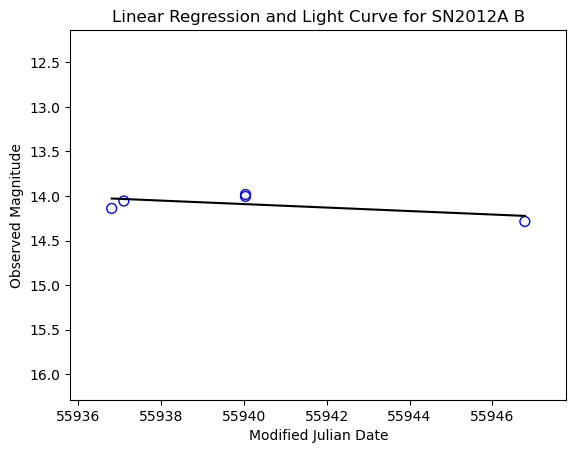

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:346: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  v_slope = float((y4_pred[-1] - y4_pred[0]) / (x4[-1] - x4[0]))


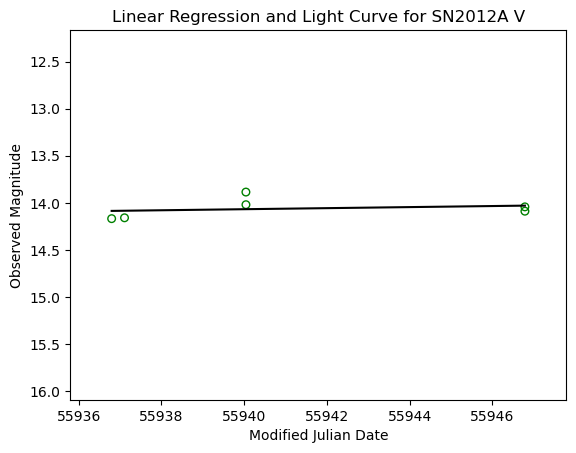

UVW2: 0.317
UVM2: 0.374
UVW1: 0.265
U: 0.116
V: -0.006
B: 0.020


In [24]:
new_LinearR('SN2012A.txt',55936,55947,55937,55947,55937,55948,55936.8058,55946.782,55936.7951,55946.7854,55936,55947)

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:20: UserWarning: Input line 1 contained no data and will not be counted towards `max_rows=50000`.  This differs from the behaviour in NumPy <=1.22 which counted lines rather than rows.  If desired, the previous behaviour can be achieved by using `itertools.islice`.
Please see the 1.23 release notes for an example on how to do this.  If you wish to ignore this warning, use `warnings.filterwarnings`.  This warning is expected to be removed in the future and is given only once per `loadtxt` call.
  fil, mjd, mag, magerr = np.loadtxt(data, dtype=str, usecols = (0,1,2,3), unpack=True) #unpack lets you assign columns names
C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:123: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  uvw2_slope = float(

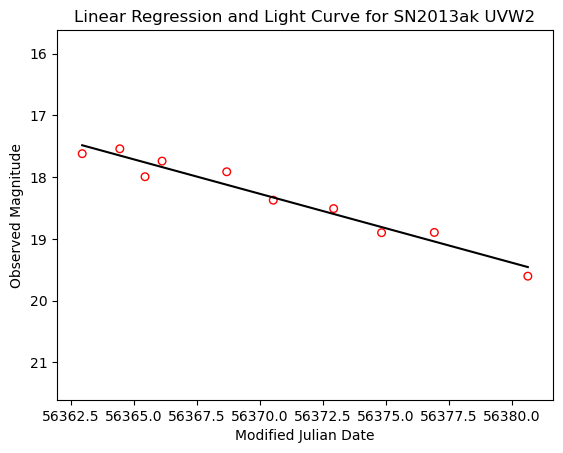

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:168: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  uvm2_slope = float((y2_pred[-1] - y2_pred[0]) / (x2[-1] - x2[0]))


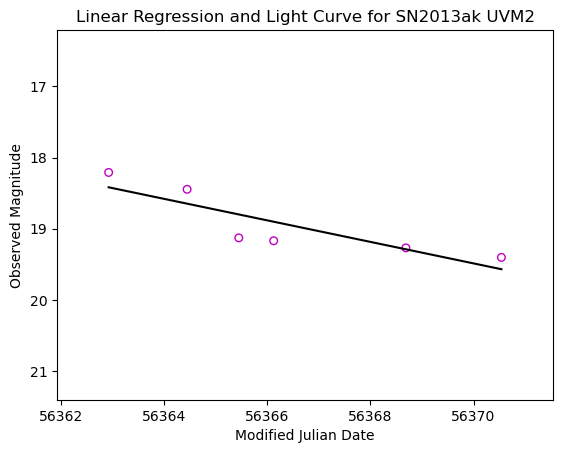

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:213: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  uvw1_slope = float((y_pred[-1] - y_pred[0]) / (x[-1] - x[0]))


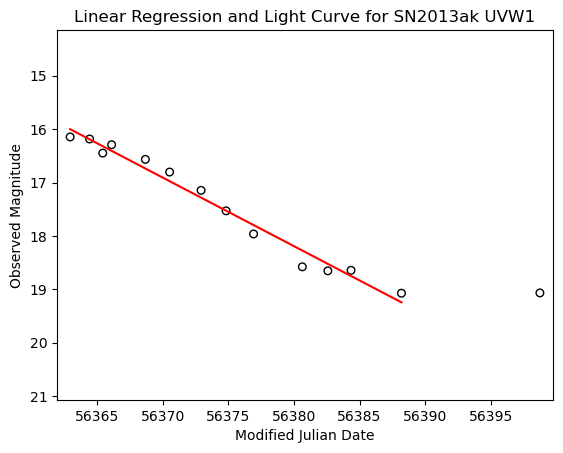

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:257: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  u_slope = float((y3_pred[-1] - y3_pred[0]) / (x3[-1] - x3[0]))


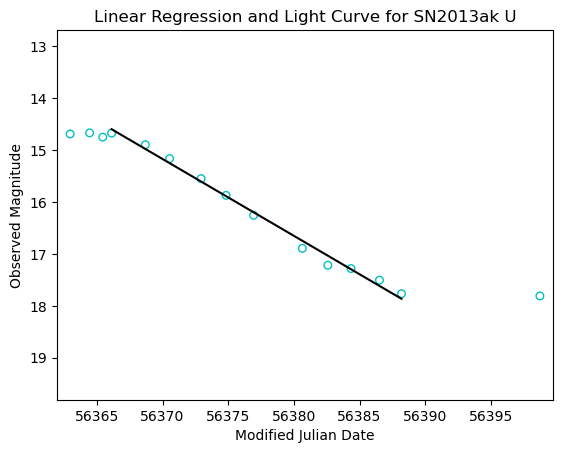

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:302: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  b_slope = float((y5_pred[-1] - y5_pred[0]) / (x5[-1] - x5[0]))


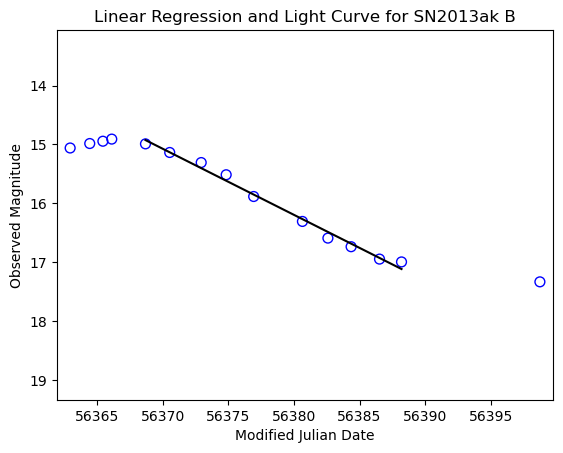

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:346: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  v_slope = float((y4_pred[-1] - y4_pred[0]) / (x4[-1] - x4[0]))


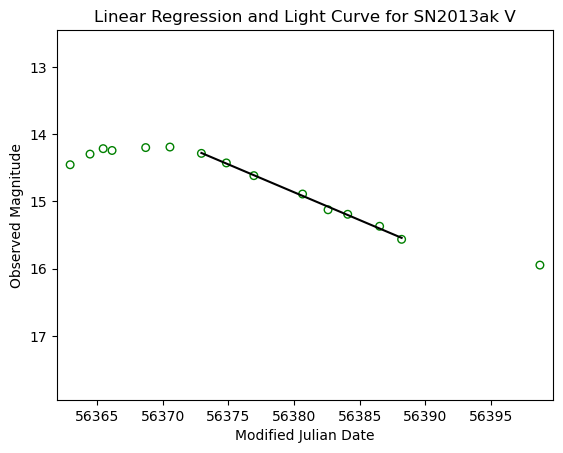

UVW2: 0.111
UVM2: 0.151
UVW1: 0.128
U: 0.148
V: 0.083
B: 0.112


In [25]:
new_LinearR('SN2013ak.txt',56362,56382.5872,56362,56372.9361,56362,56398.7337,56365.4399,56398.735,56366.1168,56398.7356,56370.5362,56398.7391)

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:20: UserWarning: Input line 1 contained no data and will not be counted towards `max_rows=50000`.  This differs from the behaviour in NumPy <=1.22 which counted lines rather than rows.  If desired, the previous behaviour can be achieved by using `itertools.islice`.
Please see the 1.23 release notes for an example on how to do this.  If you wish to ignore this warning, use `warnings.filterwarnings`.  This warning is expected to be removed in the future and is given only once per `loadtxt` call.
  fil, mjd, mag, magerr = np.loadtxt(data, dtype=str, usecols = (0,1,2,3), unpack=True) #unpack lets you assign columns names
C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:123: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  uvw2_slope = float(

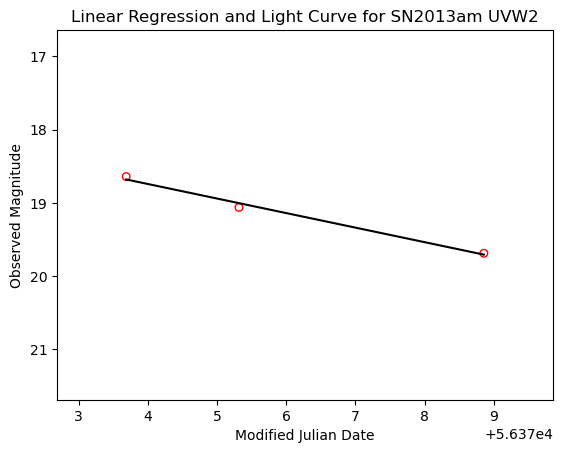

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:168: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  uvm2_slope = float((y2_pred[-1] - y2_pred[0]) / (x2[-1] - x2[0]))


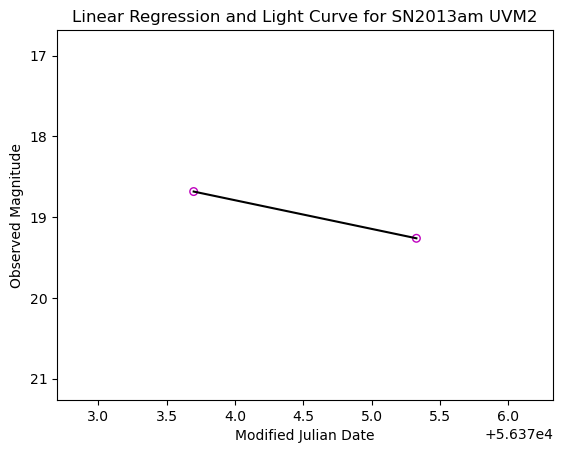

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:213: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  uvw1_slope = float((y_pred[-1] - y_pred[0]) / (x[-1] - x[0]))


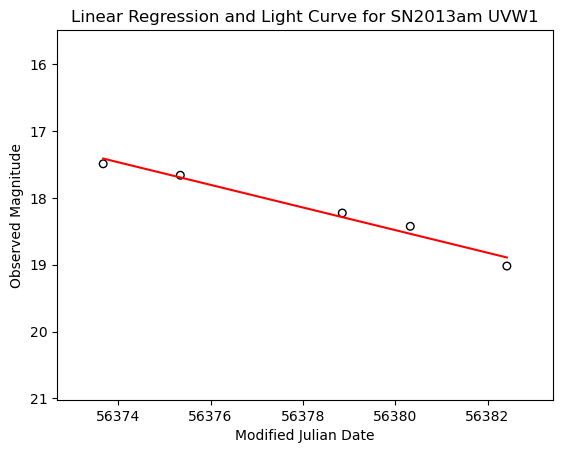

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:257: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  u_slope = float((y3_pred[-1] - y3_pred[0]) / (x3[-1] - x3[0]))


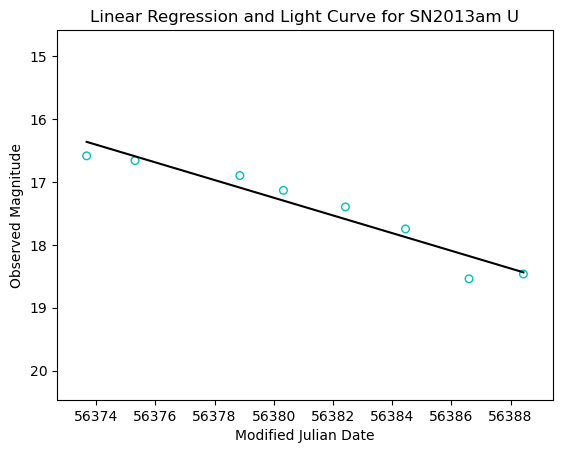

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:302: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  b_slope = float((y5_pred[-1] - y5_pred[0]) / (x5[-1] - x5[0]))


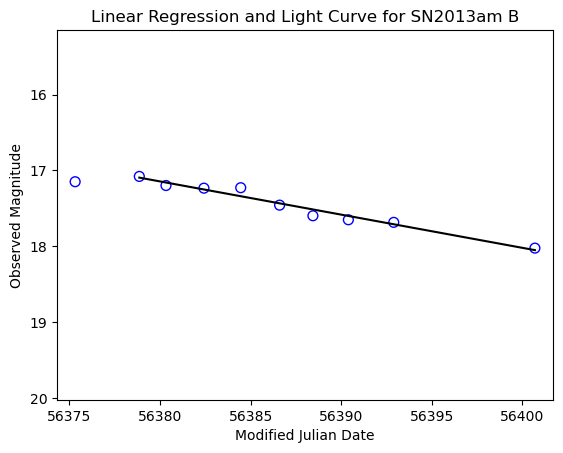

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:346: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  v_slope = float((y4_pred[-1] - y4_pred[0]) / (x4[-1] - x4[0]))


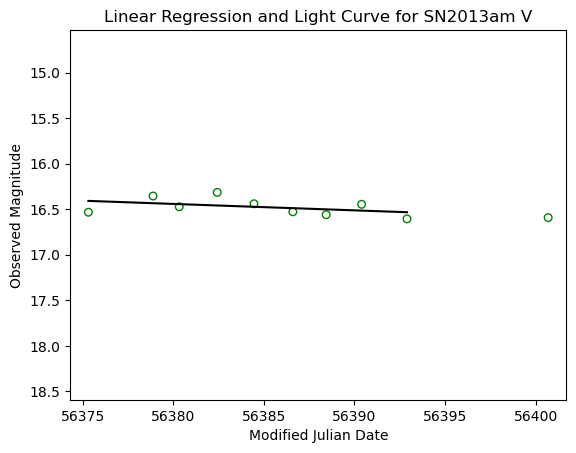

UVW2: 0.199
UVM2: 0.355
UVW1: 0.169
U: 0.141
V: 0.007
B: 0.044


In [26]:
new_LinearR('SN2013am.txt',56373,56380.329,56373,56376,56373,56383,56373,56390.3916,56375.3186,56400.6906,56375.3139,56400.6868)

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:20: UserWarning: Input line 1 contained no data and will not be counted towards `max_rows=50000`.  This differs from the behaviour in NumPy <=1.22 which counted lines rather than rows.  If desired, the previous behaviour can be achieved by using `itertools.islice`.
Please see the 1.23 release notes for an example on how to do this.  If you wish to ignore this warning, use `warnings.filterwarnings`.  This warning is expected to be removed in the future and is given only once per `loadtxt` call.
  fil, mjd, mag, magerr = np.loadtxt(data, dtype=str, usecols = (0,1,2,3), unpack=True) #unpack lets you assign columns names
C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:123: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  uvw2_slope = float(

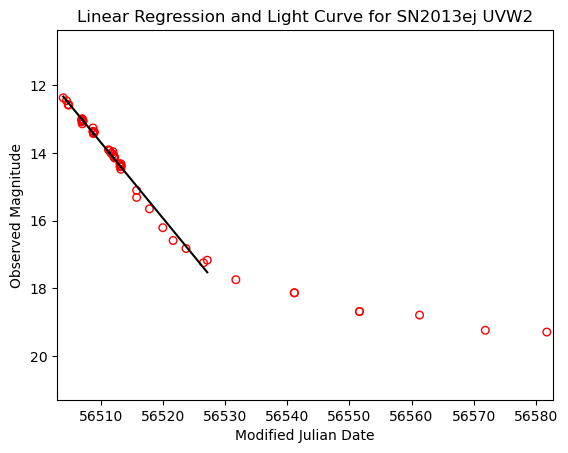

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:168: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  uvm2_slope = float((y2_pred[-1] - y2_pred[0]) / (x2[-1] - x2[0]))


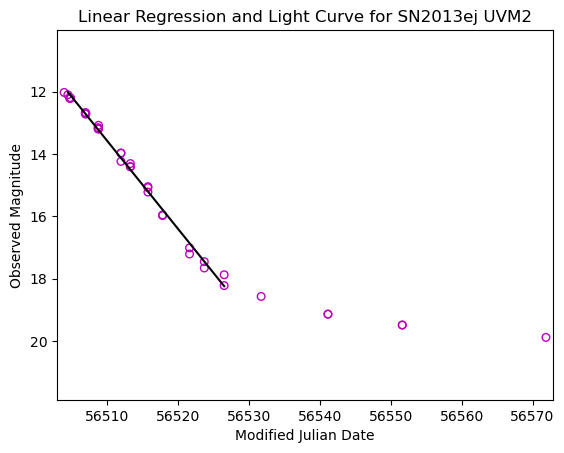

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:213: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  uvw1_slope = float((y_pred[-1] - y_pred[0]) / (x[-1] - x[0]))


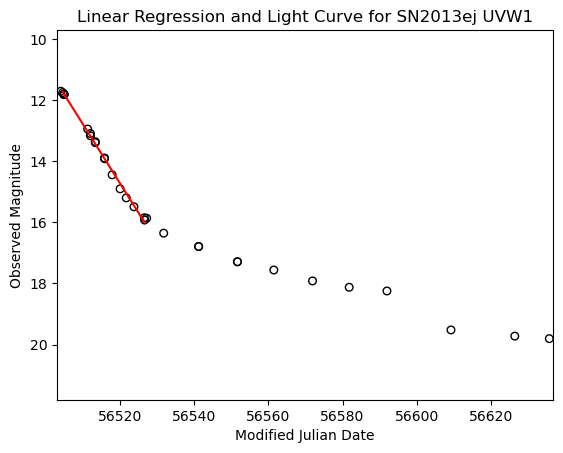

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:257: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  u_slope = float((y3_pred[-1] - y3_pred[0]) / (x3[-1] - x3[0]))


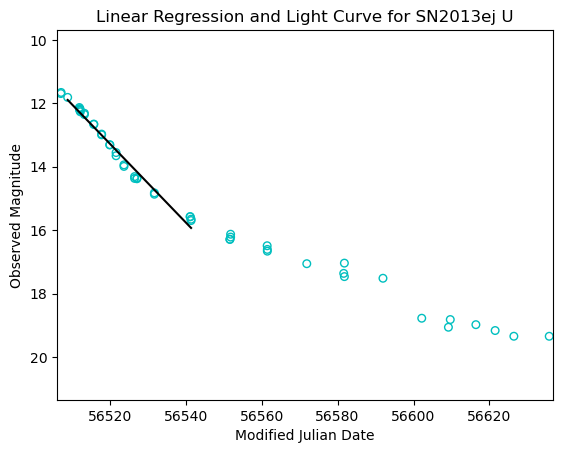

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:302: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  b_slope = float((y5_pred[-1] - y5_pred[0]) / (x5[-1] - x5[0]))


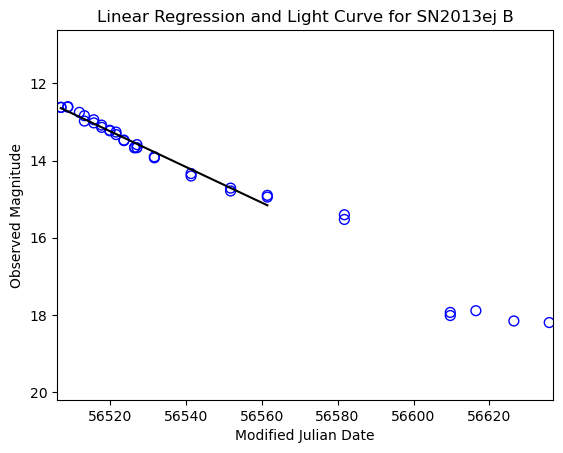

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:346: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  v_slope = float((y4_pred[-1] - y4_pred[0]) / (x4[-1] - x4[0]))


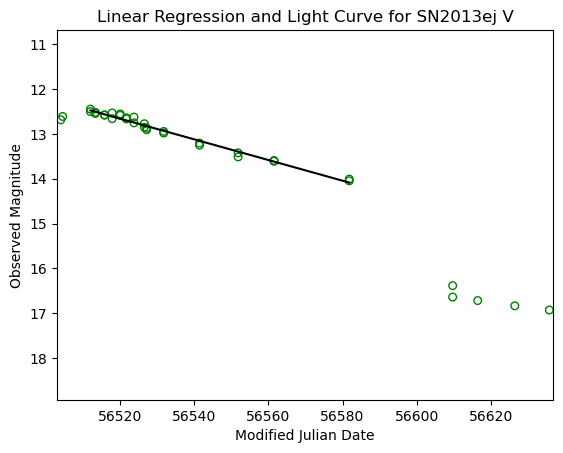

UVW2: 0.224
UVM2: 0.283
UVW1: 0.193
U: 0.124
V: 0.023
B: 0.046


In [27]:
new_LinearR('SN2013ej.txt',56503,56531.7416,56503.9812,56531.7460,56503.9731,56527.1389,56508.8969,56541.4073,56503.9787,56581.7886,56511.9819,56609.6838)

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:20: UserWarning: Input line 1 contained no data and will not be counted towards `max_rows=50000`.  This differs from the behaviour in NumPy <=1.22 which counted lines rather than rows.  If desired, the previous behaviour can be achieved by using `itertools.islice`.
Please see the 1.23 release notes for an example on how to do this.  If you wish to ignore this warning, use `warnings.filterwarnings`.  This warning is expected to be removed in the future and is given only once per `loadtxt` call.
  fil, mjd, mag, magerr = np.loadtxt(data, dtype=str, usecols = (0,1,2,3), unpack=True) #unpack lets you assign columns names
C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:123: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  uvw2_slope = float(

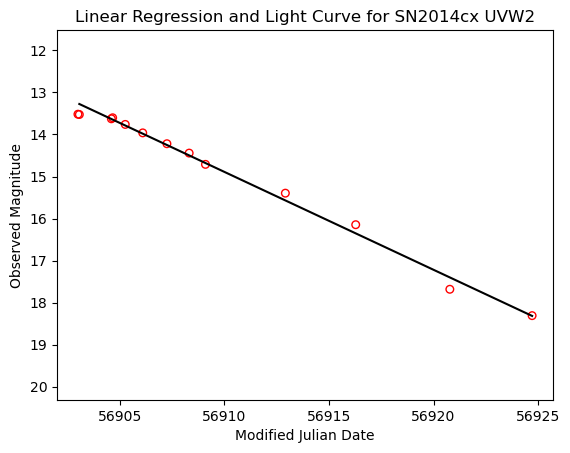

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:168: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  uvm2_slope = float((y2_pred[-1] - y2_pred[0]) / (x2[-1] - x2[0]))


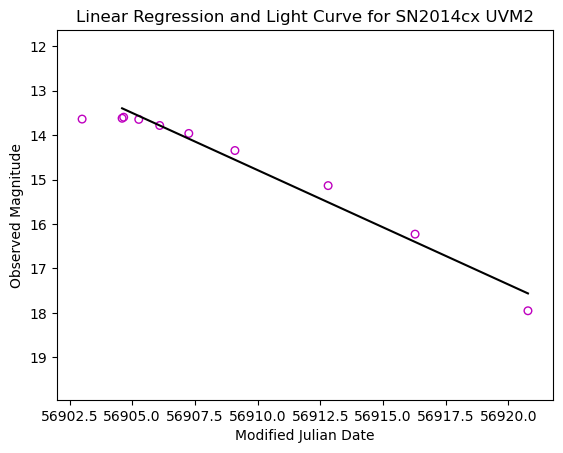

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:213: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  uvw1_slope = float((y_pred[-1] - y_pred[0]) / (x[-1] - x[0]))


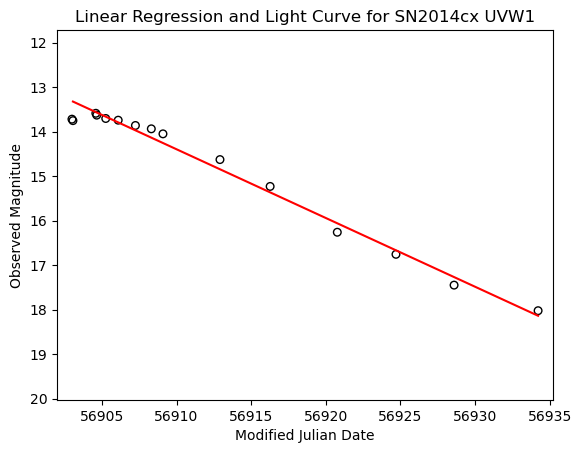

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:257: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  u_slope = float((y3_pred[-1] - y3_pred[0]) / (x3[-1] - x3[0]))


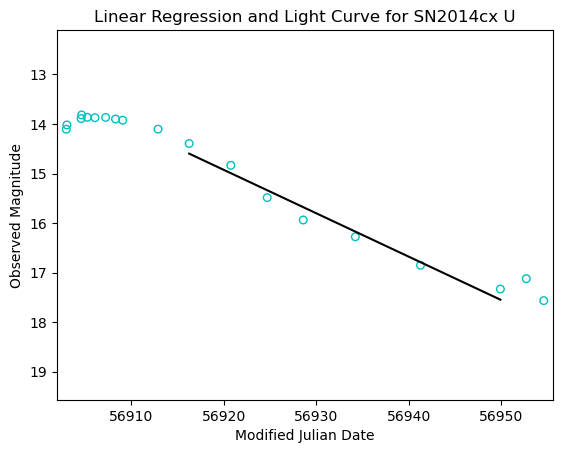

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:302: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  b_slope = float((y5_pred[-1] - y5_pred[0]) / (x5[-1] - x5[0]))


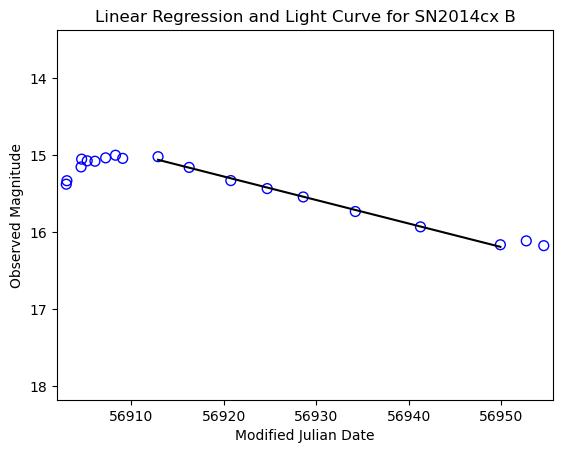

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:346: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  v_slope = float((y4_pred[-1] - y4_pred[0]) / (x4[-1] - x4[0]))


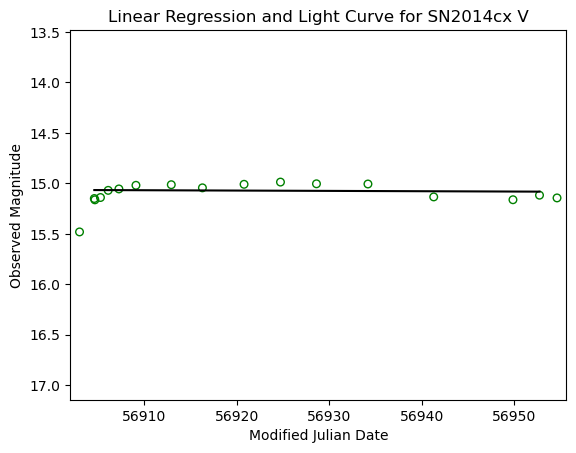

UVW2: 0.233
UVM2: 0.257
UVW1: 0.154
U: 0.088
V: 0.000
B: 0.031


In [28]:
new_LinearR('SN2014cx.txt',56902.9956,56928.6006,56903.0019,56924.7155,56902.9908,56941.2667,56912.9105,56952.7026,56909.0914,56952.7029,56902.998,56954.5986)

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:20: UserWarning: Input line 1 contained no data and will not be counted towards `max_rows=50000`.  This differs from the behaviour in NumPy <=1.22 which counted lines rather than rows.  If desired, the previous behaviour can be achieved by using `itertools.islice`.
Please see the 1.23 release notes for an example on how to do this.  If you wish to ignore this warning, use `warnings.filterwarnings`.  This warning is expected to be removed in the future and is given only once per `loadtxt` call.
  fil, mjd, mag, magerr = np.loadtxt(data, dtype=str, usecols = (0,1,2,3), unpack=True) #unpack lets you assign columns names
C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:123: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  uvw2_slope = float(

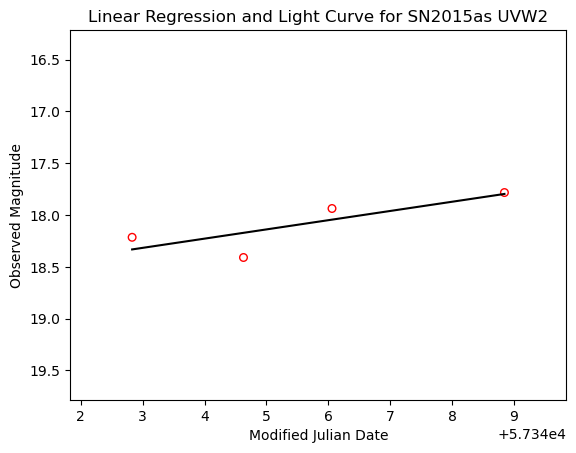

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:168: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  uvm2_slope = float((y2_pred[-1] - y2_pred[0]) / (x2[-1] - x2[0]))


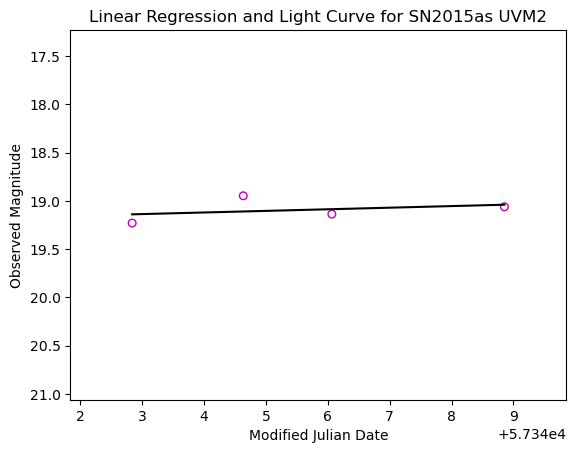

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:213: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  uvw1_slope = float((y_pred[-1] - y_pred[0]) / (x[-1] - x[0]))


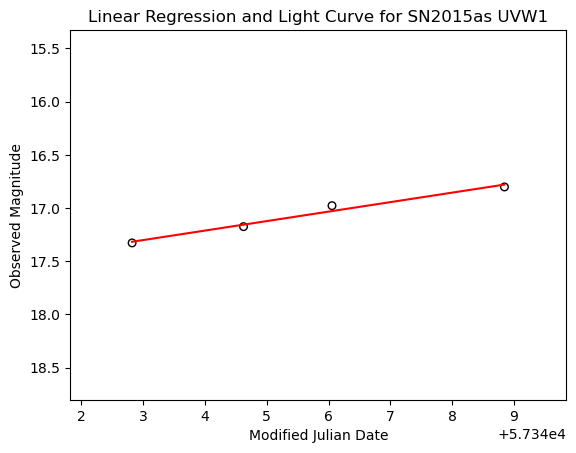

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:257: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  u_slope = float((y3_pred[-1] - y3_pred[0]) / (x3[-1] - x3[0]))


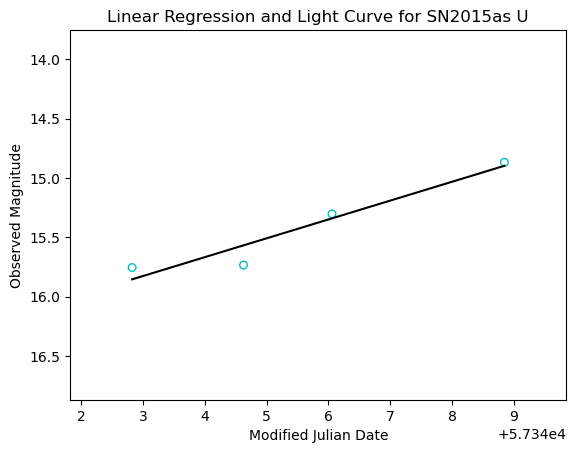

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:302: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  b_slope = float((y5_pred[-1] - y5_pred[0]) / (x5[-1] - x5[0]))


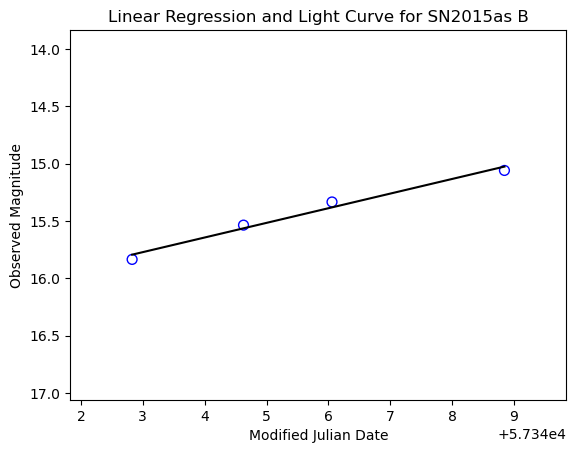

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:346: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  v_slope = float((y4_pred[-1] - y4_pred[0]) / (x4[-1] - x4[0]))


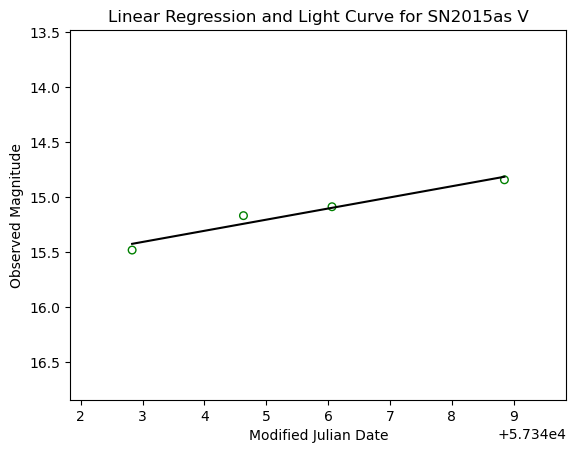

UVW2: -0.089
UVM2: -0.017
UVW1: -0.089
U: -0.159
V: -0.101
B: -0.128


In [29]:
new_LinearR('SN2015as.txt',57342,57349,57342,57349,57342,57349,57342,57349,57342,57349,57342,57349)

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:20: UserWarning: Input line 1 contained no data and will not be counted towards `max_rows=50000`.  This differs from the behaviour in NumPy <=1.22 which counted lines rather than rows.  If desired, the previous behaviour can be achieved by using `itertools.islice`.
Please see the 1.23 release notes for an example on how to do this.  If you wish to ignore this warning, use `warnings.filterwarnings`.  This warning is expected to be removed in the future and is given only once per `loadtxt` call.
  fil, mjd, mag, magerr = np.loadtxt(data, dtype=str, usecols = (0,1,2,3), unpack=True) #unpack lets you assign columns names
C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:123: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  uvw2_slope = float(

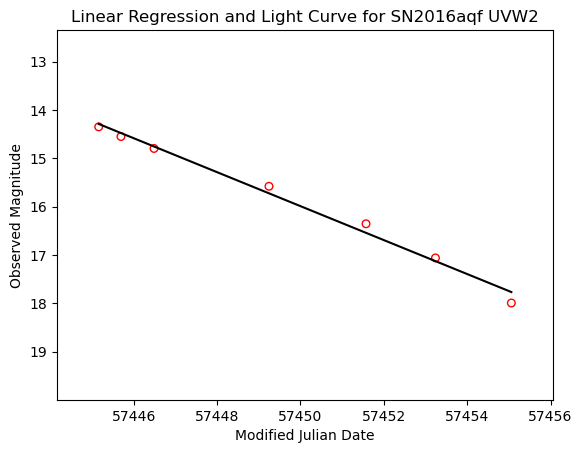

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:168: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  uvm2_slope = float((y2_pred[-1] - y2_pred[0]) / (x2[-1] - x2[0]))


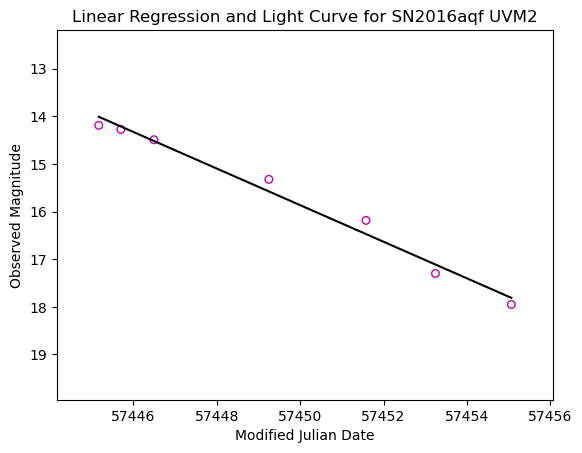

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:213: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  uvw1_slope = float((y_pred[-1] - y_pred[0]) / (x[-1] - x[0]))


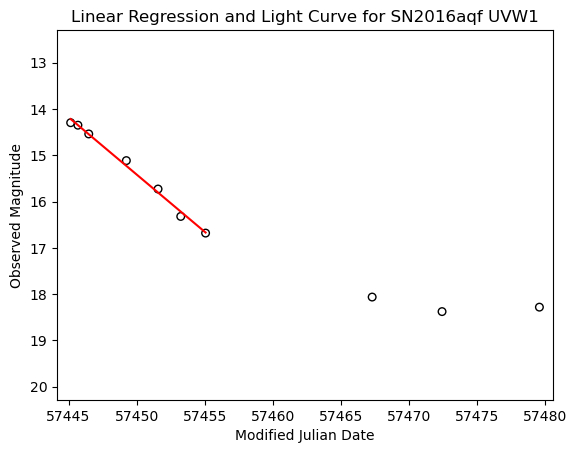

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:257: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  u_slope = float((y3_pred[-1] - y3_pred[0]) / (x3[-1] - x3[0]))


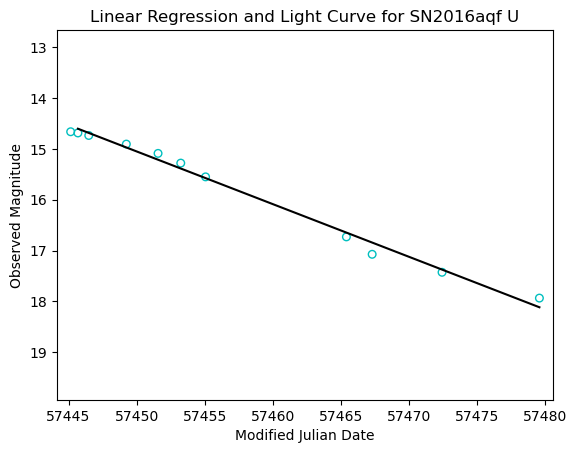

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:302: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  b_slope = float((y5_pred[-1] - y5_pred[0]) / (x5[-1] - x5[0]))


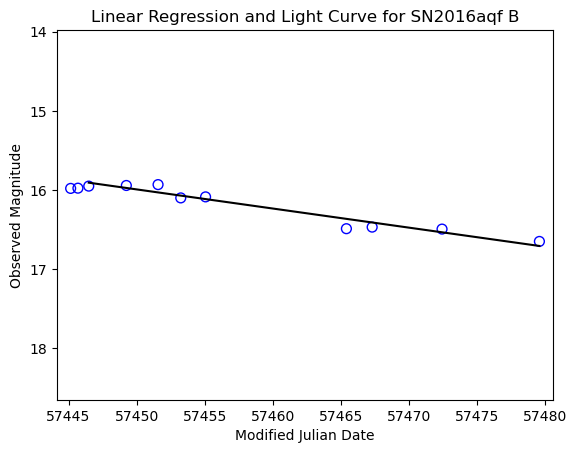

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:346: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  v_slope = float((y4_pred[-1] - y4_pred[0]) / (x4[-1] - x4[0]))


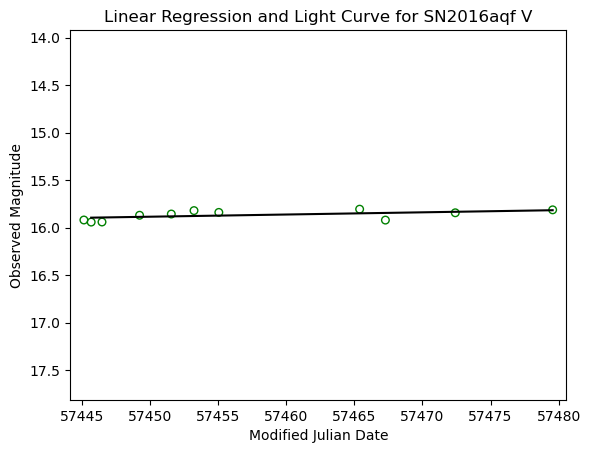

UVW2: 0.351
UVM2: 0.384
UVW1: 0.248
U: 0.104
V: -0.002
B: 0.024


In [30]:
new_LinearR('SN2016aqf.txt',57445,57465.3948,57445,57465.3973,57445,57467.2824,57445.1551,57480,57445.6899,57480,57445.1608,57480)

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:20: UserWarning: Input line 1 contained no data and will not be counted towards `max_rows=50000`.  This differs from the behaviour in NumPy <=1.22 which counted lines rather than rows.  If desired, the previous behaviour can be achieved by using `itertools.islice`.
Please see the 1.23 release notes for an example on how to do this.  If you wish to ignore this warning, use `warnings.filterwarnings`.  This warning is expected to be removed in the future and is given only once per `loadtxt` call.
  fil, mjd, mag, magerr = np.loadtxt(data, dtype=str, usecols = (0,1,2,3), unpack=True) #unpack lets you assign columns names
C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:123: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  uvw2_slope = float(

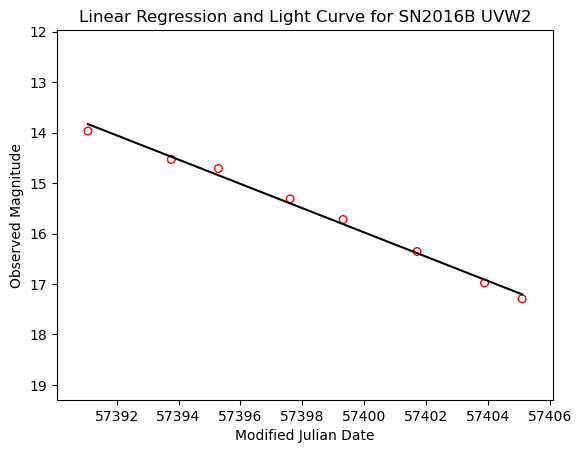

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:168: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  uvm2_slope = float((y2_pred[-1] - y2_pred[0]) / (x2[-1] - x2[0]))


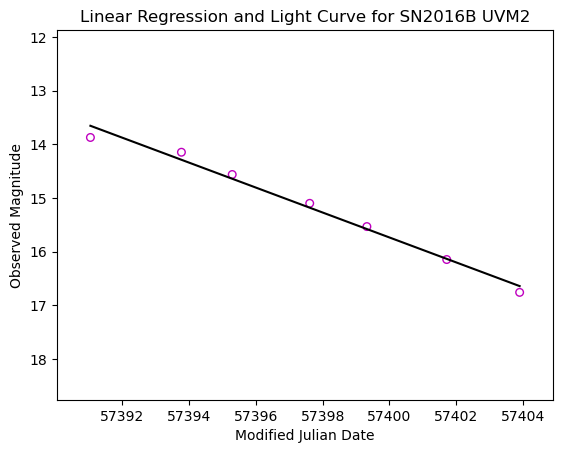

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:213: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  uvw1_slope = float((y_pred[-1] - y_pred[0]) / (x[-1] - x[0]))


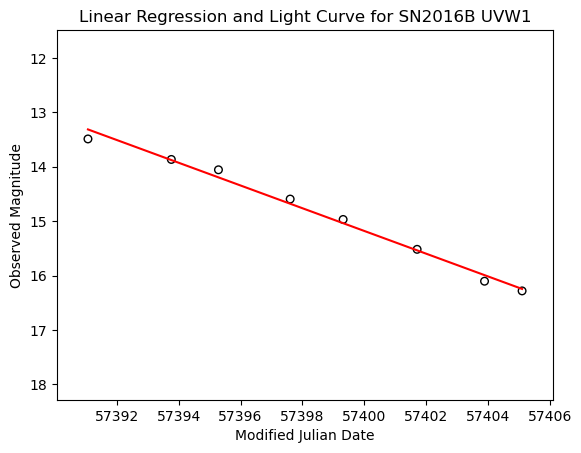

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:257: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  u_slope = float((y3_pred[-1] - y3_pred[0]) / (x3[-1] - x3[0]))


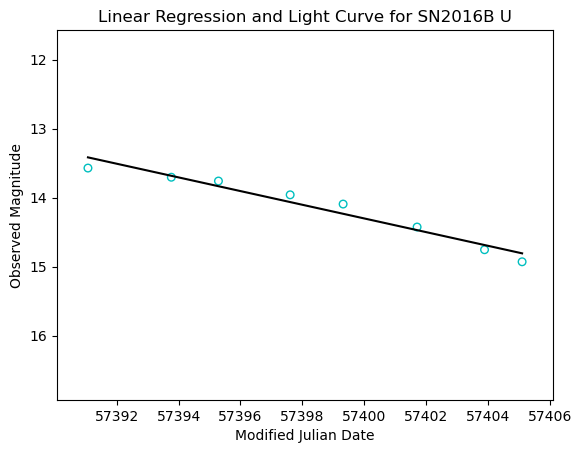

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:302: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  b_slope = float((y5_pred[-1] - y5_pred[0]) / (x5[-1] - x5[0]))


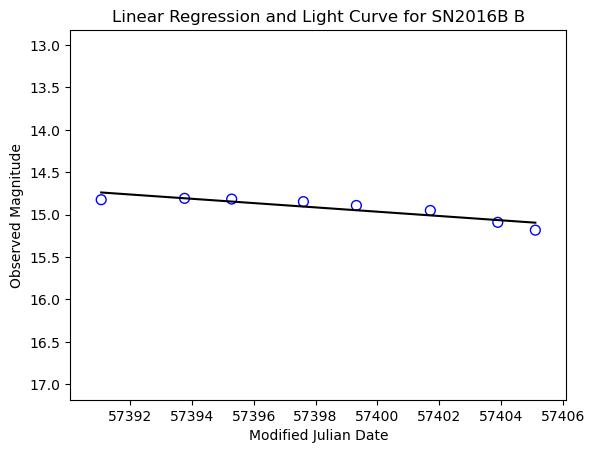

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:346: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  v_slope = float((y4_pred[-1] - y4_pred[0]) / (x4[-1] - x4[0]))


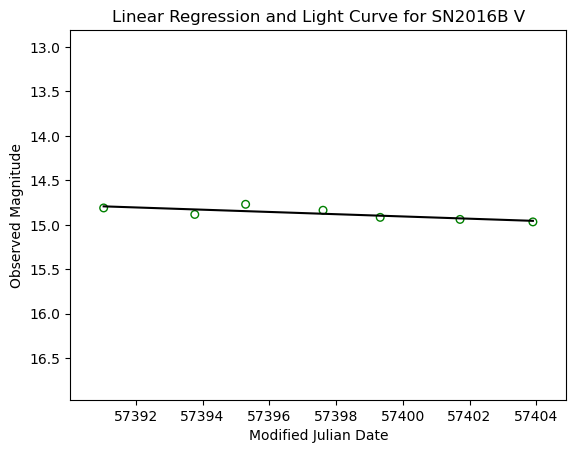

UVW2: 0.240
UVM2: 0.232
UVW1: 0.209
U: 0.099
V: 0.013
B: 0.025


In [31]:
new_LinearR('SN2016B.txt',57391,57406,57391,57404,57391,57406,57391,57406,57391,57406,57391,57404)

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:20: UserWarning: Input line 1 contained no data and will not be counted towards `max_rows=50000`.  This differs from the behaviour in NumPy <=1.22 which counted lines rather than rows.  If desired, the previous behaviour can be achieved by using `itertools.islice`.
Please see the 1.23 release notes for an example on how to do this.  If you wish to ignore this warning, use `warnings.filterwarnings`.  This warning is expected to be removed in the future and is given only once per `loadtxt` call.
  fil, mjd, mag, magerr = np.loadtxt(data, dtype=str, usecols = (0,1,2,3), unpack=True) #unpack lets you assign columns names
C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:123: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  uvw2_slope = float(

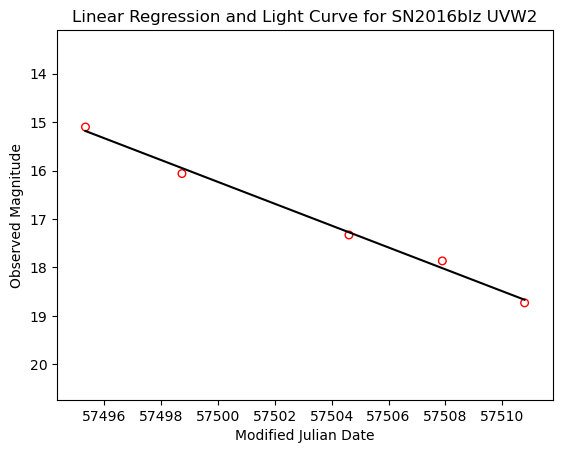

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:168: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  uvm2_slope = float((y2_pred[-1] - y2_pred[0]) / (x2[-1] - x2[0]))


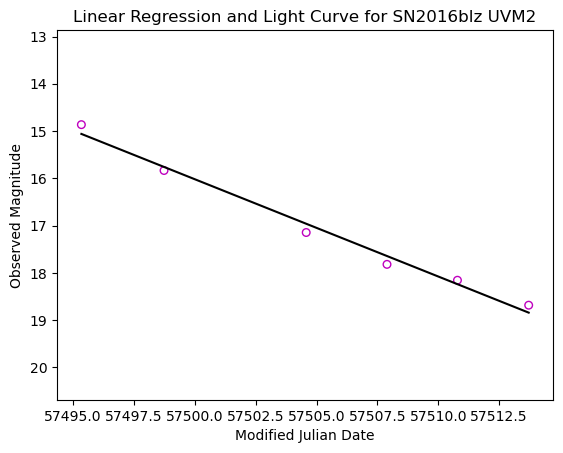

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:213: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  uvw1_slope = float((y_pred[-1] - y_pred[0]) / (x[-1] - x[0]))


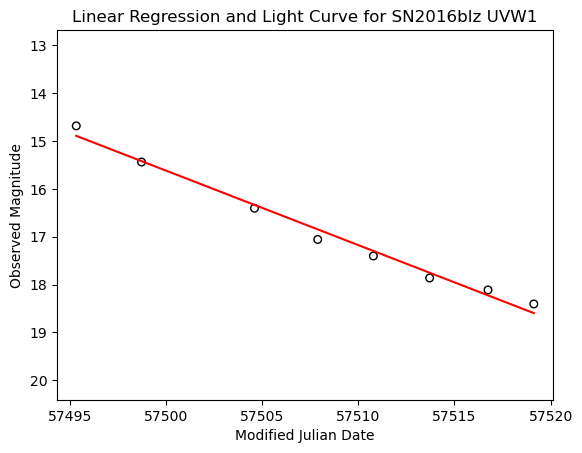

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:257: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  u_slope = float((y3_pred[-1] - y3_pred[0]) / (x3[-1] - x3[0]))


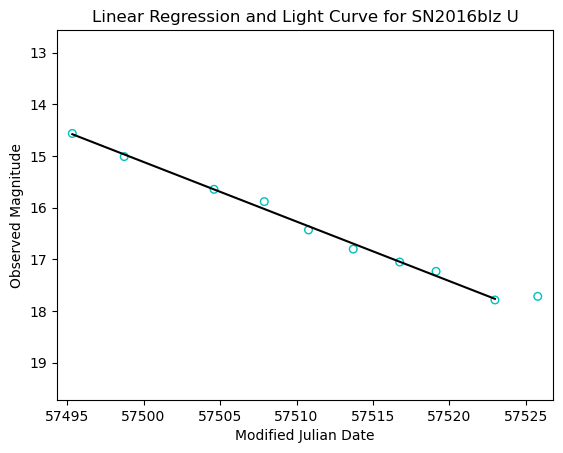

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:302: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  b_slope = float((y5_pred[-1] - y5_pred[0]) / (x5[-1] - x5[0]))


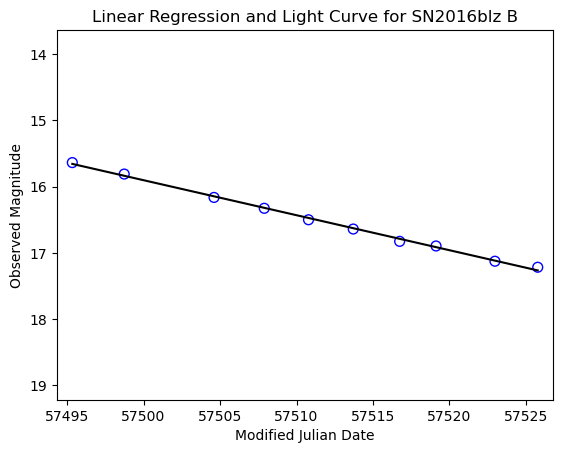

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:346: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  v_slope = float((y4_pred[-1] - y4_pred[0]) / (x4[-1] - x4[0]))


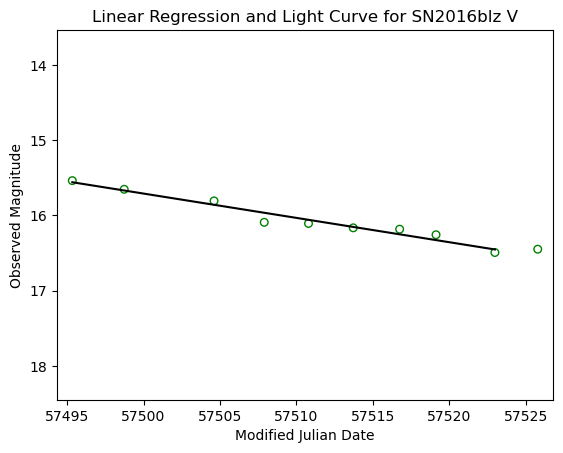

UVW2: 0.226
UVM2: 0.206
UVW1: 0.156
U: 0.115
V: 0.032
B: 0.053


In [32]:
new_LinearR('SN2016blz.txt',57495,57513.7107,57495,57516.7488,57495,57522.9747,57495,57525.7736,57495,57526,57495,57525.7791)

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:20: UserWarning: Input line 1 contained no data and will not be counted towards `max_rows=50000`.  This differs from the behaviour in NumPy <=1.22 which counted lines rather than rows.  If desired, the previous behaviour can be achieved by using `itertools.islice`.
Please see the 1.23 release notes for an example on how to do this.  If you wish to ignore this warning, use `warnings.filterwarnings`.  This warning is expected to be removed in the future and is given only once per `loadtxt` call.
  fil, mjd, mag, magerr = np.loadtxt(data, dtype=str, usecols = (0,1,2,3), unpack=True) #unpack lets you assign columns names
C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:123: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  uvw2_slope = float(

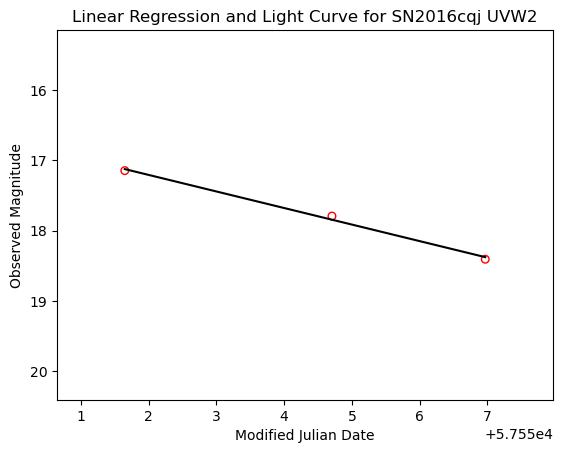

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:168: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  uvm2_slope = float((y2_pred[-1] - y2_pred[0]) / (x2[-1] - x2[0]))


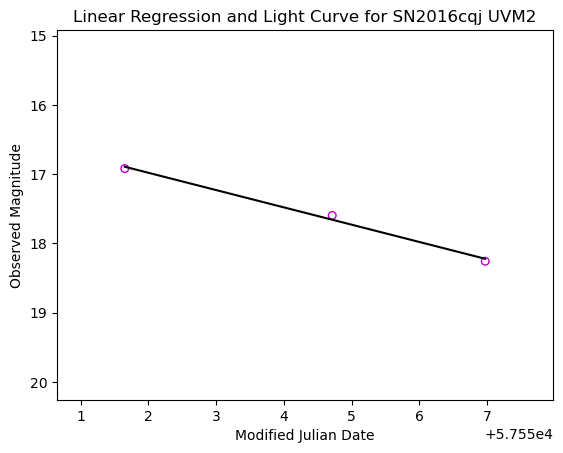

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:213: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  uvw1_slope = float((y_pred[-1] - y_pred[0]) / (x[-1] - x[0]))


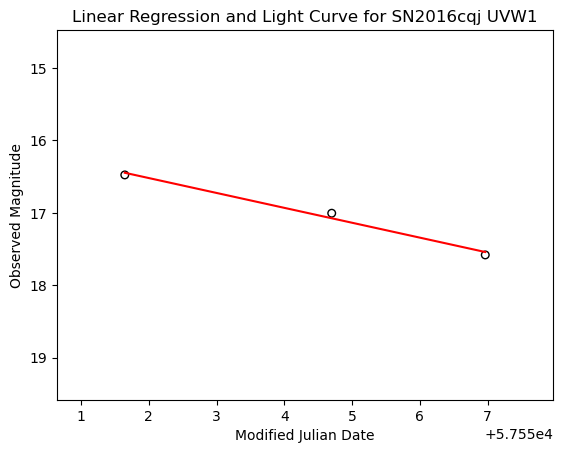

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:257: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  u_slope = float((y3_pred[-1] - y3_pred[0]) / (x3[-1] - x3[0]))


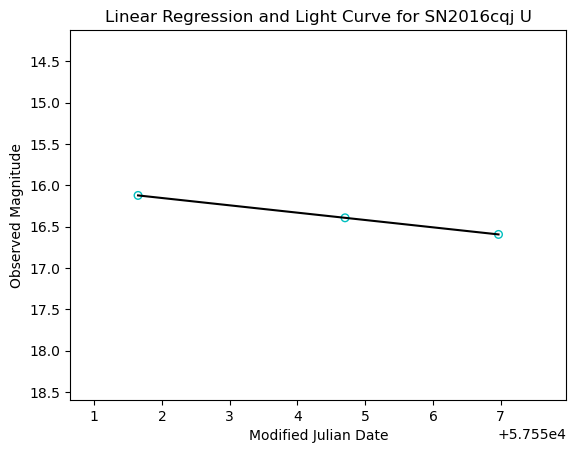

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:302: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  b_slope = float((y5_pred[-1] - y5_pred[0]) / (x5[-1] - x5[0]))


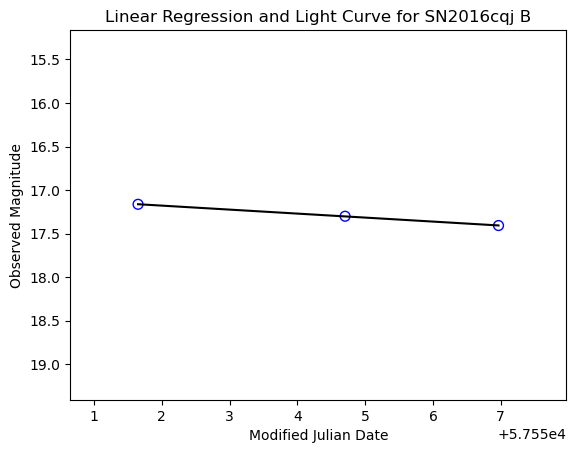

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:346: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  v_slope = float((y4_pred[-1] - y4_pred[0]) / (x4[-1] - x4[0]))


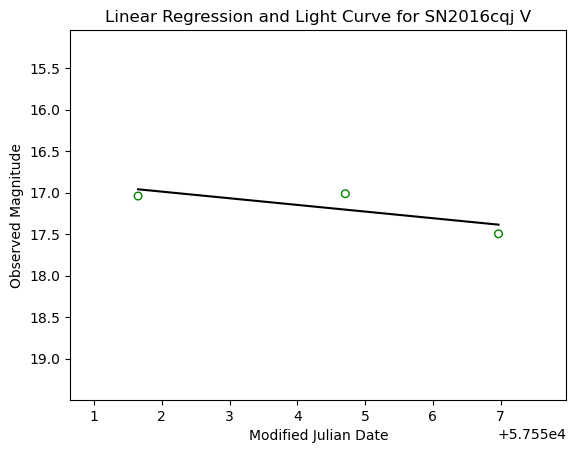

UVW2: 0.236
UVM2: 0.250
UVW1: 0.206
U: 0.089
V: 0.080
B: 0.046


In [33]:
new_LinearR('SN2016cqj.txt',57551,57557,57551,57557,57551,57557,57551,57557,57551,57557,57551,57557)

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:20: UserWarning: Input line 1 contained no data and will not be counted towards `max_rows=50000`.  This differs from the behaviour in NumPy <=1.22 which counted lines rather than rows.  If desired, the previous behaviour can be achieved by using `itertools.islice`.
Please see the 1.23 release notes for an example on how to do this.  If you wish to ignore this warning, use `warnings.filterwarnings`.  This warning is expected to be removed in the future and is given only once per `loadtxt` call.
  fil, mjd, mag, magerr = np.loadtxt(data, dtype=str, usecols = (0,1,2,3), unpack=True) #unpack lets you assign columns names
C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:123: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  uvw2_slope = float(

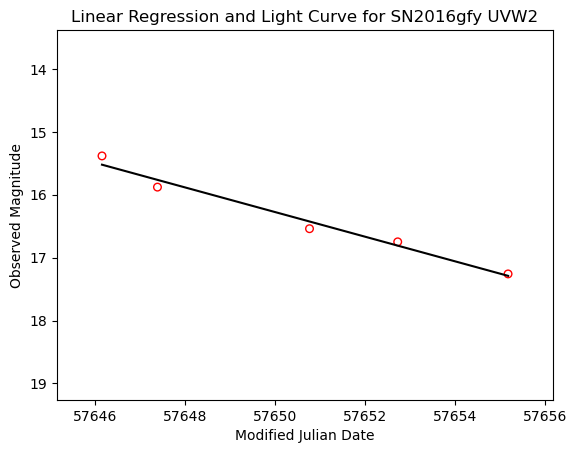

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:168: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  uvm2_slope = float((y2_pred[-1] - y2_pred[0]) / (x2[-1] - x2[0]))


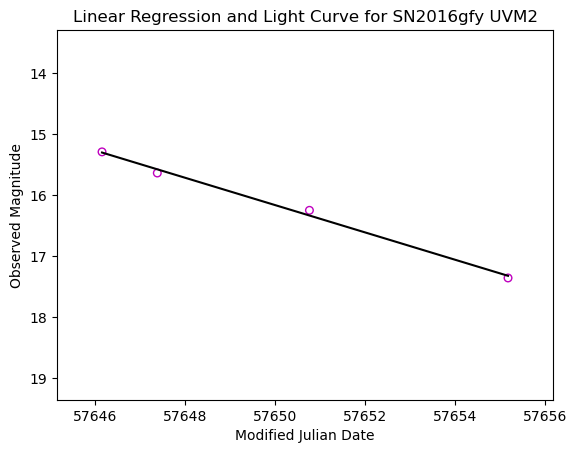

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:213: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  uvw1_slope = float((y_pred[-1] - y_pred[0]) / (x[-1] - x[0]))


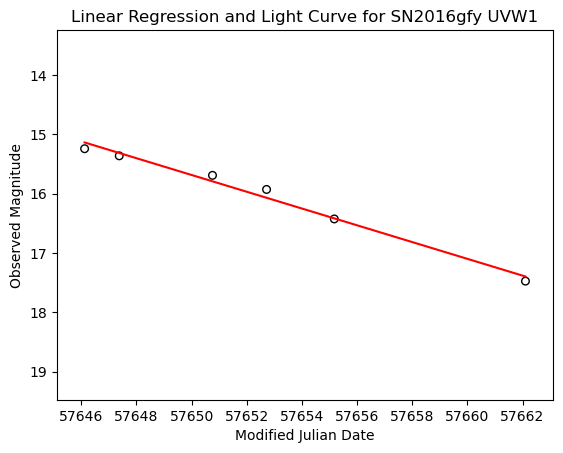

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:257: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  u_slope = float((y3_pred[-1] - y3_pred[0]) / (x3[-1] - x3[0]))


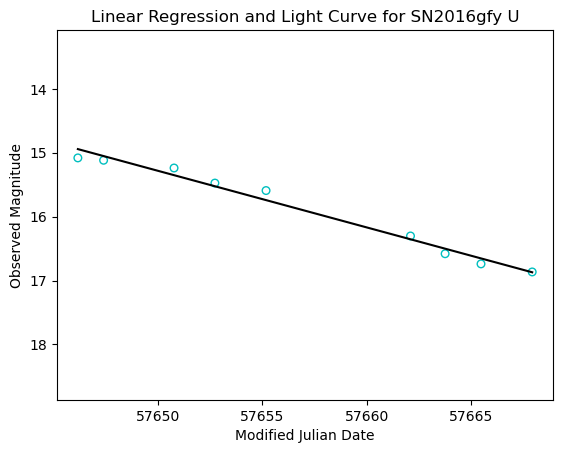

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:302: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  b_slope = float((y5_pred[-1] - y5_pred[0]) / (x5[-1] - x5[0]))


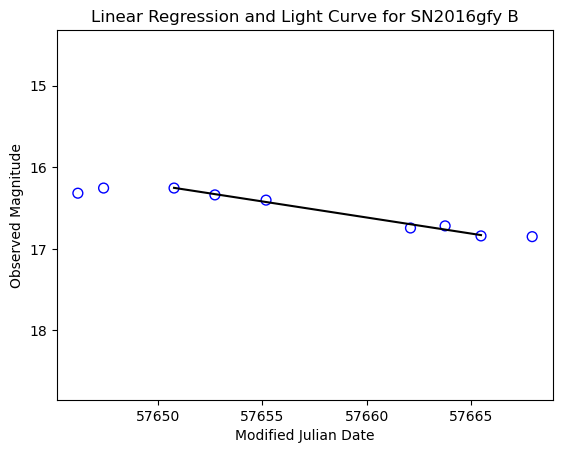

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:346: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  v_slope = float((y4_pred[-1] - y4_pred[0]) / (x4[-1] - x4[0]))


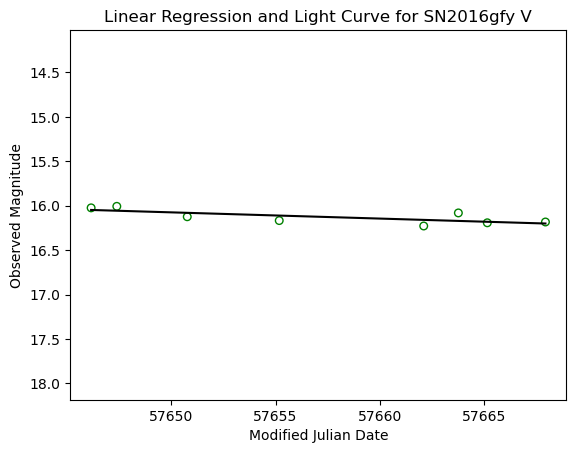

UVW2: 0.196
UVM2: 0.224
UVW1: 0.141
U: 0.088
V: 0.007
B: 0.039


In [34]:
new_LinearR('SN2016gfy.txt',57646,57662.1062,57646,57662.11,57646,57663.7645,57646,57668,57647.3766,57667.945,57646,57668)

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:20: UserWarning: Input line 1 contained no data and will not be counted towards `max_rows=50000`.  This differs from the behaviour in NumPy <=1.22 which counted lines rather than rows.  If desired, the previous behaviour can be achieved by using `itertools.islice`.
Please see the 1.23 release notes for an example on how to do this.  If you wish to ignore this warning, use `warnings.filterwarnings`.  This warning is expected to be removed in the future and is given only once per `loadtxt` call.
  fil, mjd, mag, magerr = np.loadtxt(data, dtype=str, usecols = (0,1,2,3), unpack=True) #unpack lets you assign columns names
C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:123: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  uvw2_slope = float(

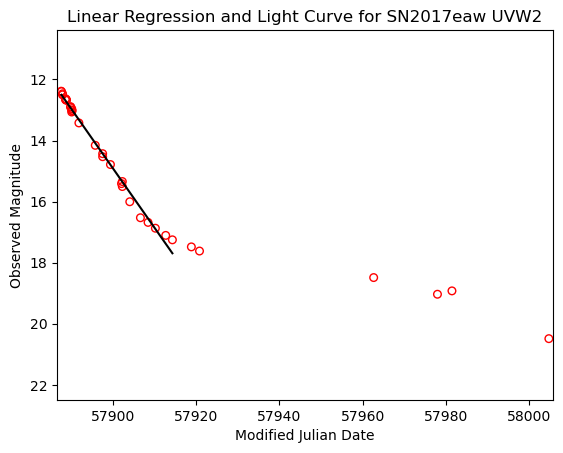

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:168: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  uvm2_slope = float((y2_pred[-1] - y2_pred[0]) / (x2[-1] - x2[0]))


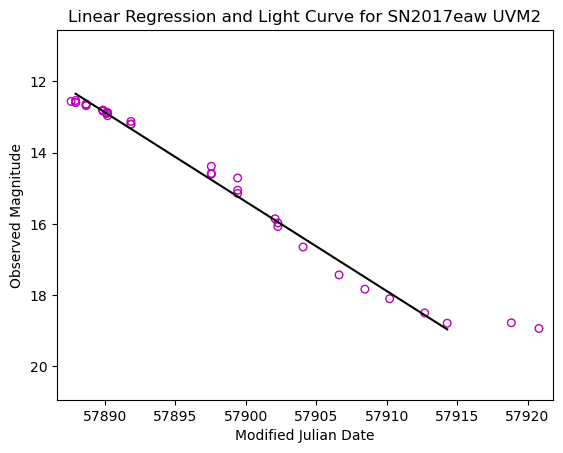

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:213: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  uvw1_slope = float((y_pred[-1] - y_pred[0]) / (x[-1] - x[0]))


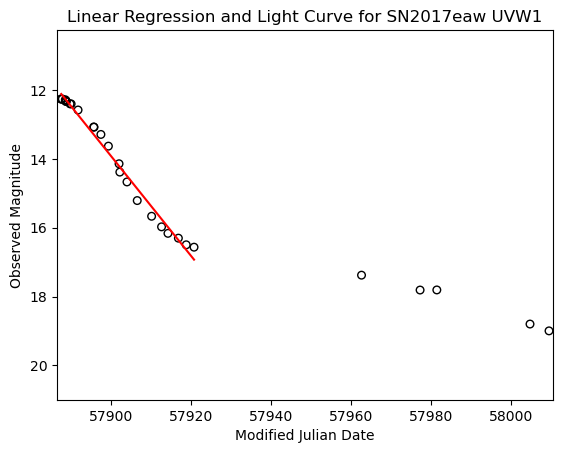

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:257: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  u_slope = float((y3_pred[-1] - y3_pred[0]) / (x3[-1] - x3[0]))


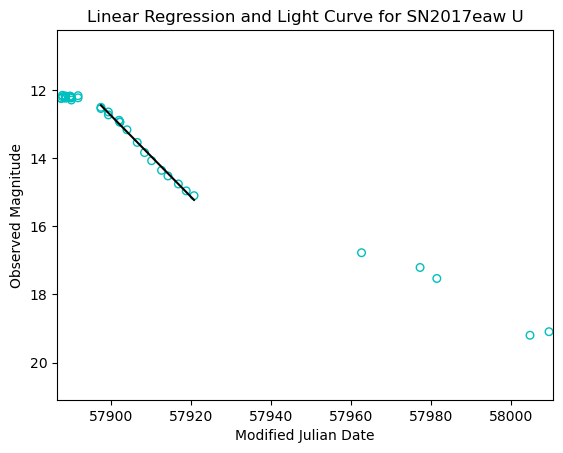

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:302: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  b_slope = float((y5_pred[-1] - y5_pred[0]) / (x5[-1] - x5[0]))


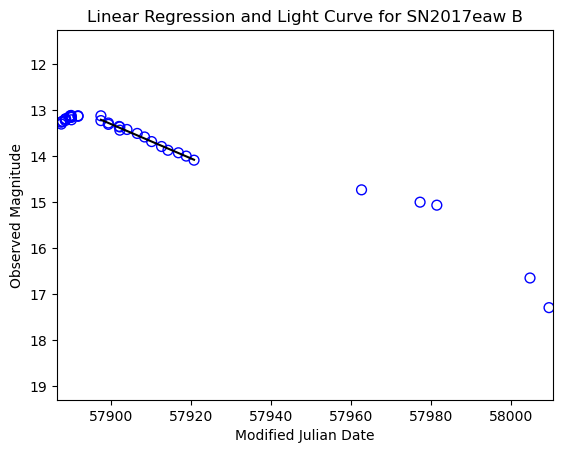

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:346: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  v_slope = float((y4_pred[-1] - y4_pred[0]) / (x4[-1] - x4[0]))


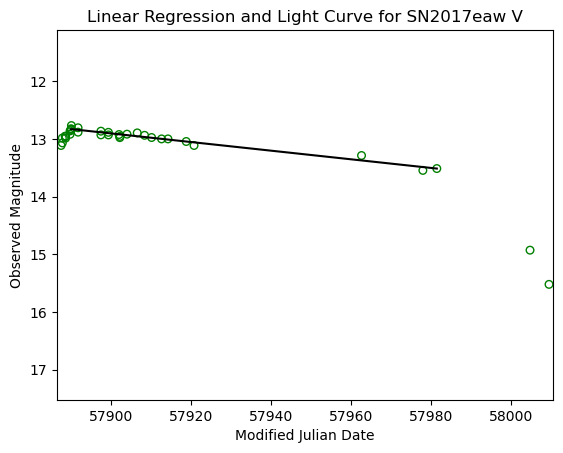

UVW2: 0.195
UVM2: 0.251
UVW1: 0.145
U: 0.120
V: 0.007
B: 0.037


In [35]:
new_LinearR('SN2017eaw.txt',57887.5955,57918.8509,57887.6034,57918.8533,57887.5907,57962.6147,57897.5480,57962.6166,57897.5497,57962.6175,57890,58004.6875)

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:20: UserWarning: Input line 1 contained no data and will not be counted towards `max_rows=50000`.  This differs from the behaviour in NumPy <=1.22 which counted lines rather than rows.  If desired, the previous behaviour can be achieved by using `itertools.islice`.
Please see the 1.23 release notes for an example on how to do this.  If you wish to ignore this warning, use `warnings.filterwarnings`.  This warning is expected to be removed in the future and is given only once per `loadtxt` call.
  fil, mjd, mag, magerr = np.loadtxt(data, dtype=str, usecols = (0,1,2,3), unpack=True) #unpack lets you assign columns names
C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:123: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  uvw2_slope = float(

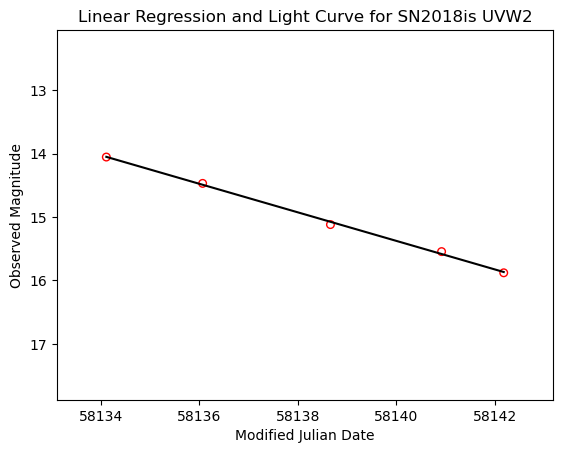

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:168: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  uvm2_slope = float((y2_pred[-1] - y2_pred[0]) / (x2[-1] - x2[0]))


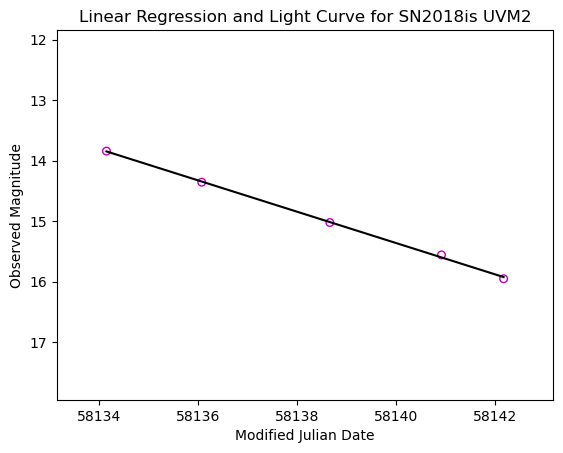

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:213: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  uvw1_slope = float((y_pred[-1] - y_pred[0]) / (x[-1] - x[0]))


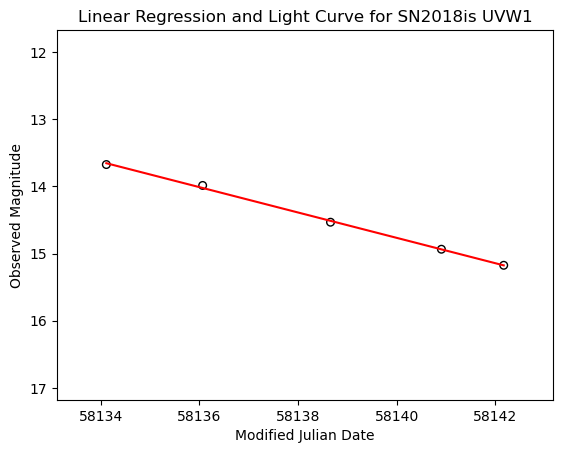

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:257: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  u_slope = float((y3_pred[-1] - y3_pred[0]) / (x3[-1] - x3[0]))


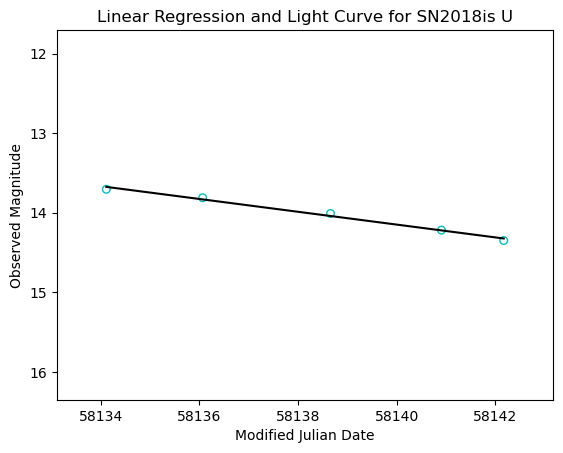

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:302: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  b_slope = float((y5_pred[-1] - y5_pred[0]) / (x5[-1] - x5[0]))


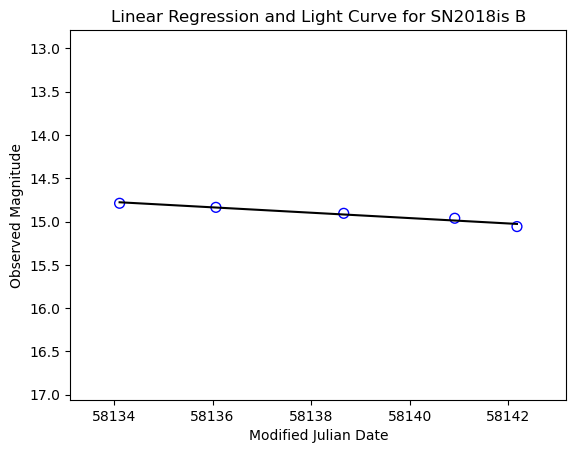

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:346: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  v_slope = float((y4_pred[-1] - y4_pred[0]) / (x4[-1] - x4[0]))


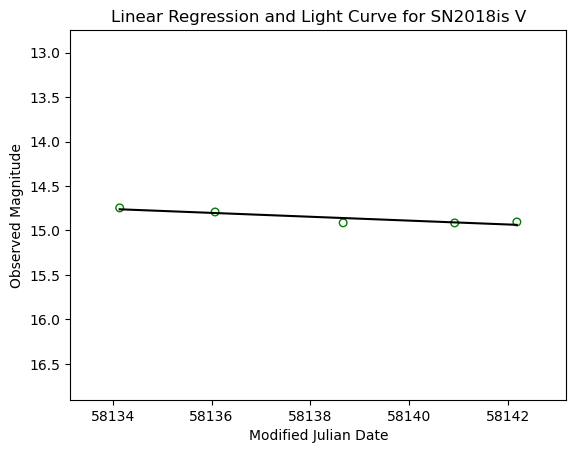

UVW2: 0.225
UVM2: 0.259
UVW1: 0.189
U: 0.080
V: 0.022
B: 0.031


In [36]:
new_LinearR('SN2018is.txt',58134,58143,58134,58143,58134,58143,58134,58143,58134,58143,58134,58143)

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:20: UserWarning: Input line 1 contained no data and will not be counted towards `max_rows=50000`.  This differs from the behaviour in NumPy <=1.22 which counted lines rather than rows.  If desired, the previous behaviour can be achieved by using `itertools.islice`.
Please see the 1.23 release notes for an example on how to do this.  If you wish to ignore this warning, use `warnings.filterwarnings`.  This warning is expected to be removed in the future and is given only once per `loadtxt` call.
  fil, mjd, mag, magerr = np.loadtxt(data, dtype=str, usecols = (0,1,2,3), unpack=True) #unpack lets you assign columns names
C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:123: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  uvw2_slope = float(

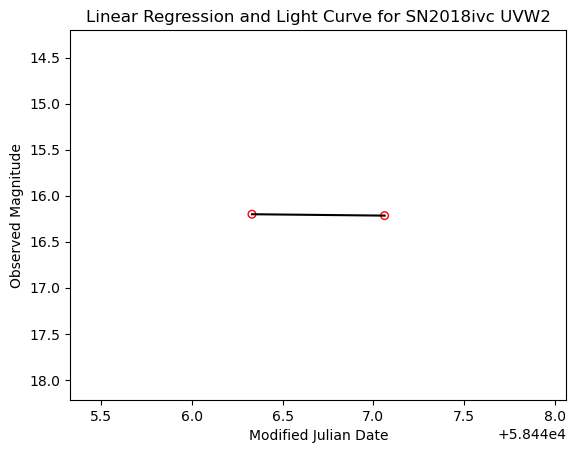

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:168: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  uvm2_slope = float((y2_pred[-1] - y2_pred[0]) / (x2[-1] - x2[0]))


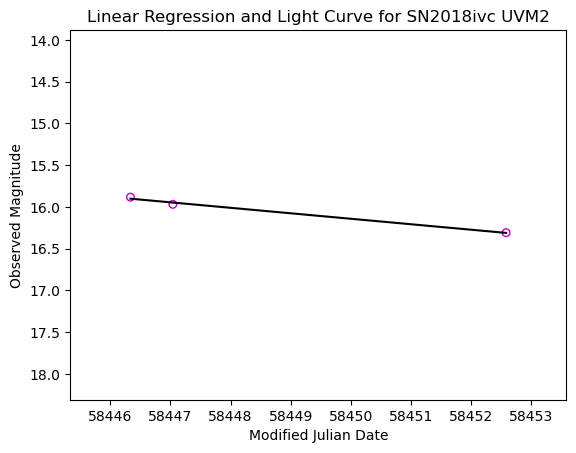

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:213: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  uvw1_slope = float((y_pred[-1] - y_pred[0]) / (x[-1] - x[0]))


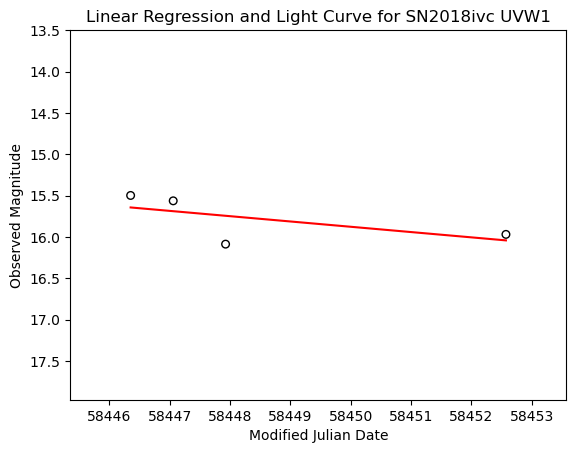

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:257: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  u_slope = float((y3_pred[-1] - y3_pred[0]) / (x3[-1] - x3[0]))


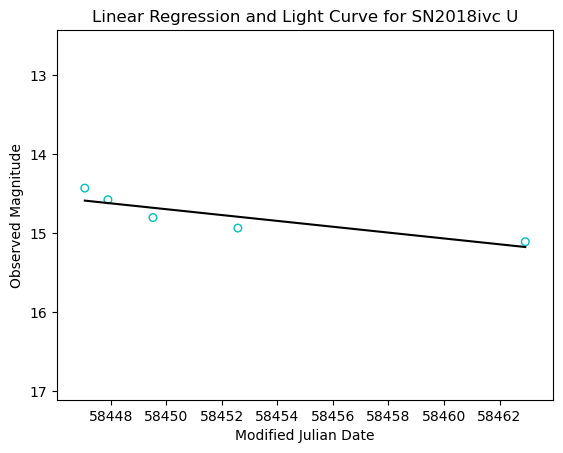

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:302: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  b_slope = float((y5_pred[-1] - y5_pred[0]) / (x5[-1] - x5[0]))


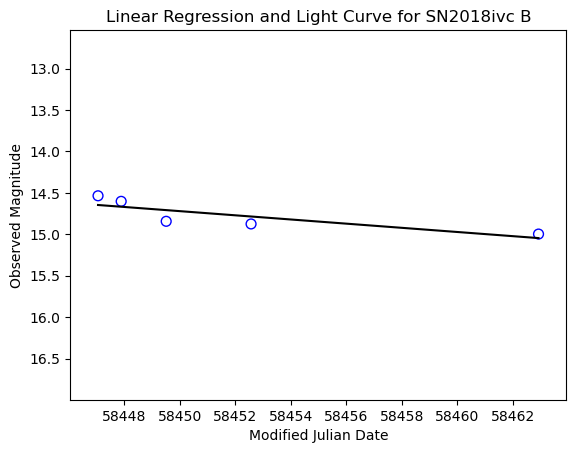

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:346: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  v_slope = float((y4_pred[-1] - y4_pred[0]) / (x4[-1] - x4[0]))


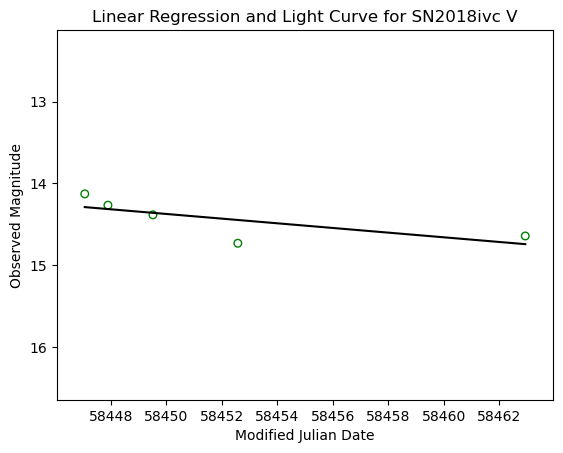

UVW2: 0.021
UVM2: 0.066
UVW1: 0.064
U: 0.037
V: 0.029
B: 0.025


In [37]:
new_LinearR('SN2018ivc.txt',58446,58448,58446,58453,58446,58453,58447,58463,58447,58463,58447,58463)

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:20: UserWarning: Input line 1 contained no data and will not be counted towards `max_rows=50000`.  This differs from the behaviour in NumPy <=1.22 which counted lines rather than rows.  If desired, the previous behaviour can be achieved by using `itertools.islice`.
Please see the 1.23 release notes for an example on how to do this.  If you wish to ignore this warning, use `warnings.filterwarnings`.  This warning is expected to be removed in the future and is given only once per `loadtxt` call.
  fil, mjd, mag, magerr = np.loadtxt(data, dtype=str, usecols = (0,1,2,3), unpack=True) #unpack lets you assign columns names
C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:123: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  uvw2_slope = float(

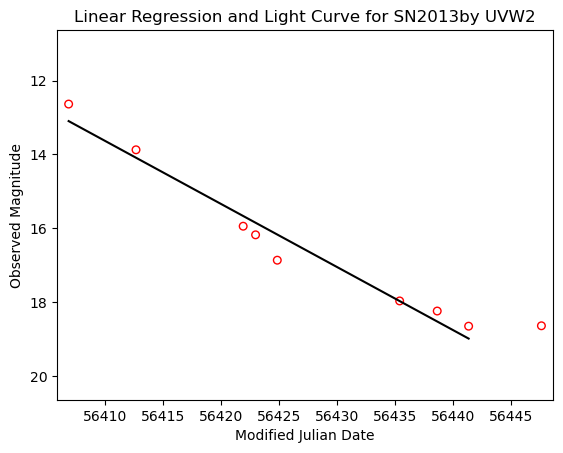

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:168: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  uvm2_slope = float((y2_pred[-1] - y2_pred[0]) / (x2[-1] - x2[0]))


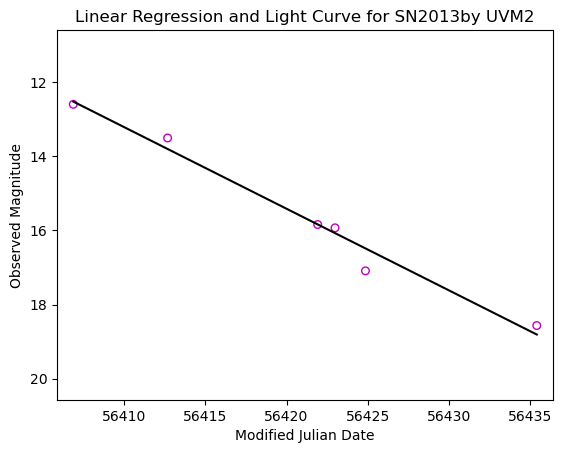

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:213: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  uvw1_slope = float((y_pred[-1] - y_pred[0]) / (x[-1] - x[0]))


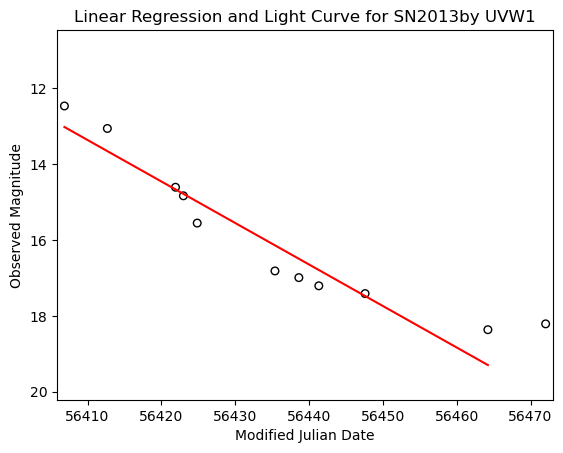

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:257: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  u_slope = float((y3_pred[-1] - y3_pred[0]) / (x3[-1] - x3[0]))


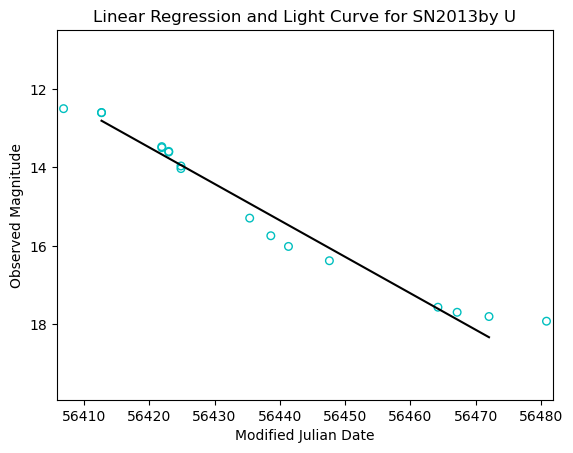

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:302: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  b_slope = float((y5_pred[-1] - y5_pred[0]) / (x5[-1] - x5[0]))


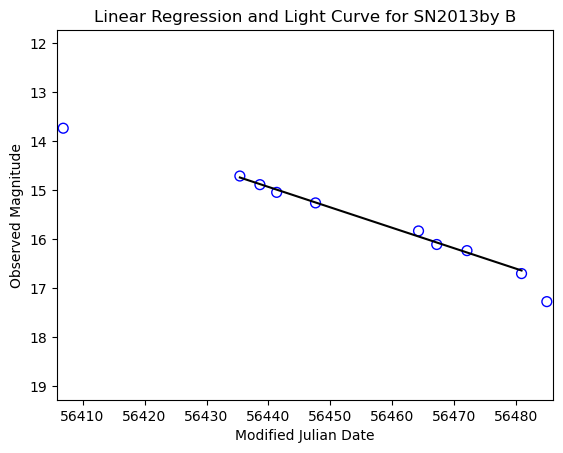

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:346: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  v_slope = float((y4_pred[-1] - y4_pred[0]) / (x4[-1] - x4[0]))


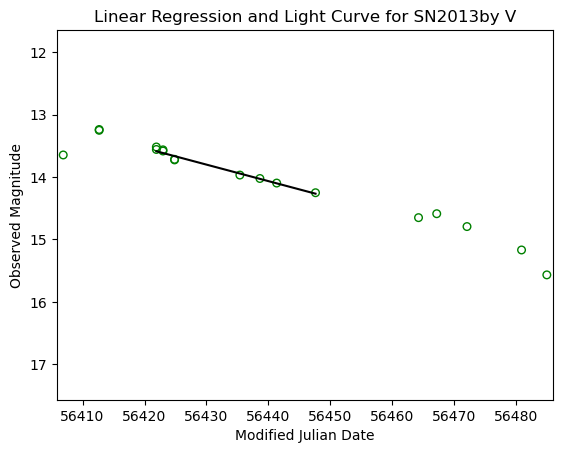

UVW2: 0.171
UVM2: 0.220
UVW1: 0.109
U: 0.093
V: 0.026
B: 0.042


In [38]:
new_LinearR('SN2013by.txt',56406,56447.5957,56406,56438.6241,56406,56472.0393,56406.8689,56480.8481,56406.8699,56484.9307,56421.9078,56464.2245)

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:20: UserWarning: Input line 1 contained no data and will not be counted towards `max_rows=50000`.  This differs from the behaviour in NumPy <=1.22 which counted lines rather than rows.  If desired, the previous behaviour can be achieved by using `itertools.islice`.
Please see the 1.23 release notes for an example on how to do this.  If you wish to ignore this warning, use `warnings.filterwarnings`.  This warning is expected to be removed in the future and is given only once per `loadtxt` call.
  fil, mjd, mag, magerr = np.loadtxt(data, dtype=str, usecols = (0,1,2,3), unpack=True) #unpack lets you assign columns names
C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:123: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  uvw2_slope = float(

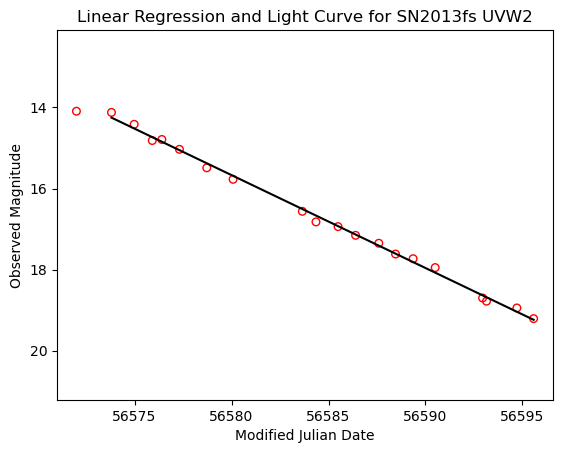

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:168: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  uvm2_slope = float((y2_pred[-1] - y2_pred[0]) / (x2[-1] - x2[0]))


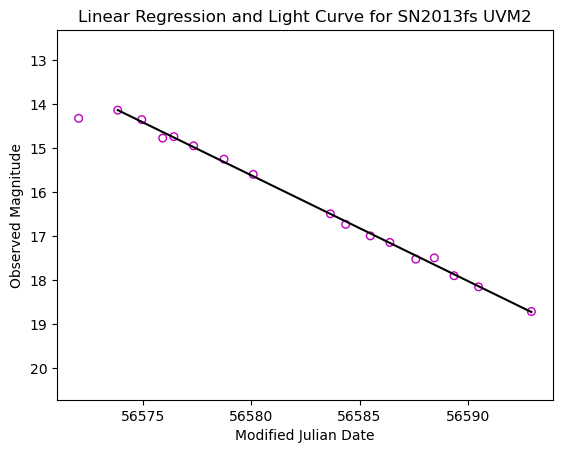

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:213: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  uvw1_slope = float((y_pred[-1] - y_pred[0]) / (x[-1] - x[0]))


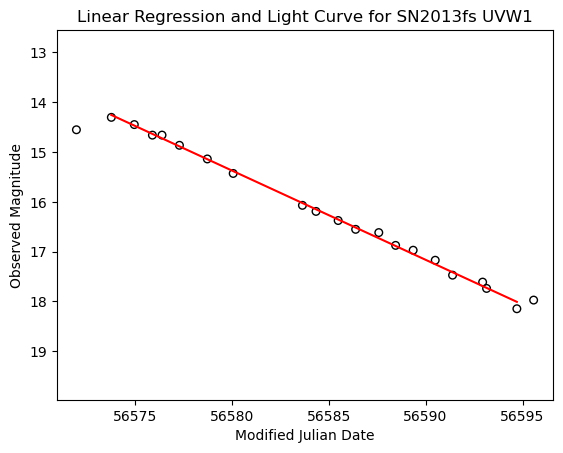

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:257: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  u_slope = float((y3_pred[-1] - y3_pred[0]) / (x3[-1] - x3[0]))


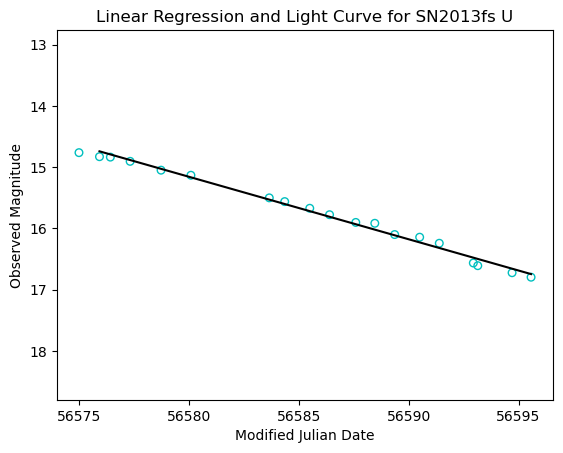

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:302: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  b_slope = float((y5_pred[-1] - y5_pred[0]) / (x5[-1] - x5[0]))


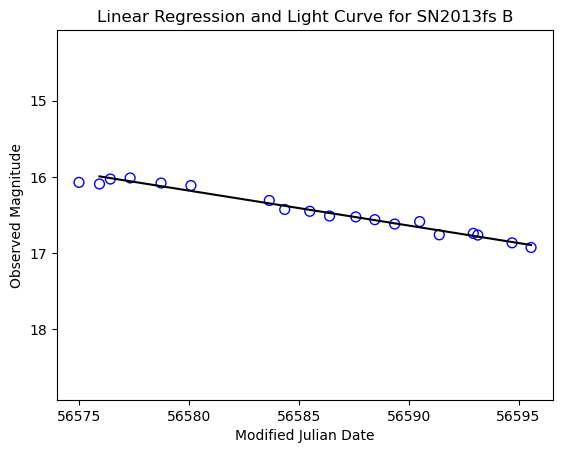

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:346: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  v_slope = float((y4_pred[-1] - y4_pred[0]) / (x4[-1] - x4[0]))


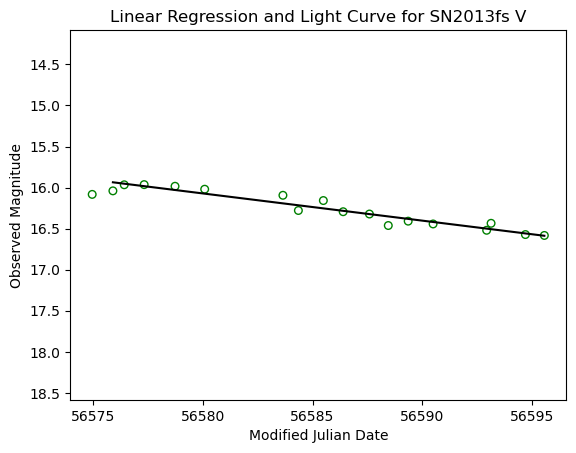

UVW2: 0.229
UVM2: 0.239
UVW1: 0.179
U: 0.102
V: 0.033
B: 0.046


In [39]:
new_LinearR('SN2013fs.txt',56572.0031,57583.5231,56572.0089,56593.1479,56571.9913,56595.5703,56574.9779,57583.5207,56574.9788,57583.5215,56574.949,57583.5252)

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:20: UserWarning: Input line 1 contained no data and will not be counted towards `max_rows=50000`.  This differs from the behaviour in NumPy <=1.22 which counted lines rather than rows.  If desired, the previous behaviour can be achieved by using `itertools.islice`.
Please see the 1.23 release notes for an example on how to do this.  If you wish to ignore this warning, use `warnings.filterwarnings`.  This warning is expected to be removed in the future and is given only once per `loadtxt` call.
  fil, mjd, mag, magerr = np.loadtxt(data, dtype=str, usecols = (0,1,2,3), unpack=True) #unpack lets you assign columns names
C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:123: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  uvw2_slope = float(

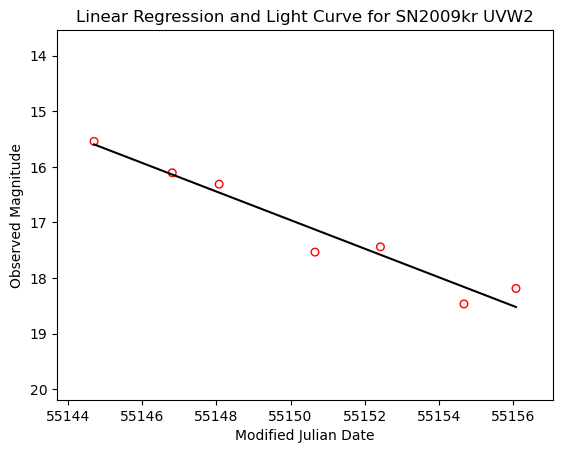

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:168: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  uvm2_slope = float((y2_pred[-1] - y2_pred[0]) / (x2[-1] - x2[0]))


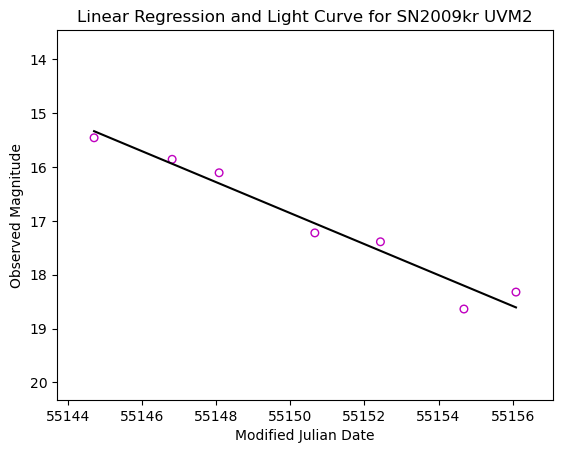

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:213: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  uvw1_slope = float((y_pred[-1] - y_pred[0]) / (x[-1] - x[0]))


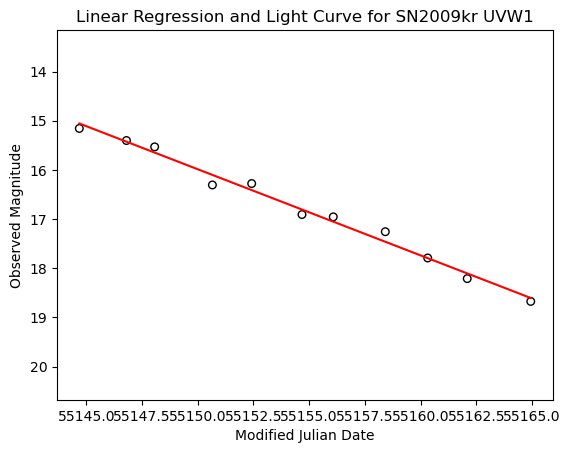

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:257: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  u_slope = float((y3_pred[-1] - y3_pred[0]) / (x3[-1] - x3[0]))


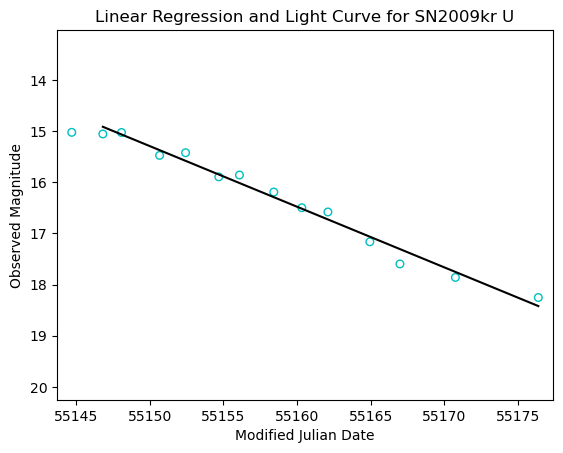

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:302: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  b_slope = float((y5_pred[-1] - y5_pred[0]) / (x5[-1] - x5[0]))


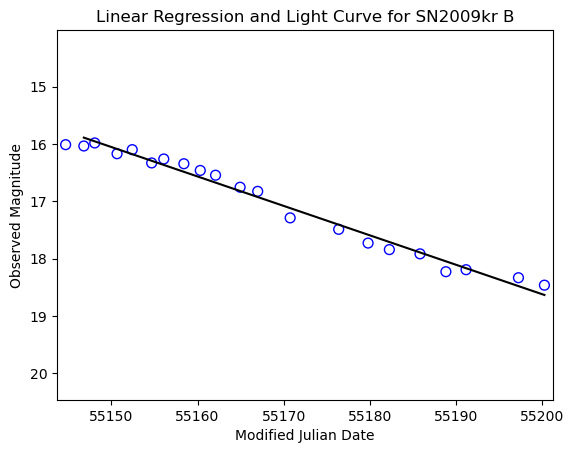

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:346: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  v_slope = float((y4_pred[-1] - y4_pred[0]) / (x4[-1] - x4[0]))


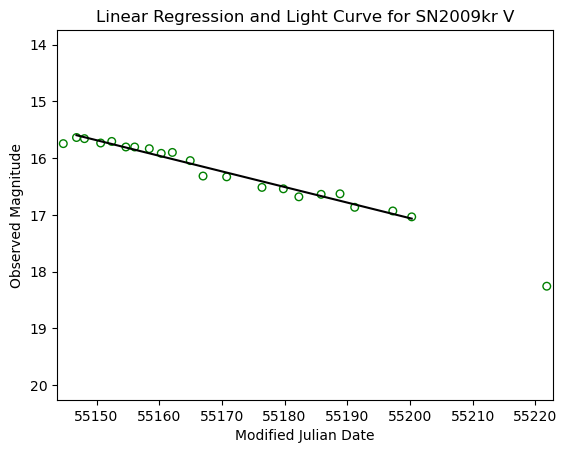

UVW2: 0.257
UVM2: 0.288
UVW1: 0.175
U: 0.119
V: 0.027
B: 0.051


In [40]:
new_LinearR('SN2009kr.txt',54667.3676,55158.4203,55144,55158.4235,55144,55165,55144.6894,55177,55144.691,55201,55144.7007,55201)

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:20: UserWarning: Input line 1 contained no data and will not be counted towards `max_rows=50000`.  This differs from the behaviour in NumPy <=1.22 which counted lines rather than rows.  If desired, the previous behaviour can be achieved by using `itertools.islice`.
Please see the 1.23 release notes for an example on how to do this.  If you wish to ignore this warning, use `warnings.filterwarnings`.  This warning is expected to be removed in the future and is given only once per `loadtxt` call.
  fil, mjd, mag, magerr = np.loadtxt(data, dtype=str, usecols = (0,1,2,3), unpack=True) #unpack lets you assign columns names
C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:123: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  uvw2_slope = float(

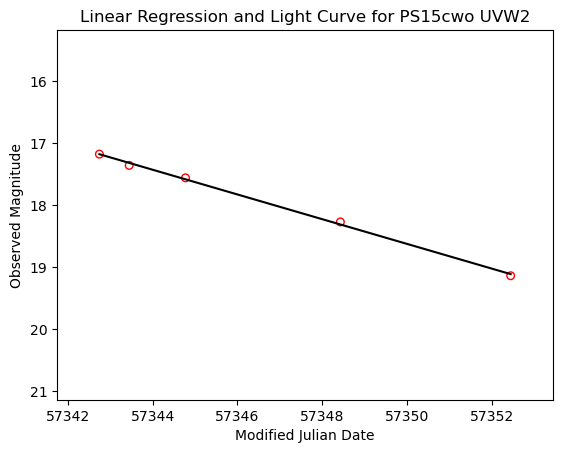

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:168: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  uvm2_slope = float((y2_pred[-1] - y2_pred[0]) / (x2[-1] - x2[0]))


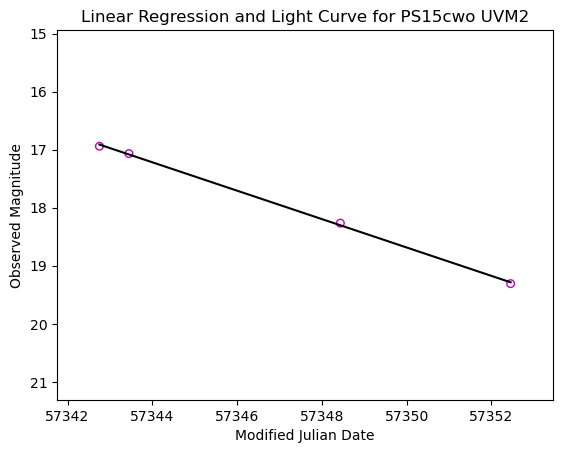

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:213: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  uvw1_slope = float((y_pred[-1] - y_pred[0]) / (x[-1] - x[0]))


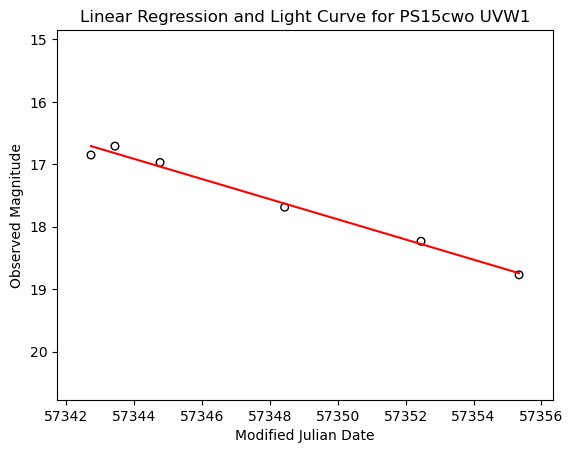

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:257: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  u_slope = float((y3_pred[-1] - y3_pred[0]) / (x3[-1] - x3[0]))


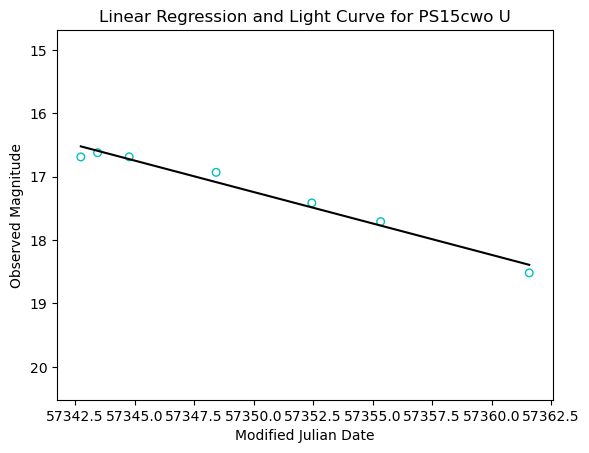

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:302: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  b_slope = float((y5_pred[-1] - y5_pred[0]) / (x5[-1] - x5[0]))


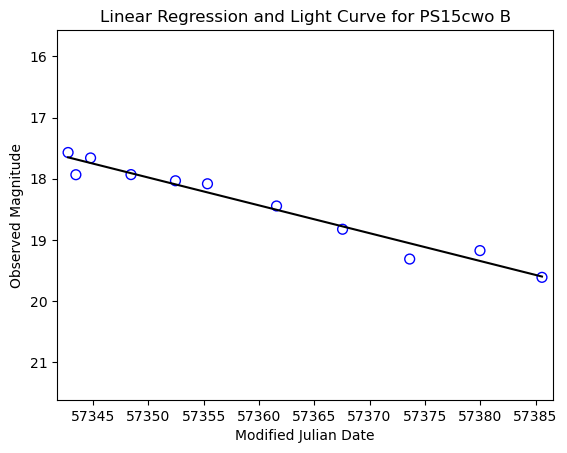

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:346: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  v_slope = float((y4_pred[-1] - y4_pred[0]) / (x4[-1] - x4[0]))


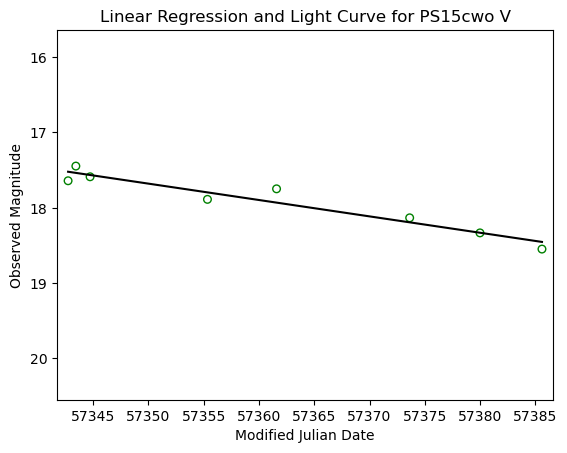

UVW2: 0.199
UVM2: 0.245
UVW1: 0.161
U: 0.099
V: 0.022
B: 0.045


In [41]:
new_LinearR('PS15cwo.txt',57342,57355.3437,57342,57355.3487,57342,57361.5833,57342,57367.5552,57342,57386,57342,57386)

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:20: UserWarning: Input line 1 contained no data and will not be counted towards `max_rows=50000`.  This differs from the behaviour in NumPy <=1.22 which counted lines rather than rows.  If desired, the previous behaviour can be achieved by using `itertools.islice`.
Please see the 1.23 release notes for an example on how to do this.  If you wish to ignore this warning, use `warnings.filterwarnings`.  This warning is expected to be removed in the future and is given only once per `loadtxt` call.
  fil, mjd, mag, magerr = np.loadtxt(data, dtype=str, usecols = (0,1,2,3), unpack=True) #unpack lets you assign columns names
C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:123: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  uvw2_slope = float(

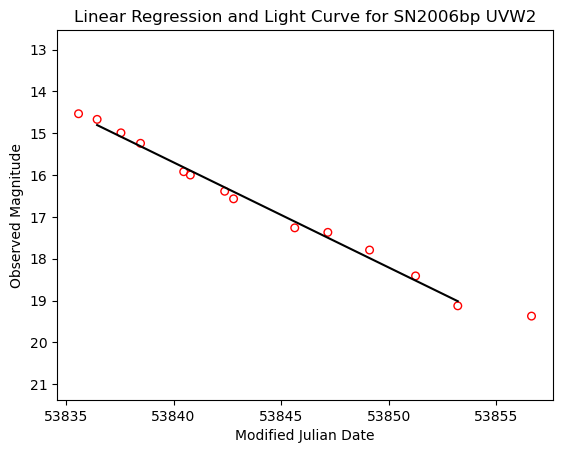

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:168: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  uvm2_slope = float((y2_pred[-1] - y2_pred[0]) / (x2[-1] - x2[0]))


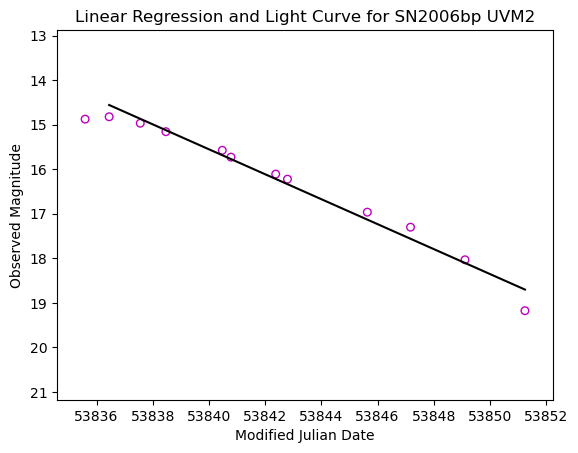

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:213: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  uvw1_slope = float((y_pred[-1] - y_pred[0]) / (x[-1] - x[0]))


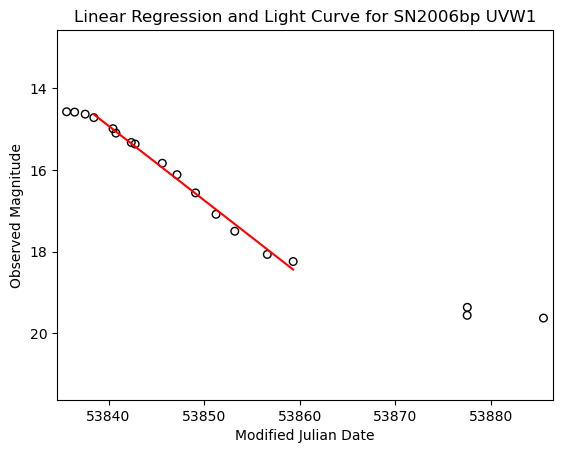

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:257: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  u_slope = float((y3_pred[-1] - y3_pred[0]) / (x3[-1] - x3[0]))


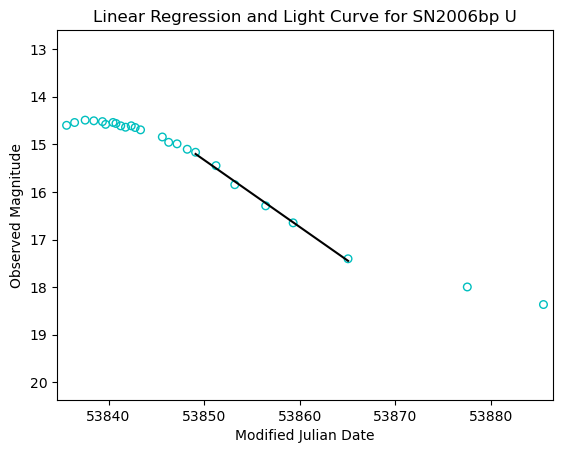

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:302: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  b_slope = float((y5_pred[-1] - y5_pred[0]) / (x5[-1] - x5[0]))


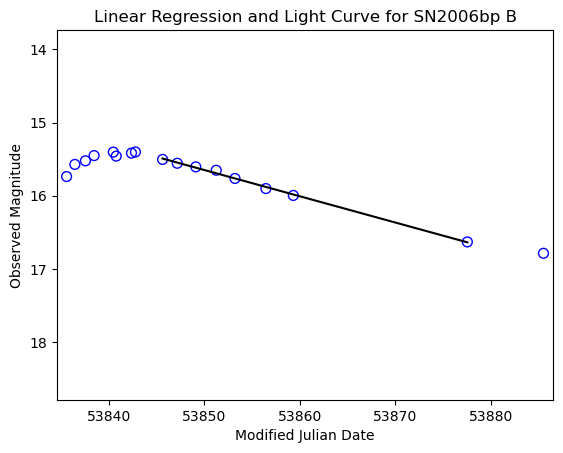

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:346: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  v_slope = float((y4_pred[-1] - y4_pred[0]) / (x4[-1] - x4[0]))


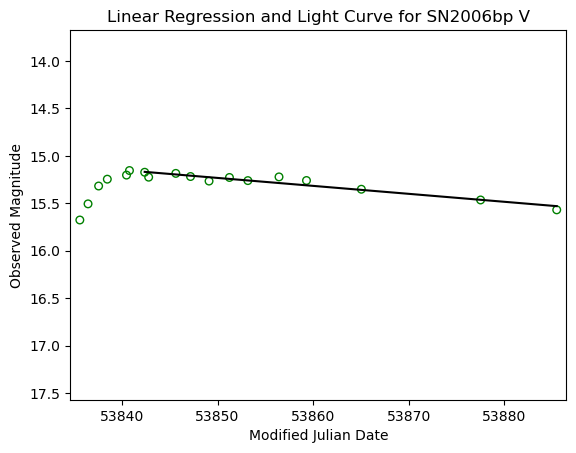

UVW2: 0.251
UVM2: 0.280
UVW1: 0.182
U: 0.141
V: 0.008
B: 0.036


In [42]:
new_LinearR('SN2006bp.txt',53835.5824,53856.6316,53835.592,53853.1751,53837.5508,53877.5193,53848.2299,53877.5281,53842.7825,53885.4985,53840.7812,53886)

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:20: UserWarning: Input line 1 contained no data and will not be counted towards `max_rows=50000`.  This differs from the behaviour in NumPy <=1.22 which counted lines rather than rows.  If desired, the previous behaviour can be achieved by using `itertools.islice`.
Please see the 1.23 release notes for an example on how to do this.  If you wish to ignore this warning, use `warnings.filterwarnings`.  This warning is expected to be removed in the future and is given only once per `loadtxt` call.
  fil, mjd, mag, magerr = np.loadtxt(data, dtype=str, usecols = (0,1,2,3), unpack=True) #unpack lets you assign columns names
C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:123: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  uvw2_slope = float(

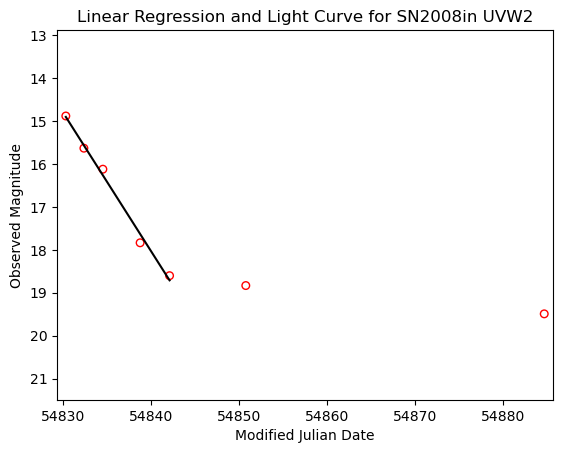

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:168: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  uvm2_slope = float((y2_pred[-1] - y2_pred[0]) / (x2[-1] - x2[0]))


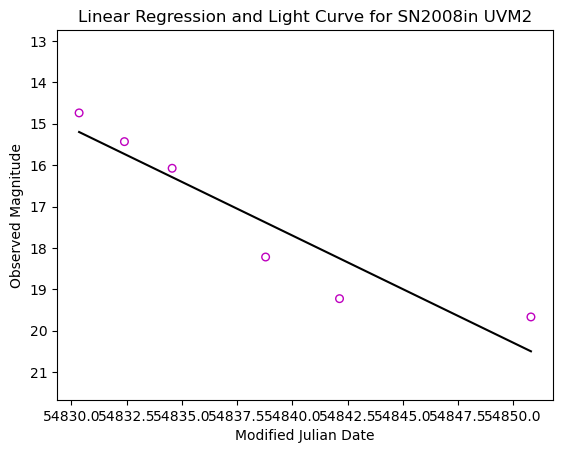

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:213: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  uvw1_slope = float((y_pred[-1] - y_pred[0]) / (x[-1] - x[0]))


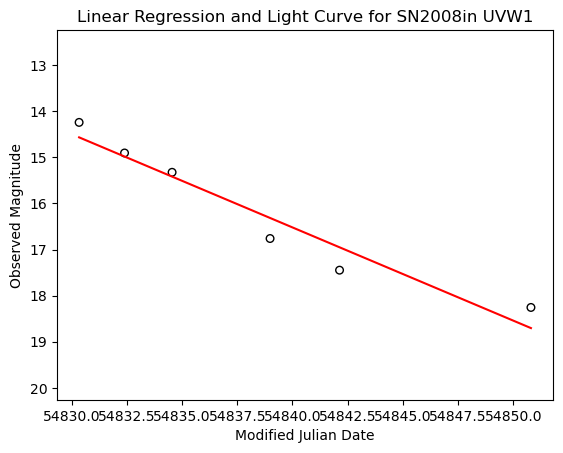

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:257: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  u_slope = float((y3_pred[-1] - y3_pred[0]) / (x3[-1] - x3[0]))


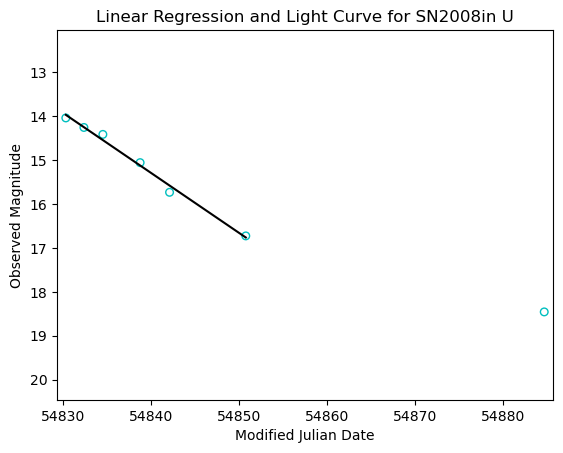

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:302: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  b_slope = float((y5_pred[-1] - y5_pred[0]) / (x5[-1] - x5[0]))


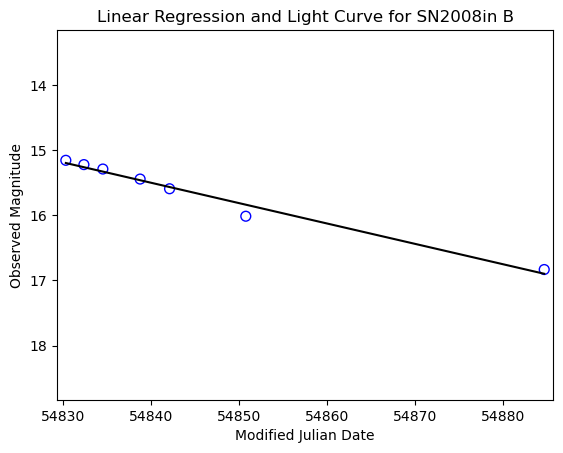

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:346: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  v_slope = float((y4_pred[-1] - y4_pred[0]) / (x4[-1] - x4[0]))


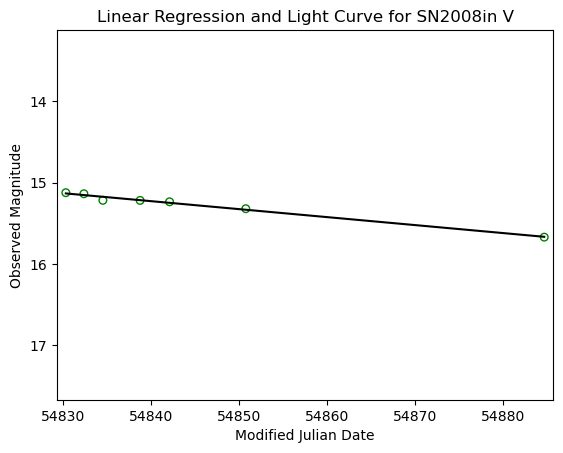

UVW2: 0.323
UVM2: 0.259
UVW1: 0.202
U: 0.137
V: 0.010
B: 0.031


In [43]:
new_LinearR('SN2008in.txt',54830,54850.802,54830,54884.7284,54830,54884.7267,54830,54884.727,54830,54885,54830,54885)

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:20: UserWarning: Input line 1 contained no data and will not be counted towards `max_rows=50000`.  This differs from the behaviour in NumPy <=1.22 which counted lines rather than rows.  If desired, the previous behaviour can be achieved by using `itertools.islice`.
Please see the 1.23 release notes for an example on how to do this.  If you wish to ignore this warning, use `warnings.filterwarnings`.  This warning is expected to be removed in the future and is given only once per `loadtxt` call.
  fil, mjd, mag, magerr = np.loadtxt(data, dtype=str, usecols = (0,1,2,3), unpack=True) #unpack lets you assign columns names
C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:123: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  uvw2_slope = float(

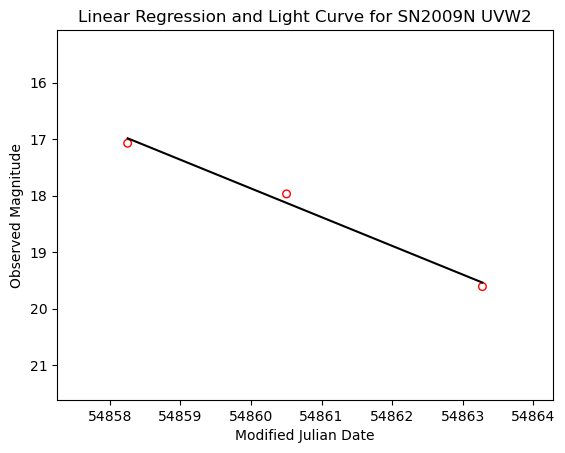

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:168: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  uvm2_slope = float((y2_pred[-1] - y2_pred[0]) / (x2[-1] - x2[0]))


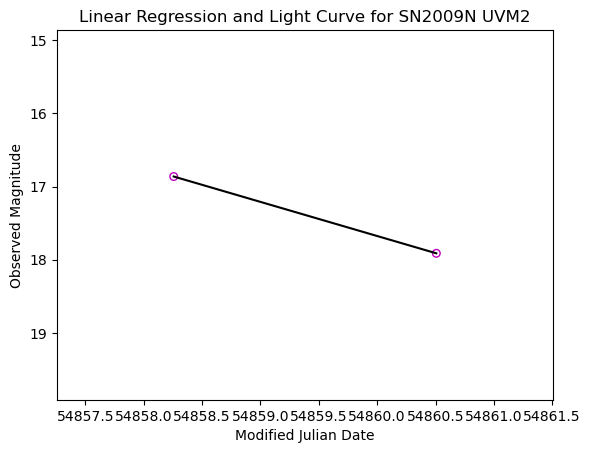

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:213: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  uvw1_slope = float((y_pred[-1] - y_pred[0]) / (x[-1] - x[0]))


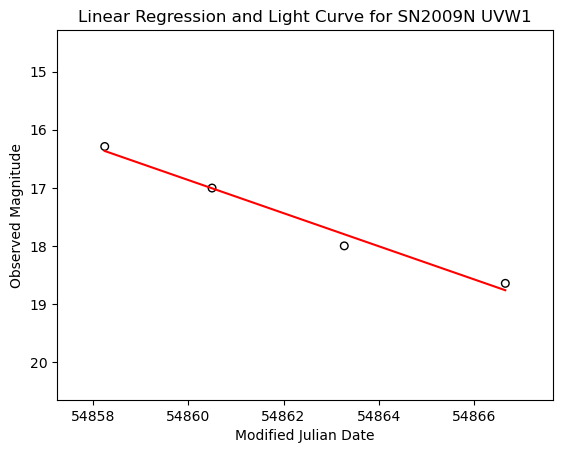

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:257: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  u_slope = float((y3_pred[-1] - y3_pred[0]) / (x3[-1] - x3[0]))


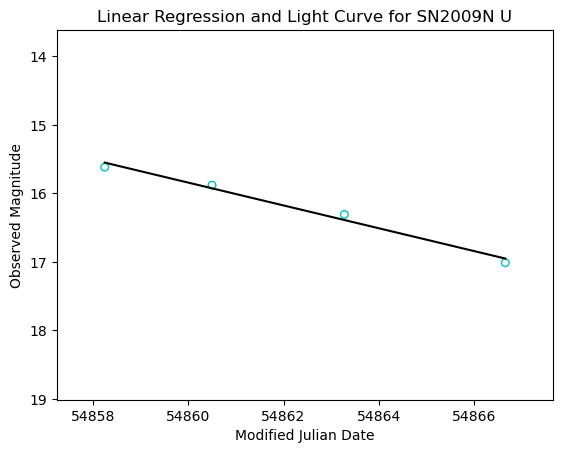

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:302: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  b_slope = float((y5_pred[-1] - y5_pred[0]) / (x5[-1] - x5[0]))


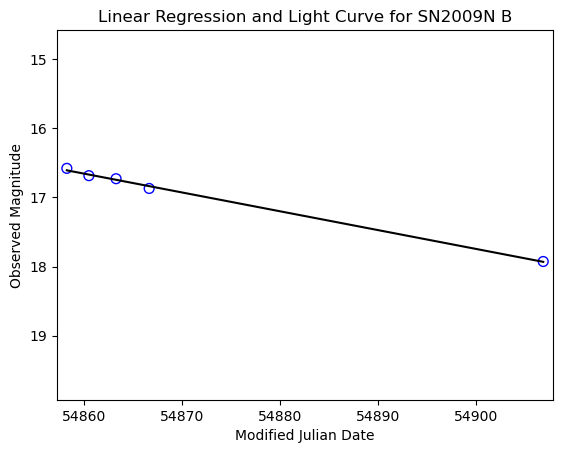

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:346: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  v_slope = float((y4_pred[-1] - y4_pred[0]) / (x4[-1] - x4[0]))


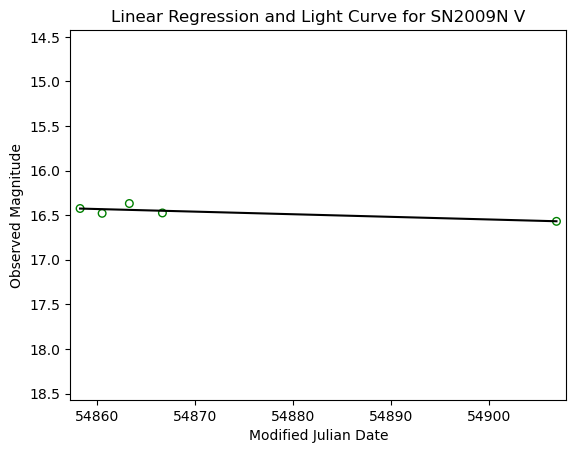

UVW2: 0.508
UVM2: 0.466
UVW1: 0.285
U: 0.167
V: 0.003
B: 0.027


In [44]:
new_LinearR('SN2009N.txt',54858,54866.6522,54858,54863.2823,54830.3381,54884.7267,54858,54906.8389,54858,54906.8469,54858,54907)

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:20: UserWarning: Input line 1 contained no data and will not be counted towards `max_rows=50000`.  This differs from the behaviour in NumPy <=1.22 which counted lines rather than rows.  If desired, the previous behaviour can be achieved by using `itertools.islice`.
Please see the 1.23 release notes for an example on how to do this.  If you wish to ignore this warning, use `warnings.filterwarnings`.  This warning is expected to be removed in the future and is given only once per `loadtxt` call.
  fil, mjd, mag, magerr = np.loadtxt(data, dtype=str, usecols = (0,1,2,3), unpack=True) #unpack lets you assign columns names
C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:123: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  uvw2_slope = float(

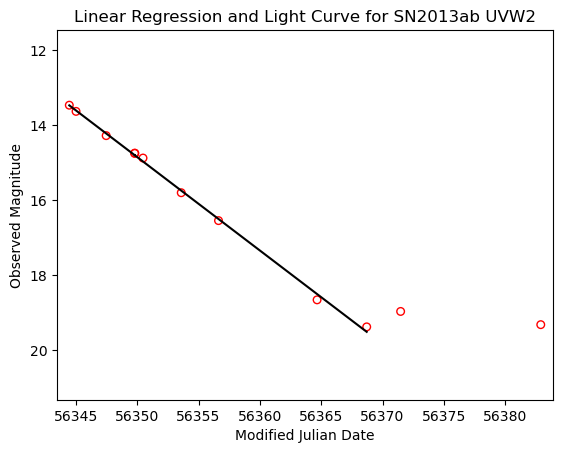

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:168: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  uvm2_slope = float((y2_pred[-1] - y2_pred[0]) / (x2[-1] - x2[0]))


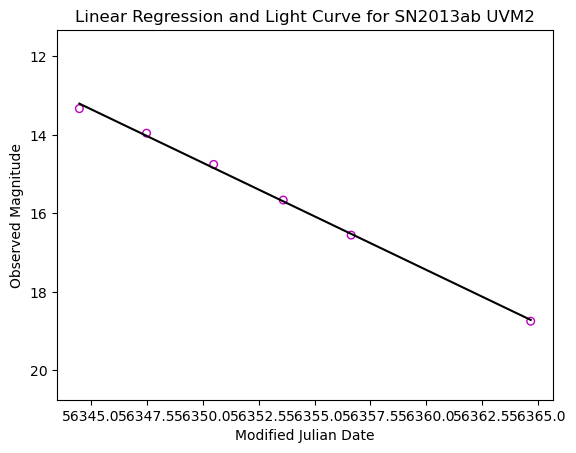

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:213: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  uvw1_slope = float((y_pred[-1] - y_pred[0]) / (x[-1] - x[0]))


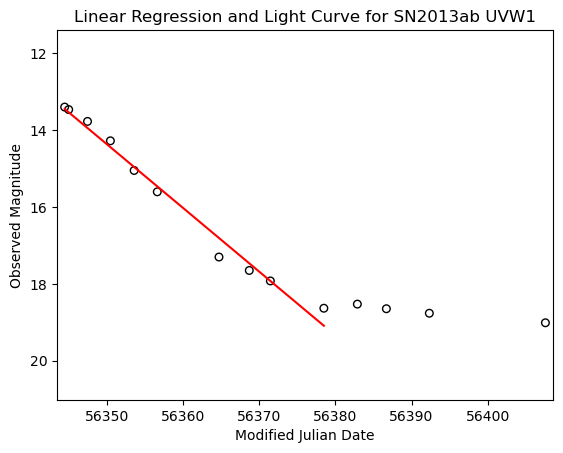

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:257: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  u_slope = float((y3_pred[-1] - y3_pred[0]) / (x3[-1] - x3[0]))


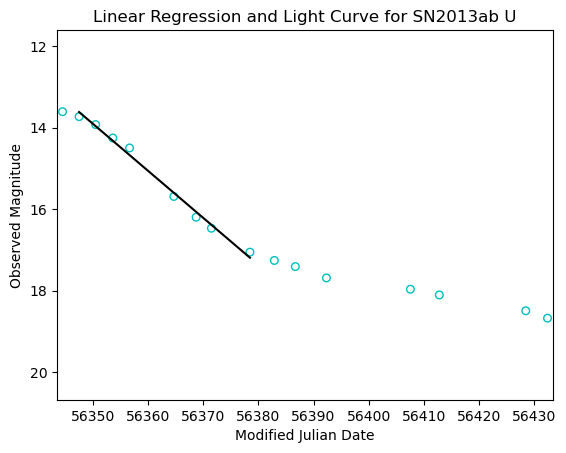

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:302: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  b_slope = float((y5_pred[-1] - y5_pred[0]) / (x5[-1] - x5[0]))


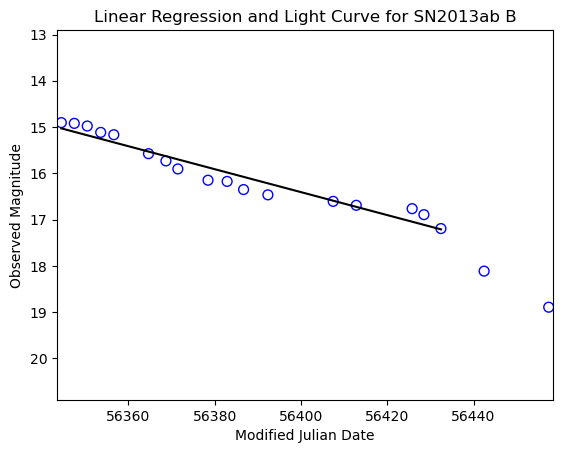

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:346: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  v_slope = float((y4_pred[-1] - y4_pred[0]) / (x4[-1] - x4[0]))


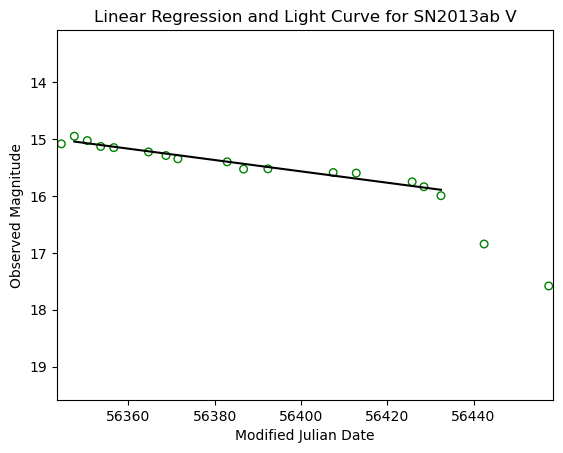

UVW2: 0.249
UVM2: 0.273
UVW1: 0.166
U: 0.115
V: 0.010
B: 0.025


In [45]:
new_LinearR('SN2013ab.txt',56344,56371.4726,56344,56368.7151,56344,56382.888,56344.4662,56382.8899,56344,56442.4509,56344.4689,56442.4551)

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:20: UserWarning: Input line 1 contained no data and will not be counted towards `max_rows=50000`.  This differs from the behaviour in NumPy <=1.22 which counted lines rather than rows.  If desired, the previous behaviour can be achieved by using `itertools.islice`.
Please see the 1.23 release notes for an example on how to do this.  If you wish to ignore this warning, use `warnings.filterwarnings`.  This warning is expected to be removed in the future and is given only once per `loadtxt` call.
  fil, mjd, mag, magerr = np.loadtxt(data, dtype=str, usecols = (0,1,2,3), unpack=True) #unpack lets you assign columns names
C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:123: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  uvw2_slope = float(

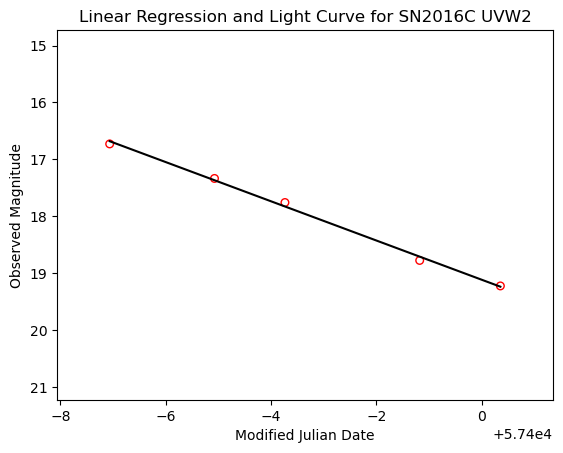

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:168: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  uvm2_slope = float((y2_pred[-1] - y2_pred[0]) / (x2[-1] - x2[0]))


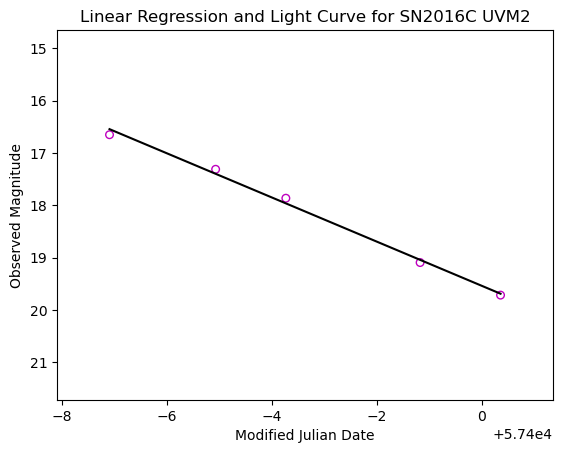

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:213: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  uvw1_slope = float((y_pred[-1] - y_pred[0]) / (x[-1] - x[0]))


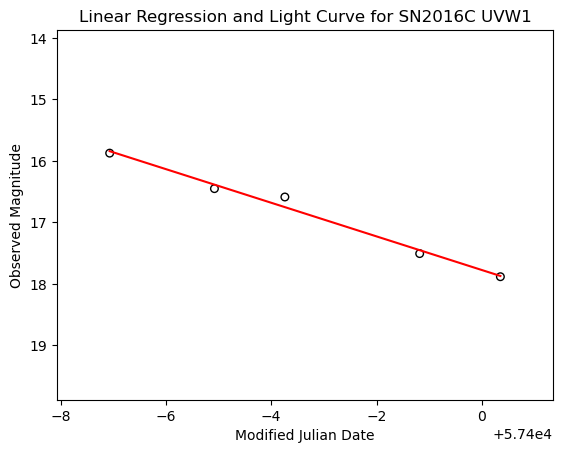

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:257: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  u_slope = float((y3_pred[-1] - y3_pred[0]) / (x3[-1] - x3[0]))


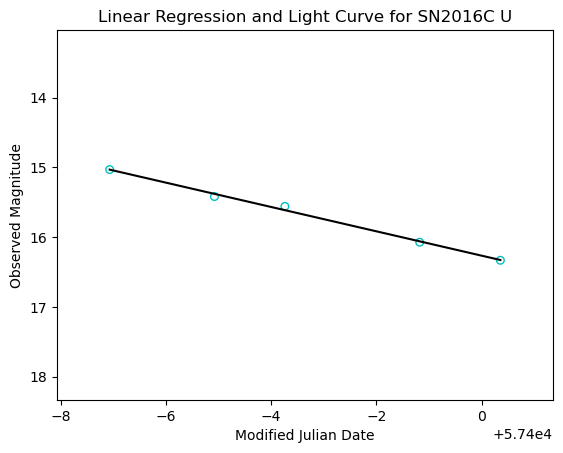

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:302: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  b_slope = float((y5_pred[-1] - y5_pred[0]) / (x5[-1] - x5[0]))


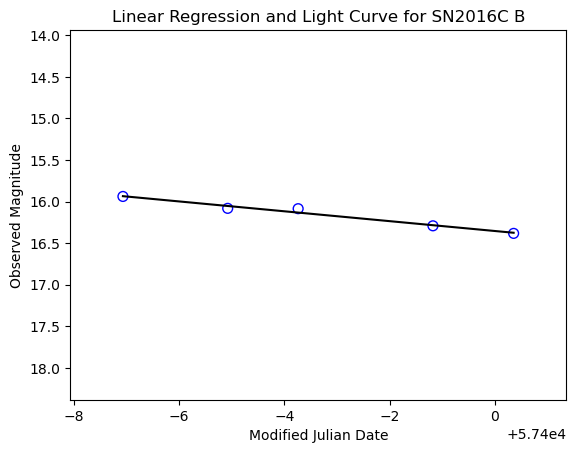

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:346: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  v_slope = float((y4_pred[-1] - y4_pred[0]) / (x4[-1] - x4[0]))


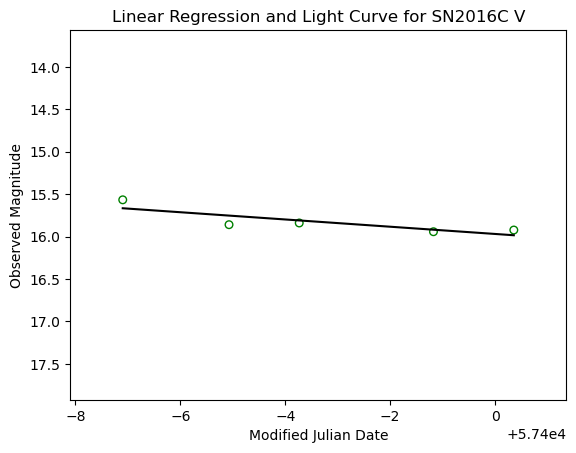

UVW2: 0.345
UVM2: 0.422
UVW1: 0.273
U: 0.175
V: 0.043
B: 0.059


In [46]:
new_LinearR('SN2016C.txt',57392,57401,57392,57401,57392,57401,57392,57401,57392,57401,57392,57401)

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:20: UserWarning: Input line 1 contained no data and will not be counted towards `max_rows=50000`.  This differs from the behaviour in NumPy <=1.22 which counted lines rather than rows.  If desired, the previous behaviour can be achieved by using `itertools.islice`.
Please see the 1.23 release notes for an example on how to do this.  If you wish to ignore this warning, use `warnings.filterwarnings`.  This warning is expected to be removed in the future and is given only once per `loadtxt` call.
  fil, mjd, mag, magerr = np.loadtxt(data, dtype=str, usecols = (0,1,2,3), unpack=True) #unpack lets you assign columns names
C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:123: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  uvw2_slope = float(

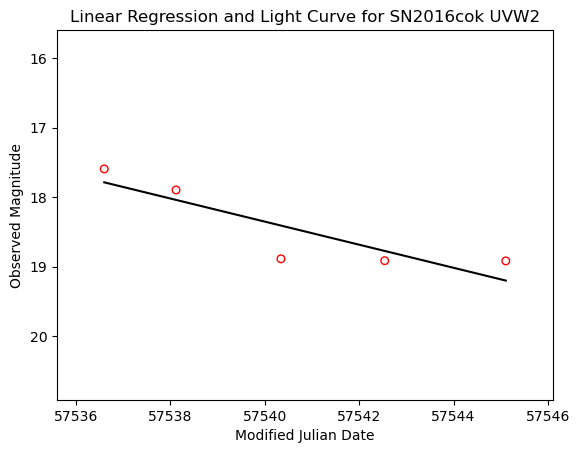

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:168: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  uvm2_slope = float((y2_pred[-1] - y2_pred[0]) / (x2[-1] - x2[0]))


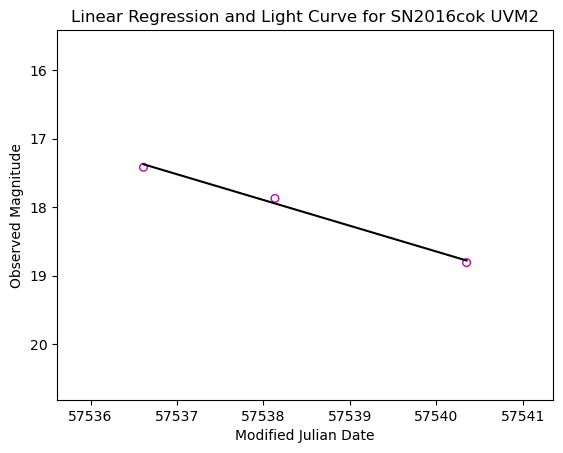

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:213: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  uvw1_slope = float((y_pred[-1] - y_pred[0]) / (x[-1] - x[0]))


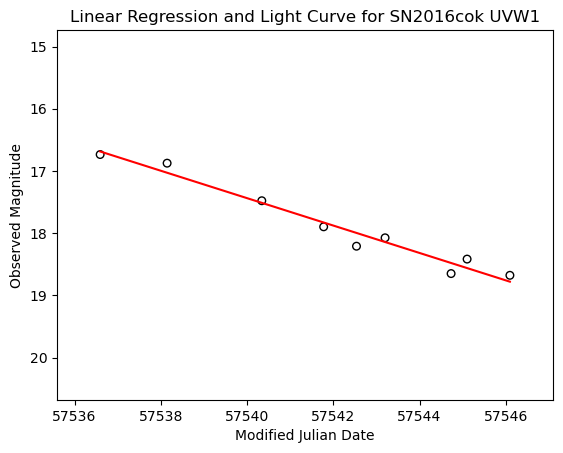

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:257: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  u_slope = float((y3_pred[-1] - y3_pred[0]) / (x3[-1] - x3[0]))


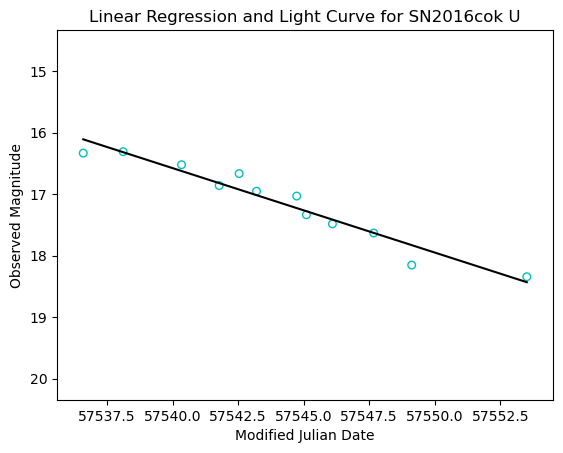

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:302: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  b_slope = float((y5_pred[-1] - y5_pred[0]) / (x5[-1] - x5[0]))


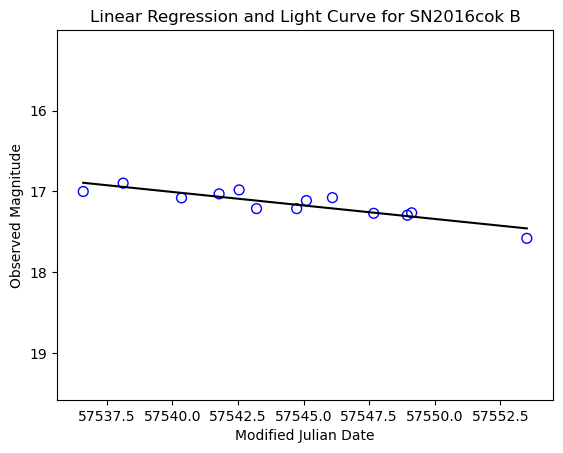

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:346: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  v_slope = float((y4_pred[-1] - y4_pred[0]) / (x4[-1] - x4[0]))


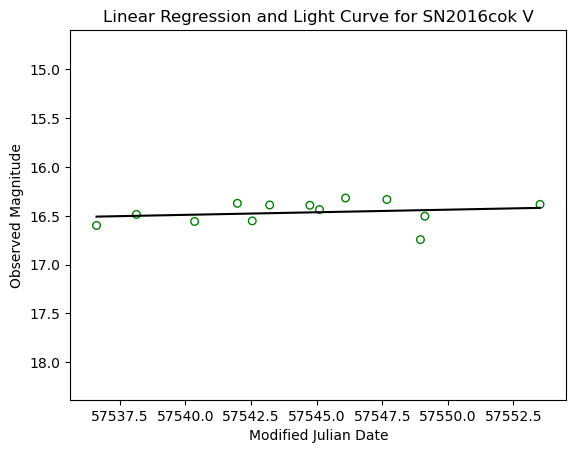

UVW2: 0.166
UVM2: 0.376
UVW1: 0.220
U: 0.137
V: -0.005
B: 0.033


In [47]:
new_LinearR('SN2016cok.txt',57536,57546.0986,57536,57541.9785,57536,57547.6688,57536,57554,57536,57554,57536,57554)

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:20: UserWarning: Input line 1 contained no data and will not be counted towards `max_rows=50000`.  This differs from the behaviour in NumPy <=1.22 which counted lines rather than rows.  If desired, the previous behaviour can be achieved by using `itertools.islice`.
Please see the 1.23 release notes for an example on how to do this.  If you wish to ignore this warning, use `warnings.filterwarnings`.  This warning is expected to be removed in the future and is given only once per `loadtxt` call.
  fil, mjd, mag, magerr = np.loadtxt(data, dtype=str, usecols = (0,1,2,3), unpack=True) #unpack lets you assign columns names
C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:123: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  uvw2_slope = float(

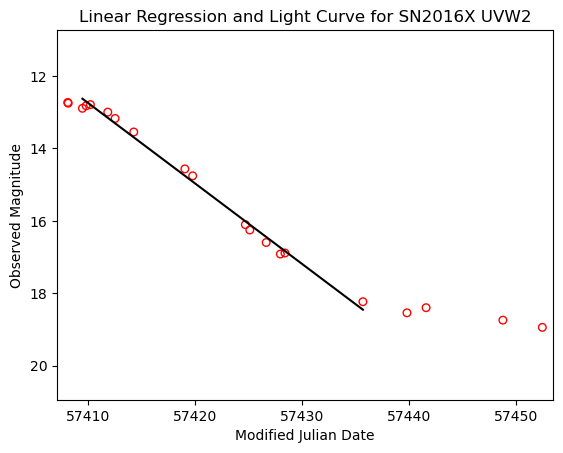

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:168: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  uvm2_slope = float((y2_pred[-1] - y2_pred[0]) / (x2[-1] - x2[0]))


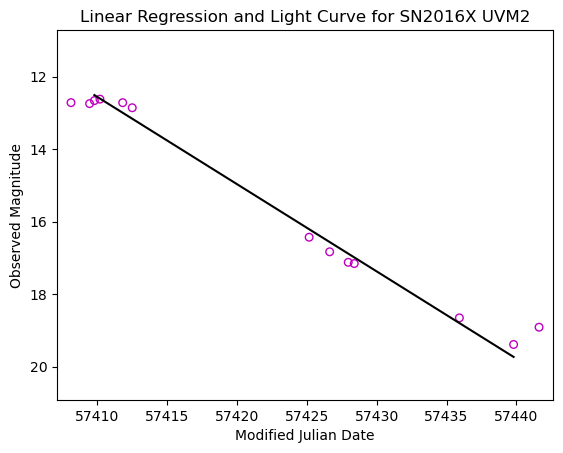

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:213: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  uvw1_slope = float((y_pred[-1] - y_pred[0]) / (x[-1] - x[0]))


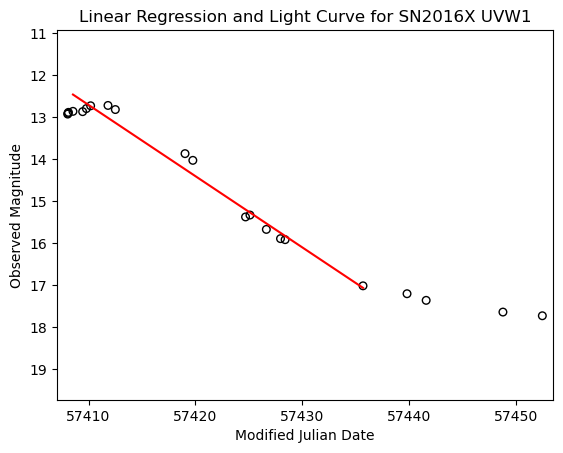

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:257: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  u_slope = float((y3_pred[-1] - y3_pred[0]) / (x3[-1] - x3[0]))


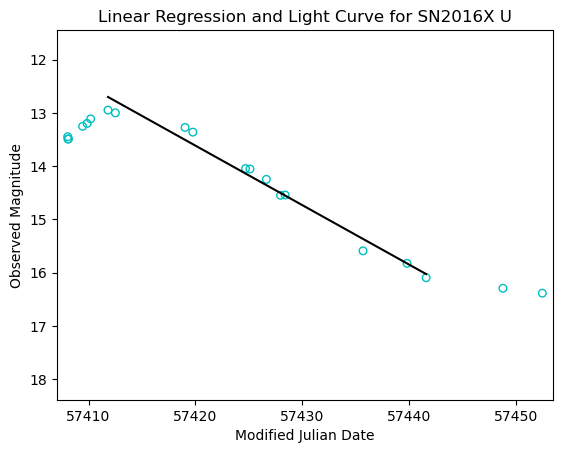

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:302: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  b_slope = float((y5_pred[-1] - y5_pred[0]) / (x5[-1] - x5[0]))


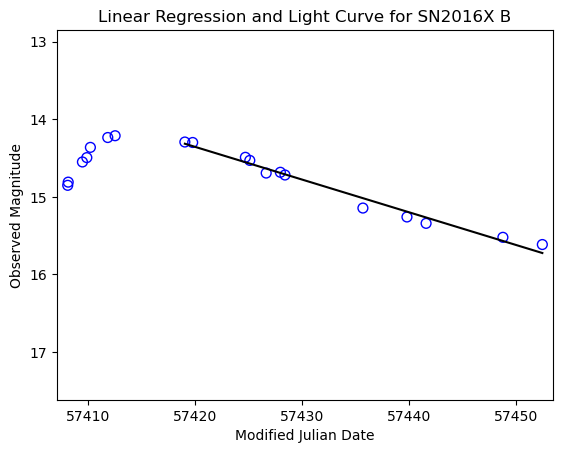

C:\Users\Savannah\AppData\Local\Temp\ipykernel_588\597697005.py:346: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  v_slope = float((y4_pred[-1] - y4_pred[0]) / (x4[-1] - x4[0]))


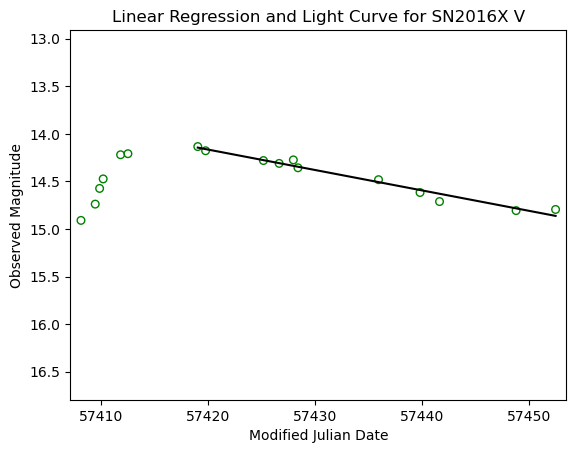

UVW2: 0.222
UVM2: 0.241
UVW1: 0.170
U: 0.112
V: 0.021
B: 0.042


In [48]:
new_LinearR('SN2016X.txt',57408.1183,57439.7994,57409.455,57441.6236,57408.1135,57439.7967,57410.1905,57448.771,57412.5036,57453,57412.5062,57453)

**Saving Text Files**

In [49]:
#saving all the arrays to text files
np.savetxt("uvw2_slopes.txt", m_uvw2)
np.savetxt("uvm2_slopes.txt", m_uvm2)
np.savetxt("uvw1_slopes.txt", m_uvw1)
np.savetxt("u_slopes.txt", m_U)
np.savetxt("b_slopes.txt", m_B)
np.savetxt("v_slopes.txt", m_V)